##### Importing Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv("Covid Data.csv")

##### Understanding the Dataset

In [5]:
df.shape

(134285, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134285 entries, 0 to 134284
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 134285 non-null  int64  
 1   MEDICAL_UNIT          134285 non-null  int64  
 2   SEX                   134285 non-null  int64  
 3   PATIENT_TYPE          134285 non-null  int64  
 4   DATE_DIED             134285 non-null  object 
 5   INTUBED               134285 non-null  int64  
 6   PNEUMONIA             134285 non-null  int64  
 7   AGE                   134285 non-null  int64  
 8   PREGNANT              134285 non-null  int64  
 9   DIABETES              134285 non-null  int64  
 10  COPD                  134285 non-null  int64  
 11  ASTHMA                134285 non-null  int64  
 12  INMSUPR               134285 non-null  int64  
 13  HIPERTENSION          134285 non-null  int64  
 14  OTHER_DISEASE         134284 non-null  float64
 15  

In [7]:
df.describe(include="number")

USMER   MEDICAL_UNIT            SEX   PATIENT_TYPE  \
count  134285.000000  134285.000000  134285.000000  134285.000000   
mean        1.537901       3.851316       1.542317       1.453923   
std         0.498563       0.368567       0.498208       0.497874   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       4.000000       1.000000       1.000000   
50%         2.000000       4.000000       2.000000       1.000000   
75%         2.000000       4.000000       2.000000       2.000000   
max         2.000000       4.000000       2.000000       2.000000   

             INTUBED      PNEUMONIA            AGE       PREGNANT  \
count  134285.000000  134285.000000  134285.000000  134285.000000   
mean       54.439528       2.265391      48.715456      53.563905   
std        47.385991       7.307119      17.055996      47.332121   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000       1.000000      36.000000       2.000000   
50%        97.000000       2.000000      48.000000      97.000000   
75%        97.000000       2.000000      61.000000      97.000000   
max        99.000000      99.000000     107.000000      98.000000   

            DIABETES           COPD         ASTHMA        INMSUPR  \
count  134285.000000  134285.000000  134285.000000  134285.000000   
mean        1.918613       2.100078       2.099408       2.106810   
std         3.484378       3.477747       3.497745       3.506371   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       2.000000       2.000000   
50%         2.000000       2.000000       2.000000       2.000000   
75%         2.000000       2.000000       2.000000       2.000000   
max        98.000000      98.000000      98.000000      98.000000   

        HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR        OBESITY  \
count  134285.000000  134284.000000   134284.000000  134284.000000   
mean        1.851428       2.083107        2.098485       1.875808   
std         3.308233       3.646063        3.517685       2.506107   
min         1.000000       1.000000        1.000000       1.000000   
25%         1.000000       2.000000        2.000000       2.000000   
50%         2.000000       2.000000        2.000000       2.000000   
75%         2.000000       2.000000        2.000000       2.000000   
max        98.000000      98.000000       98.000000      98.000000   

       RENAL_CHRONIC        TOBACCO  CLASIFFICATION_FINAL            ICU  
count  134284.000000  134284.000000         134284.000000  134284.000000  
mean        2.084924       2.063738              3.611718      54.559754  
std         3.470364       3.658598              1.407666      47.259248  
min         1.000000       1.000000              1.000000       1.000000  
25%         2.000000       2.000000              3.000000       2.000000  
50%         2.000000       2.000000              3.000000      97.000000  
75%         2.000000       2.000000              3.000000      97.000000  
max        98.000000      98.000000              7.000000      99.000000

In [8]:
df.describe(include="object")

DATE_DIED
count       134285
unique         337
top     9999-99-99
freq         92878

In [9]:
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   
5      2             1    1             2  9999-99-99        2          1   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1            2.0   
1   72        97         2  ...       2        2             1            2.0   
2   55        97         1  ...       2        2             2            2.0   
3   53         2         2  ...       2        2             2            2.0   
4   68        97         1  ...       2        2             1            2.0   
5   40         2         2  ...       2        2             2            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL   ICU  
0             2.0      2.0            2.0      2.0                   3.0  97.0  
1             2.0      1.0            1.0      2.0                   5.0  97.0  
2             2.0      2.0            2.0      2.0                   3.0   2.0  
3             2.0      2.0            2.0      2.0                   7.0  97.0  
4             2.0      2.0            2.0      2.0                   3.0  97.0  
5             2.0      2.0            2.0      2.0                   3.0   2.0  

[6 rows x 21 columns]

##### Missing Values, Outliers, and Type Casting

In [10]:
# Replacing 97, 98, and 99 with null
missing_values = (97, 98, 99)
df.replace(missing_values, np.nan, inplace=True)
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      NaN        1.0   
1      2             1    2             1  03/06/2020      NaN        1.0   
2      2             1    2             2  09/06/2020      1.0        2.0   
3      2             1    1             1  12/06/2020      NaN        2.0   
4      2             1    2             1  21/06/2020      NaN        2.0   
5      2             1    1             2  9999-99-99      2.0        1.0   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0  65.0       2.0       2.0  ...     2.0      2.0           1.0   
1  72.0       NaN       2.0  ...     2.0      2.0           1.0   
2  55.0       NaN       1.0  ...     2.0      2.0           2.0   
3  53.0       2.0       2.0  ...     2.0      2.0           2.0   
4  68.0       NaN       1.0  ...     2.0      2.0           1.0   
5  40.0       2.0       2.0  ...     2.0      2.0           2.0   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0            2.0             2.0      2.0            2.0      2.0   
1            2.0             2.0      1.0            1.0      2.0   
2            2.0             2.0      2.0            2.0      2.0   
3            2.0             2.0      2.0            2.0      2.0   
4            2.0             2.0      2.0            2.0      2.0   
5            2.0             2.0      2.0            2.0      2.0   

   CLASIFFICATION_FINAL  ICU  
0                   3.0  NaN  
1                   5.0  NaN  
2                   3.0  2.0  
3                   7.0  NaN  
4                   3.0  NaN  
5                   3.0  2.0  

[6 rows x 21 columns]

In [11]:
# Replacing the date 9999-99-99 with null
missing_values = "9999-99-99"
df.replace(missing_values, np.nan, inplace=True)
df.head(6)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      NaN        1.0   
1      2             1    2             1  03/06/2020      NaN        1.0   
2      2             1    2             2  09/06/2020      1.0        2.0   
3      2             1    1             1  12/06/2020      NaN        2.0   
4      2             1    2             1  21/06/2020      NaN        2.0   
5      2             1    1             2         NaN      2.0        1.0   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0  65.0       2.0       2.0  ...     2.0      2.0           1.0   
1  72.0       NaN       2.0  ...     2.0      2.0           1.0   
2  55.0       NaN       1.0  ...     2.0      2.0           2.0   
3  53.0       2.0       2.0  ...     2.0      2.0           2.0   
4  68.0       NaN       1.0  ...     2.0      2.0           1.0   
5  40.0       2.0       2.0  ...     2.0      2.0           2.0   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0            2.0             2.0      2.0            2.0      2.0   
1            2.0             2.0      1.0            1.0      2.0   
2            2.0             2.0      2.0            2.0      2.0   
3            2.0             2.0      2.0            2.0      2.0   
4            2.0             2.0      2.0            2.0      2.0   
5            2.0             2.0      2.0            2.0      2.0   

   CLASIFFICATION_FINAL  ICU  
0                   3.0  NaN  
1                   5.0  NaN  
2                   3.0  2.0  
3                   7.0  NaN  
4                   3.0  NaN  
5                   3.0  2.0  

[6 rows x 21 columns]

In [12]:
# Checking for missing values
df.isnull().sum().sort_values()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
CLASIFFICATION_FINAL        1
AGE                        70
OBESITY                    90
HIPERTENSION              156
DIABETES                  174
RENAL_CHRONIC             176
COPD                      176
ASTHMA                    178
INMSUPR                   179
CARDIOVASCULAR            181
OTHER_DISEASE             194
TOBACCO                   195
PNEUMONIA                 759
PREGNANT                72894
INTUBED                 74284
ICU                     74295
DATE_DIED               92878
dtype: int64

In [13]:
# Missing values of DATE_DIED represents alive patients
# Missing values of AGE can be removed
# Missing values of PNEUMONIA, PREGNANT, INTUBED, and ICU should be kept
df.dropna(subset=["AGE"], inplace=True)

<Axes: xlabel='AGE'>

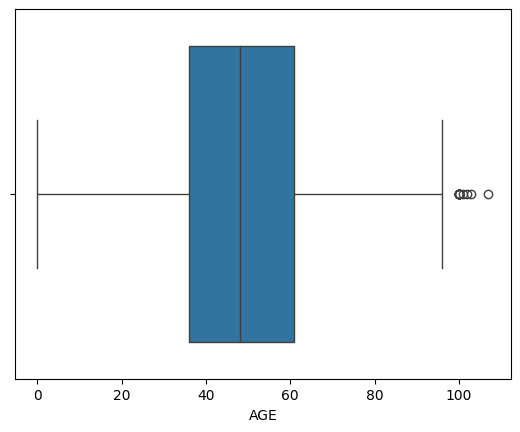

In [14]:
# Checking for outliers in "AGE" column
sns.boxplot(x=df["AGE"])

<Axes: xlabel='AGE'>

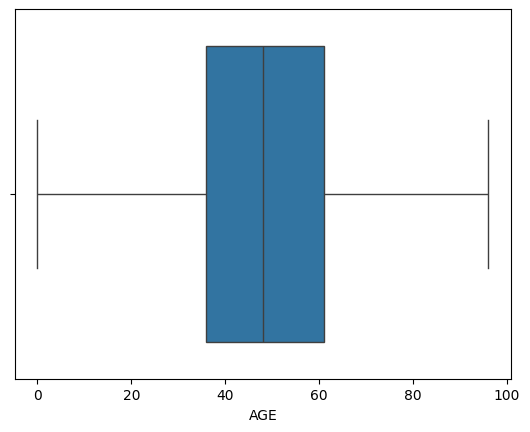

In [15]:
# Removing the outliers in "AGE" column
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['AGE'] >= lower_bound) & (df['AGE'] <= upper_bound)]
sns.boxplot(x=df["AGE"])

In [16]:
# Changing DATE_DIED string format to date format
df["DATE_DIED"] = pd.to_datetime(df["DATE_DIED"], format="%d/%m/%y", errors='ignore')

##### EDA

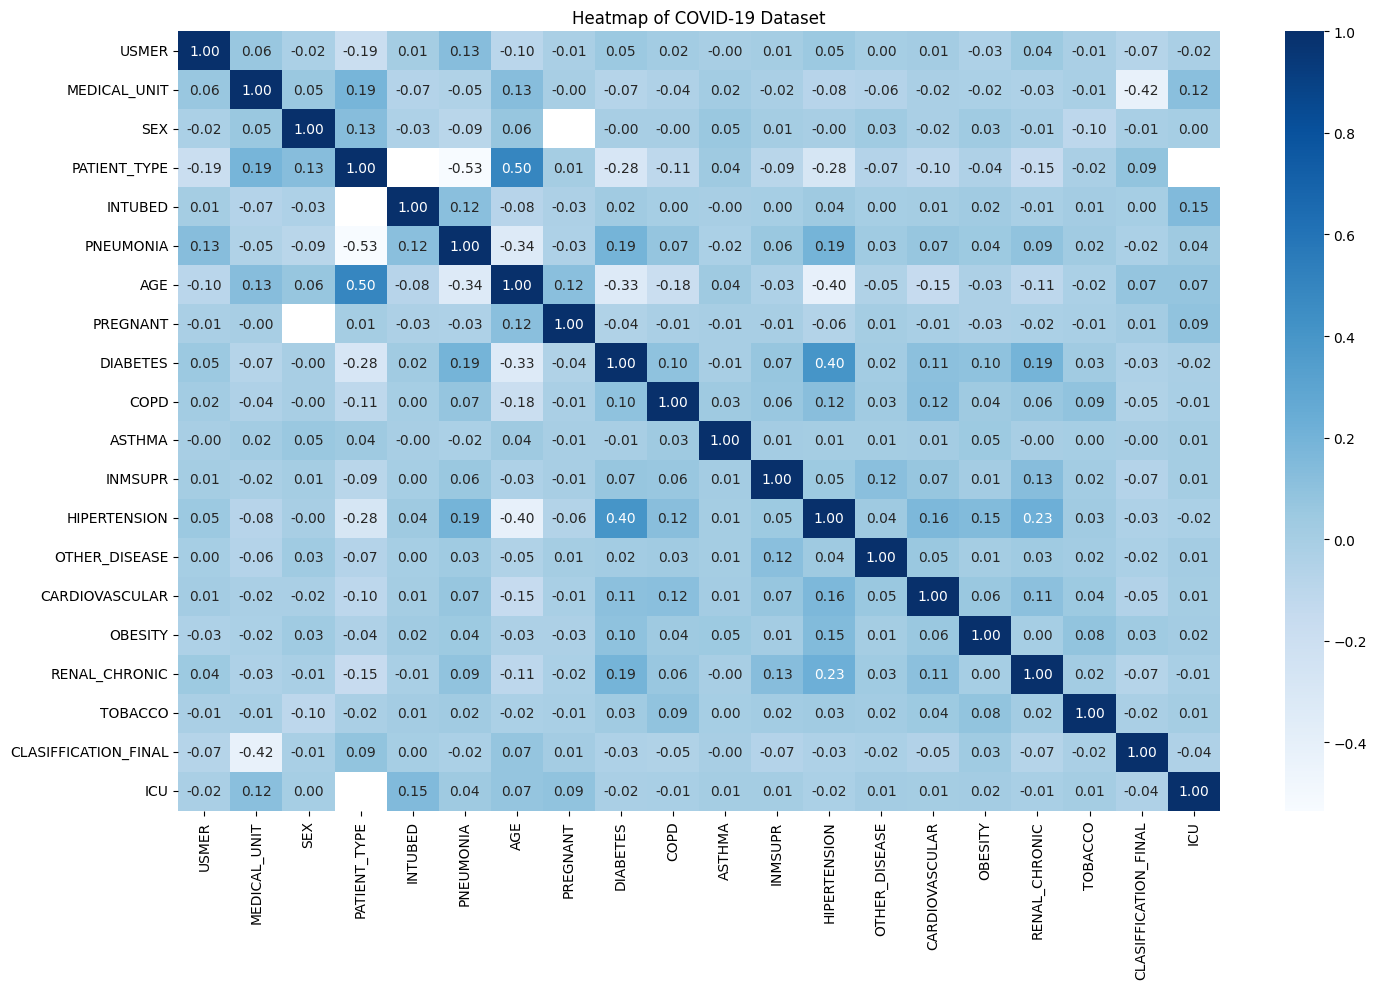

In [17]:
# Plotting heatmap to find correlations in the dataset
plt.figure(figsize=(15, 10))
corr = df.drop("DATE_DIED", axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f",cmap="Blues")
plt.title("Heatmap of COVID-19 Dataset")
plt.tight_layout()
plt.show()

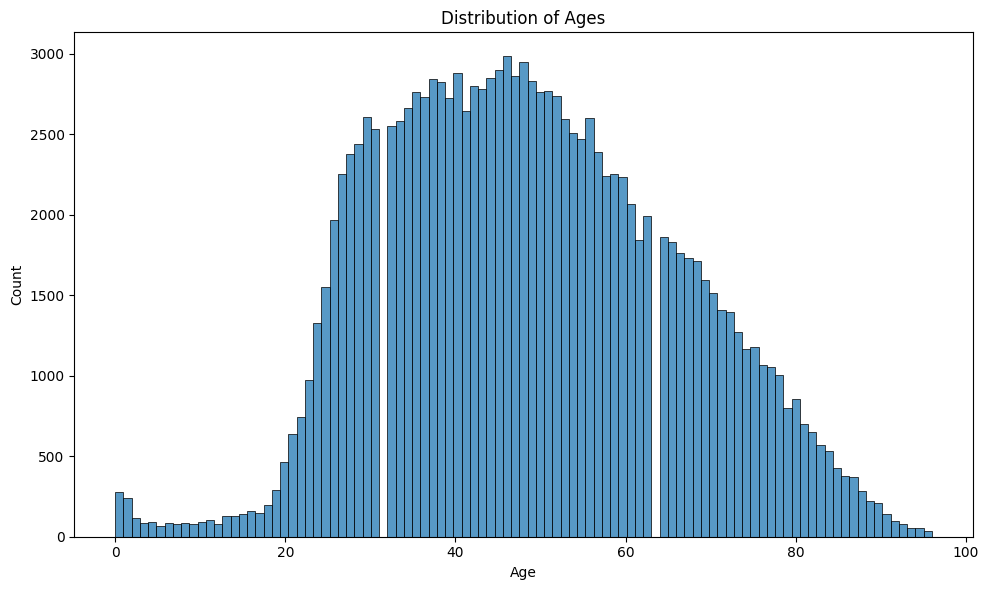

In [18]:
# Plotting the distribution of ages infected with COVID-19
plt.figure(figsize=(10, 6))
sns.histplot(df["AGE"])
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

<ipython-input-19-a7198f6ca9c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=classification, x="CLASIFFICATION_FINAL", y="count", palette="viridis")


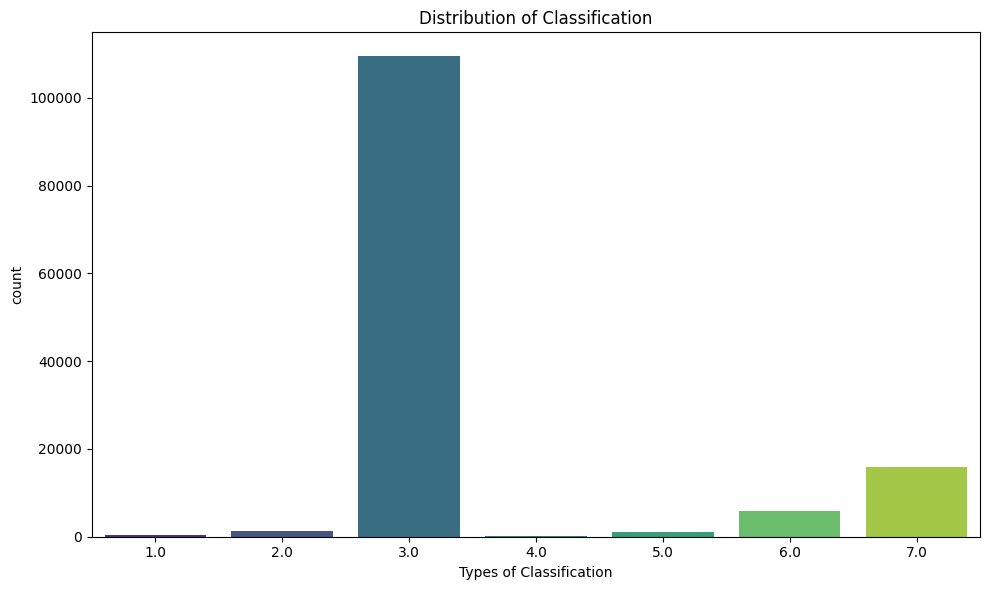

In [19]:
# Plotting the distribution of all classification types
# Class 1-3: Diagnosed with COVID-19 in different severity
# Class 4-7: Not a carrier of COVID-19 or that the test was inconclusive
plt.figure(figsize=(10, 6))
classification = df["CLASIFFICATION_FINAL"].value_counts().reset_index()
sns.barplot(data=classification, x="CLASIFFICATION_FINAL", y="count", palette="viridis")
plt.title("Distribution of Classification")
plt.xlabel("Types of Classification")
plt.tight_layout()
plt.show()

<ipython-input-20-03e46b4cd109>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=patient_type, x="PATIENT_TYPE", y="count", palette="RdBu")


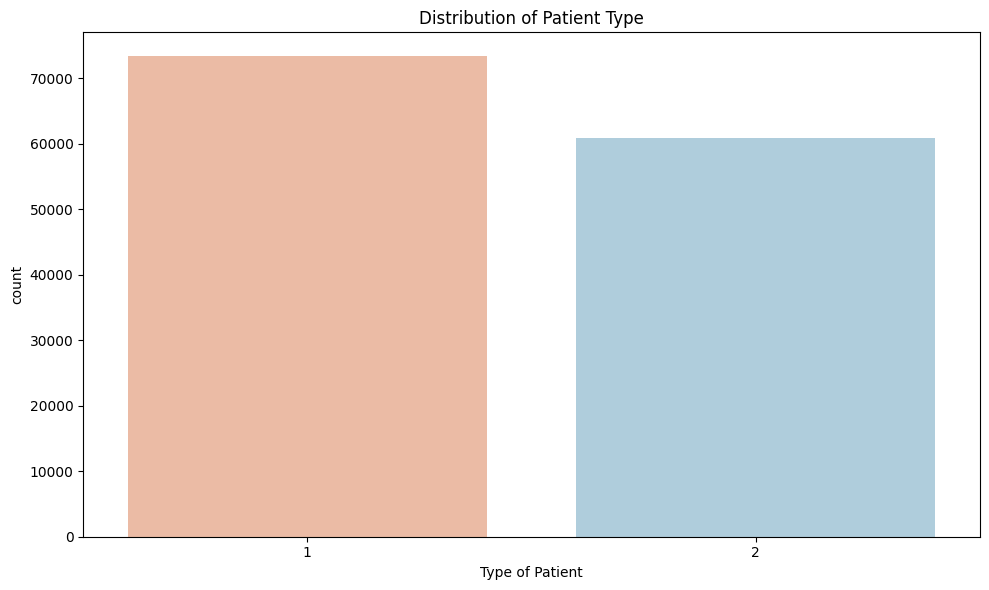

In [20]:
# Plotting the distribution of patient types
# 1: Patient returned home
# 2: Patient is hospitalized
plt.figure(figsize=(10, 6))
patient_type = df["PATIENT_TYPE"].value_counts().reset_index()
sns.barplot(data=patient_type, x="PATIENT_TYPE", y="count", palette="RdBu")
plt.title("Distribution of Patient Type")
plt.xlabel("Type of Patient")
plt.tight_layout()
plt.show()

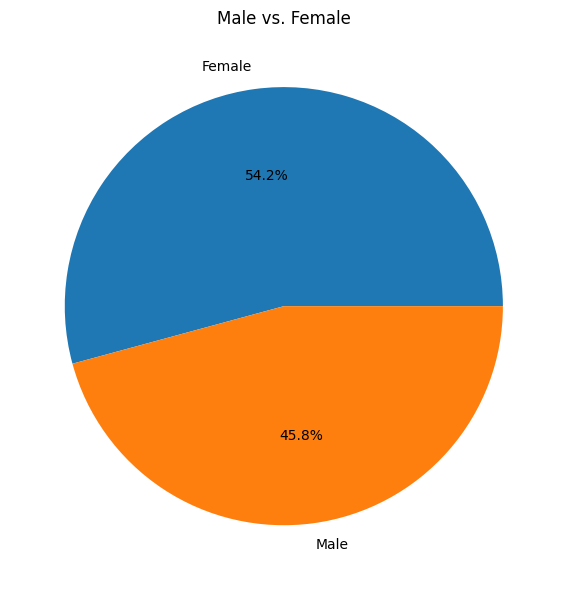

In [21]:
# Plotting the percentage of male vs. female
plt.figure(figsize=(10, 6))
gender = df["SEX"].value_counts().reset_index()
labels = ["Female", "Male"]
plt.pie(gender["count"], labels=labels, autopct="%1.1f%%")
plt.title("Male vs. Female")
plt.tight_layout()
plt.show()

<ipython-input-22-164cc8a0691a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died["DATE_DIED"].fillna("Alive", inplace=True)
<ipython-input-22-164cc8a0691a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  died["DATE_DIED"].replace(unique, "Dead", inplace=True)


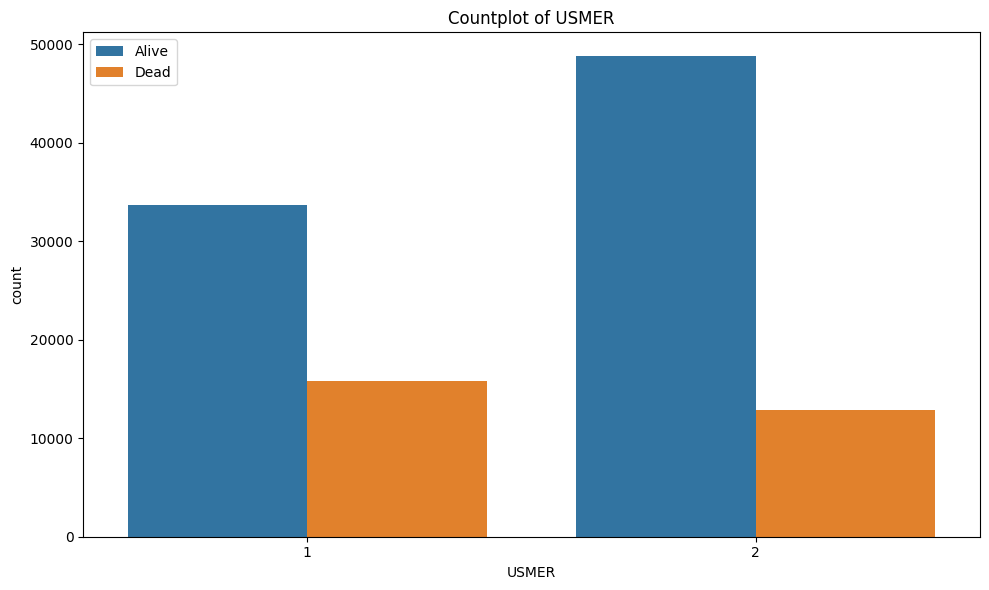

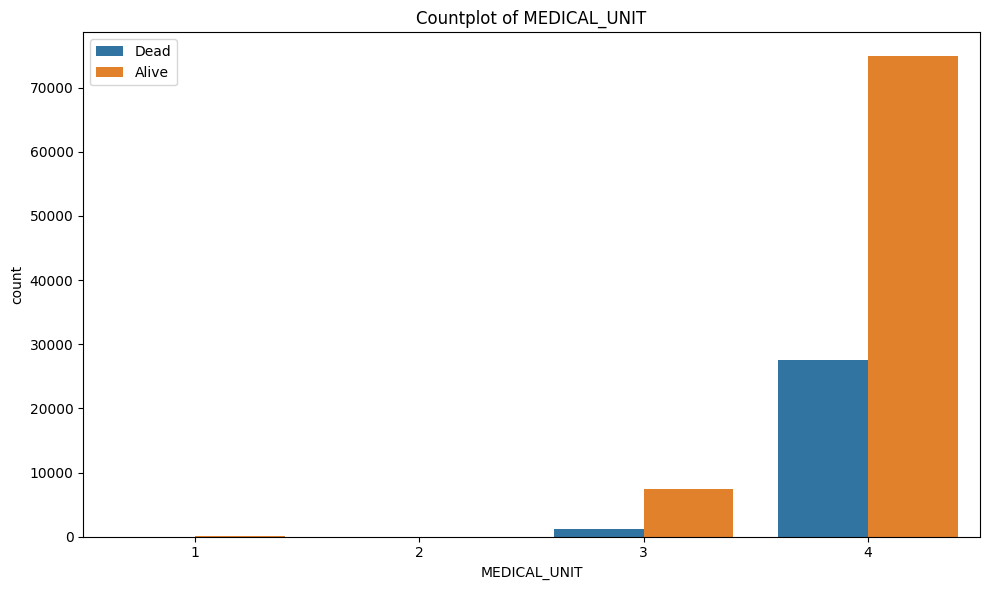

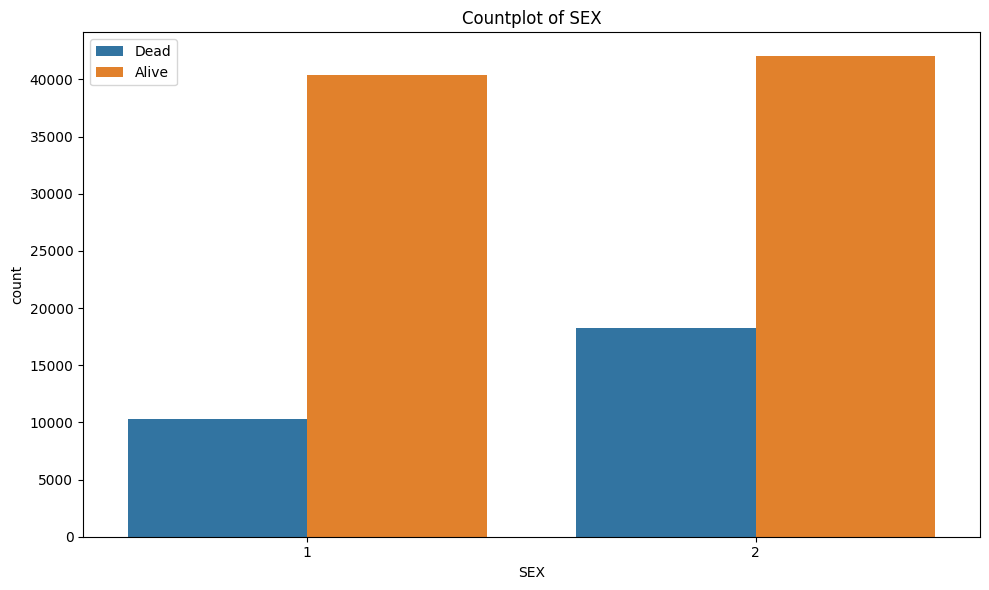

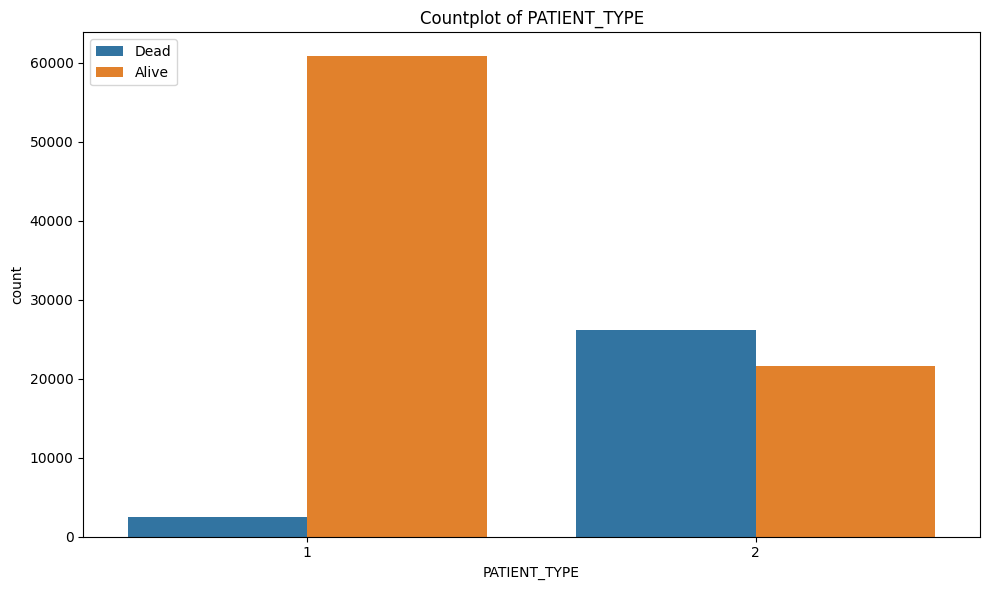

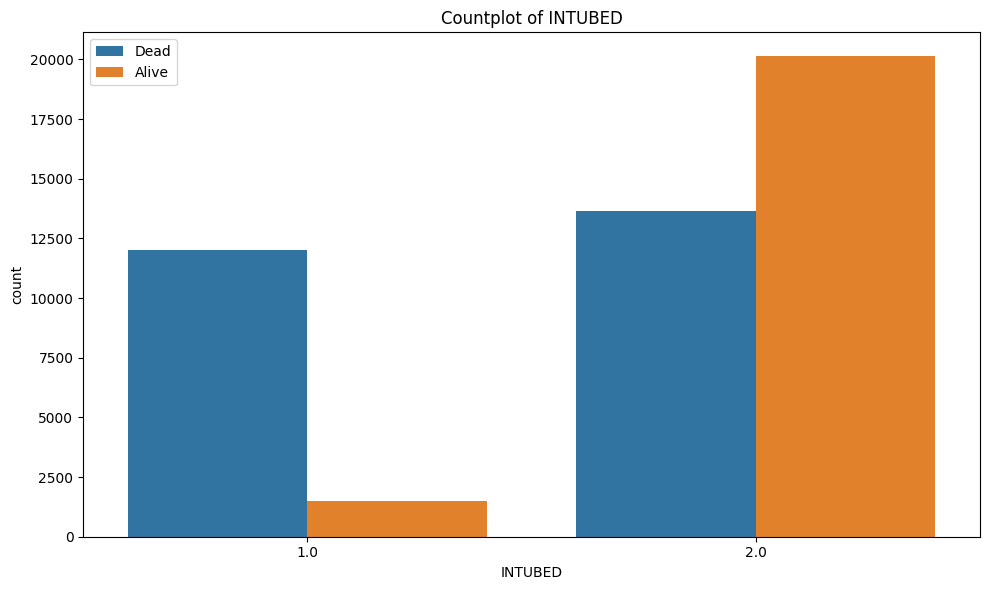

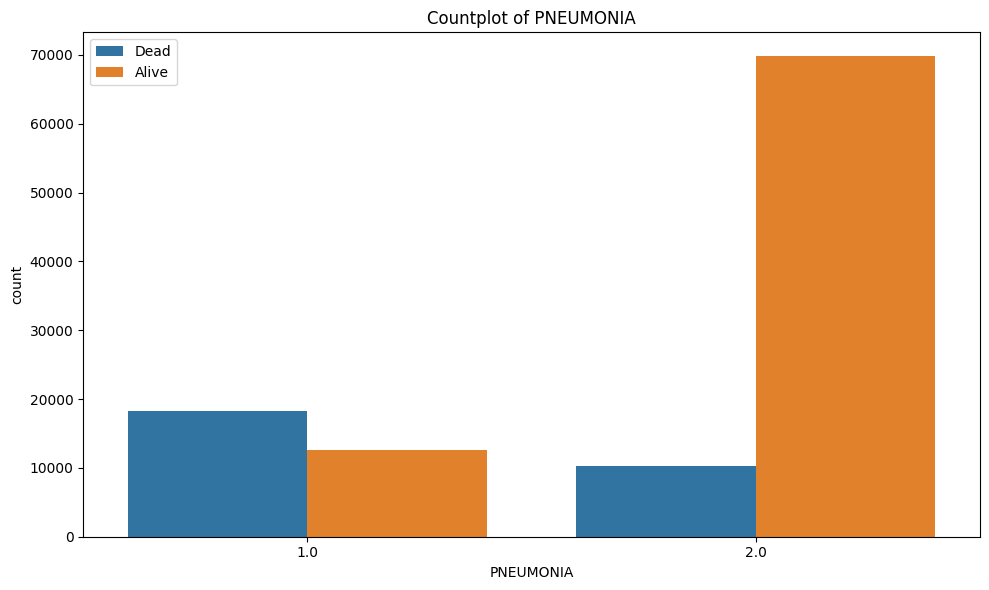

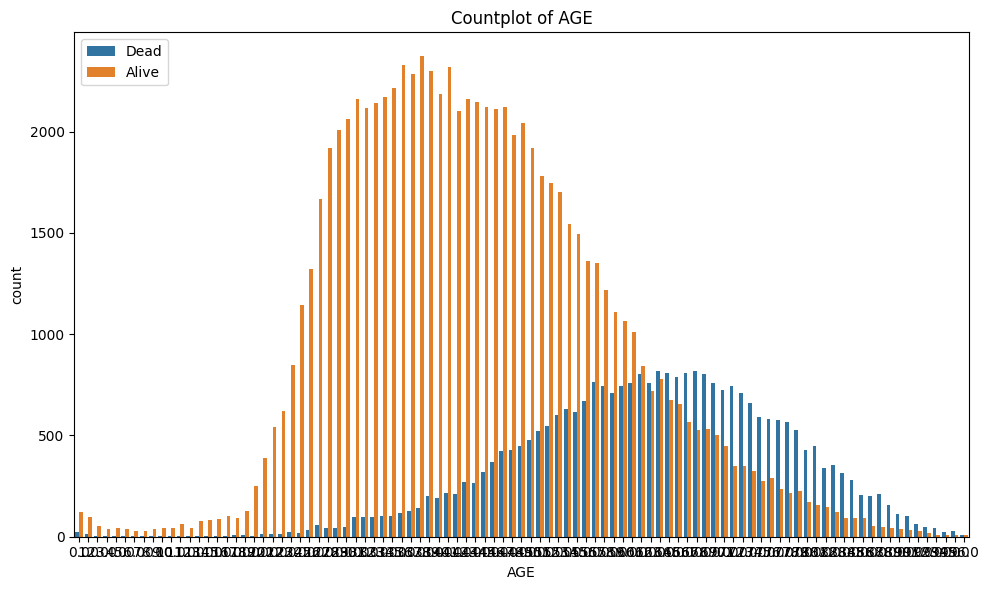

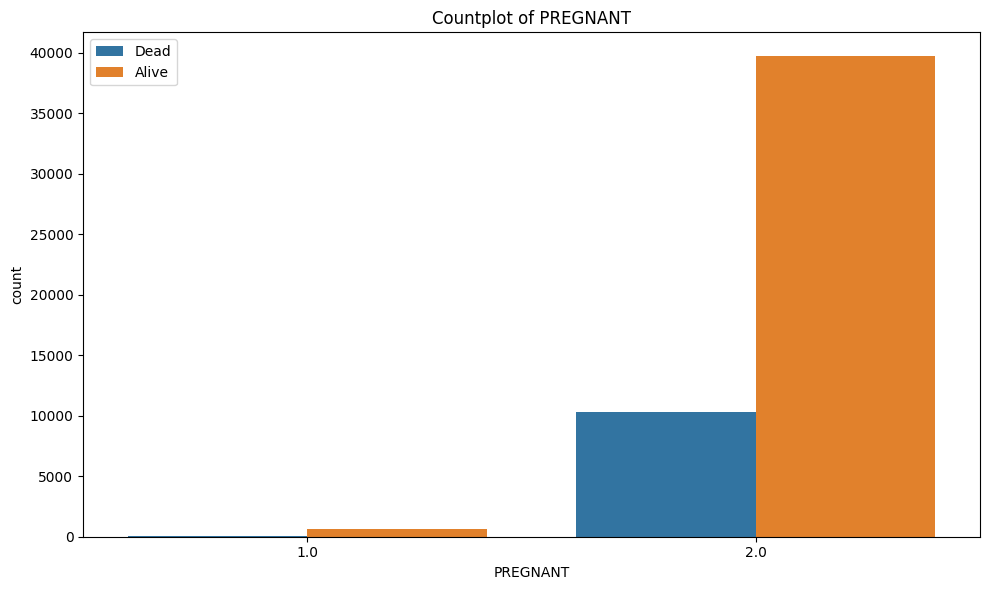

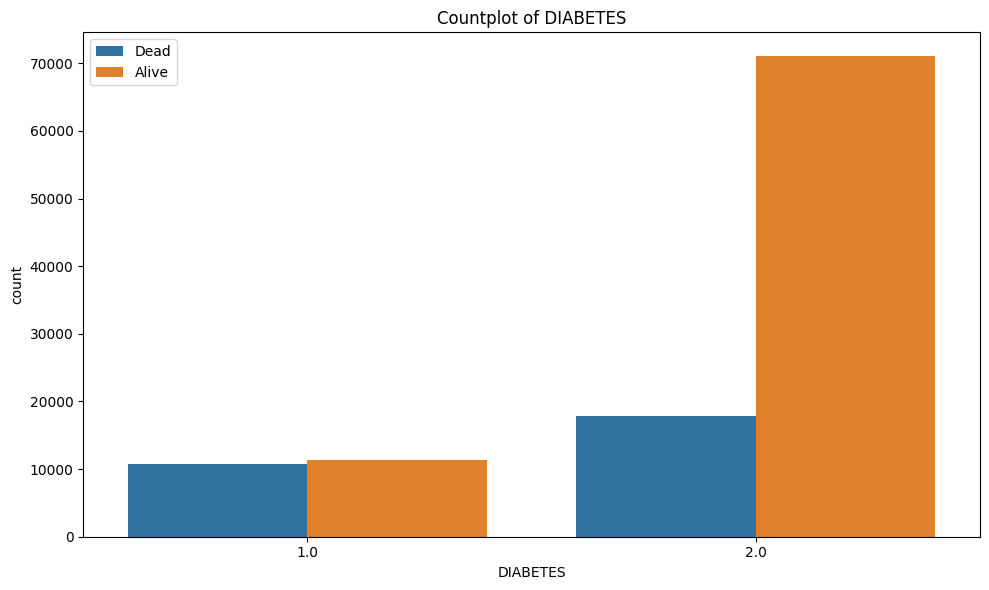

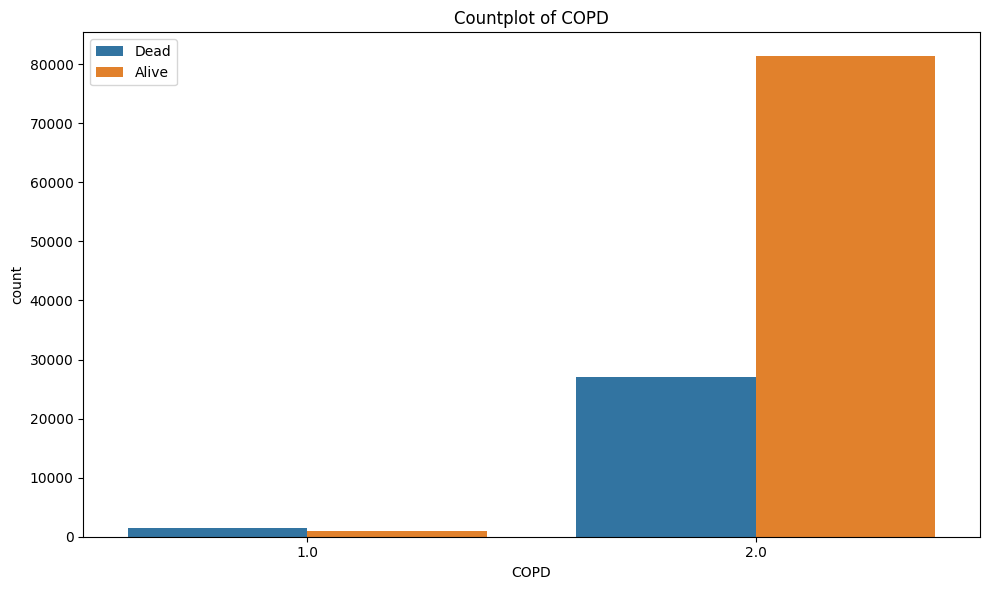

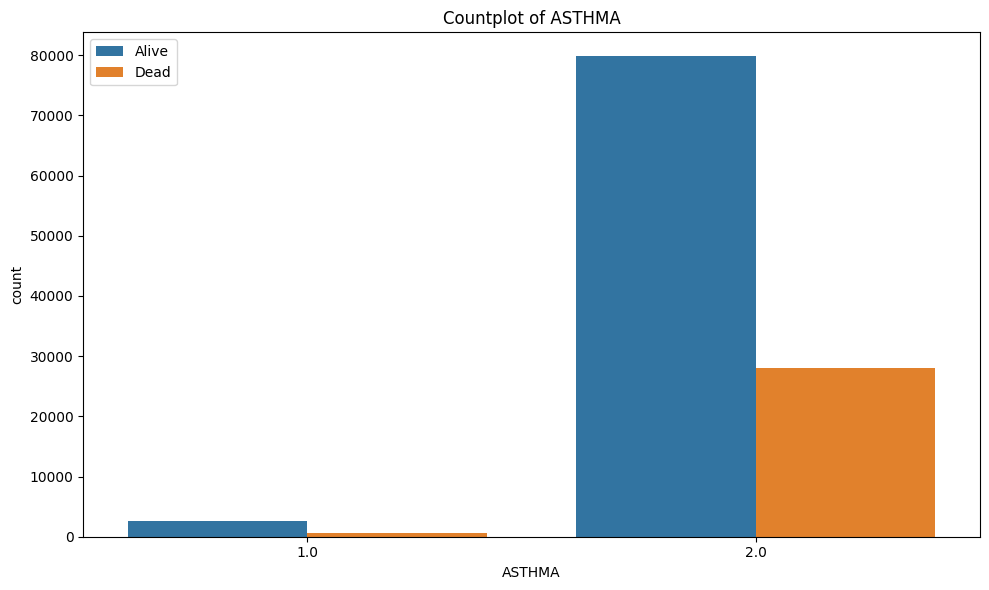

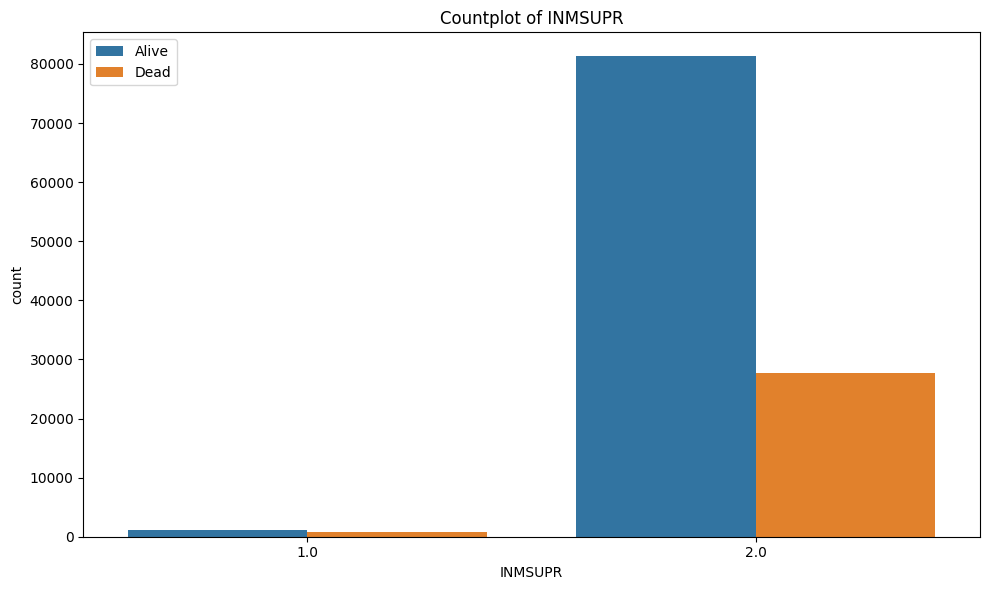

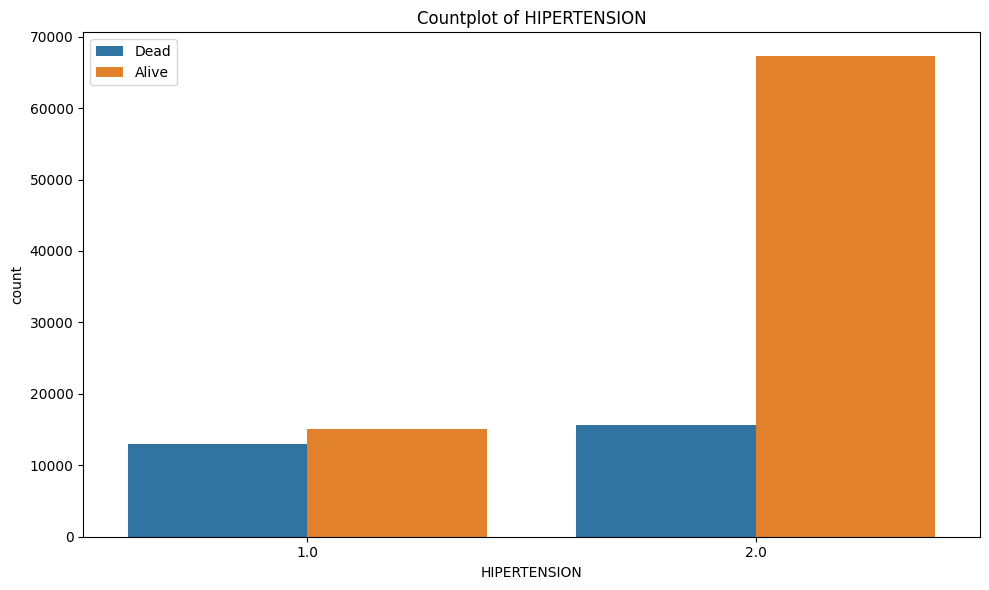

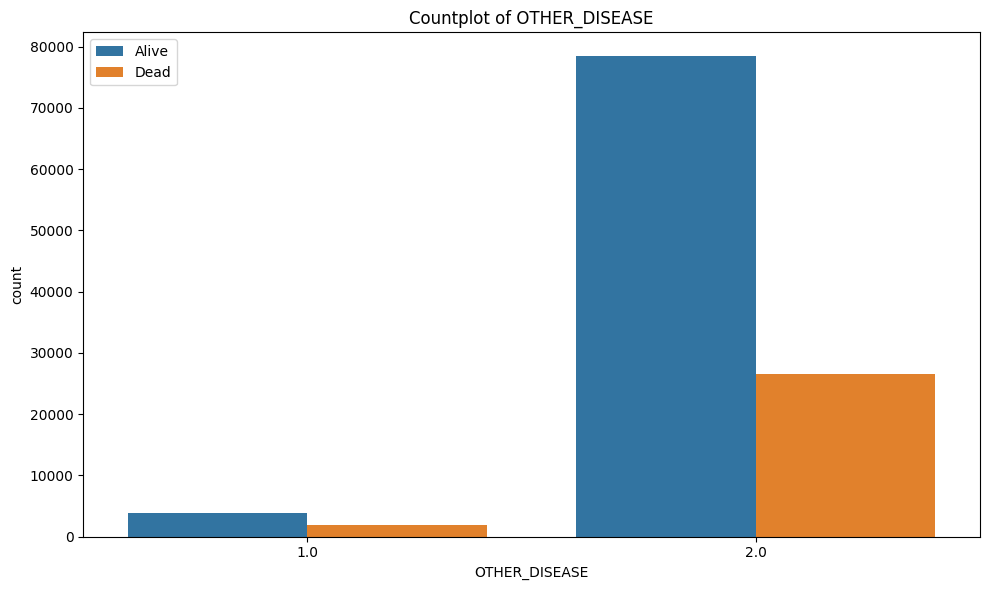

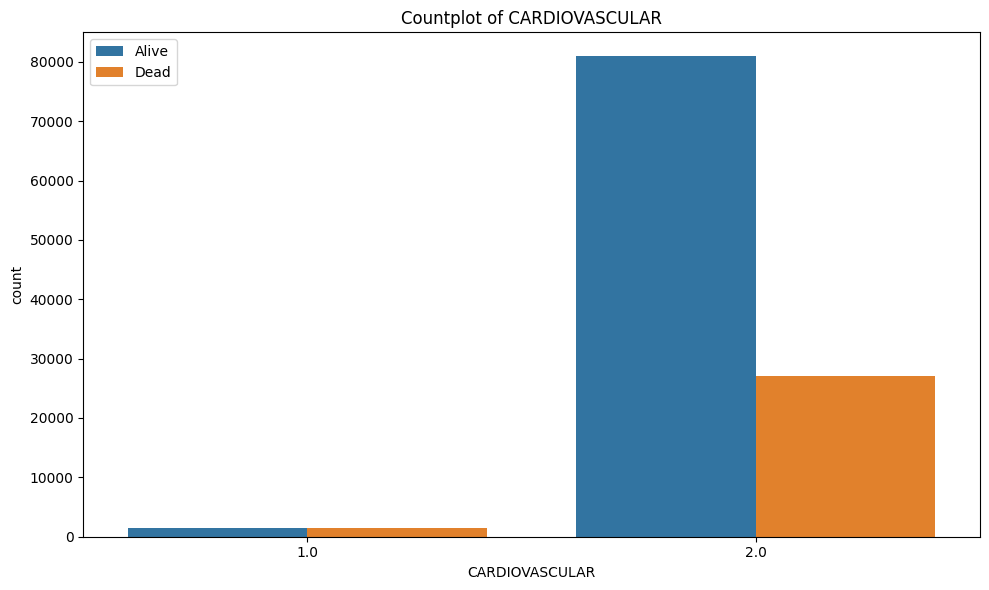

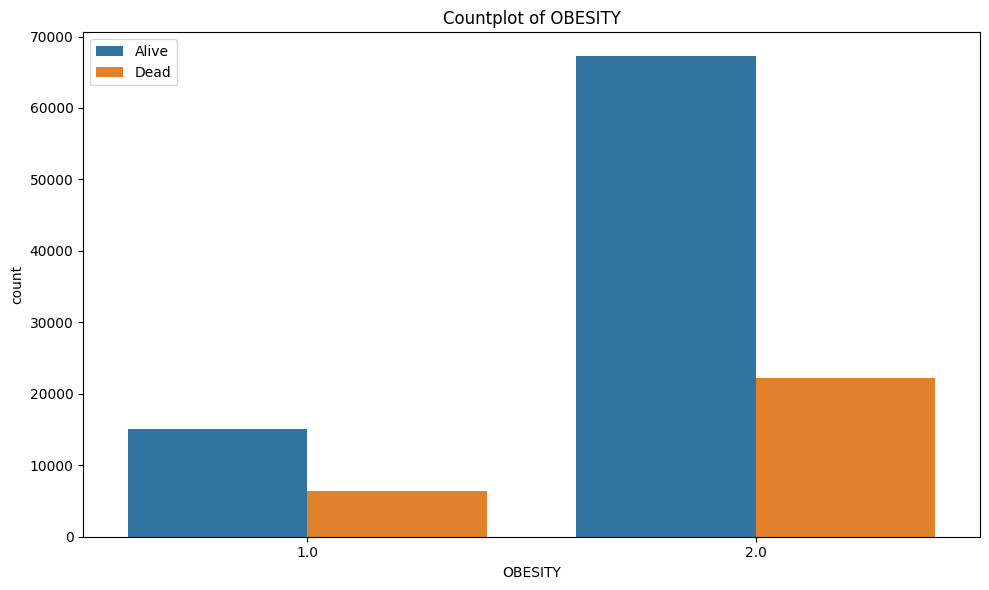

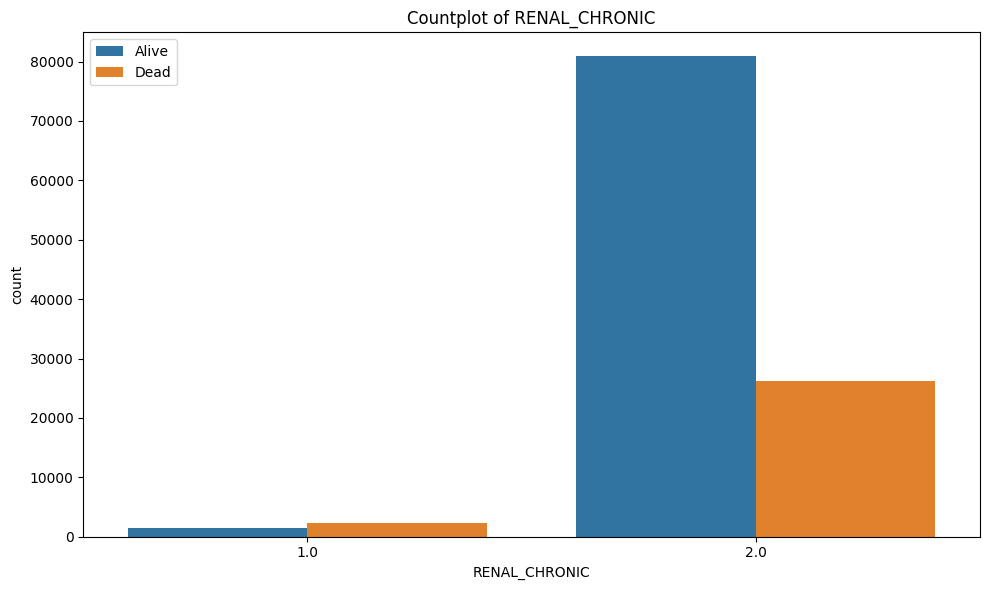

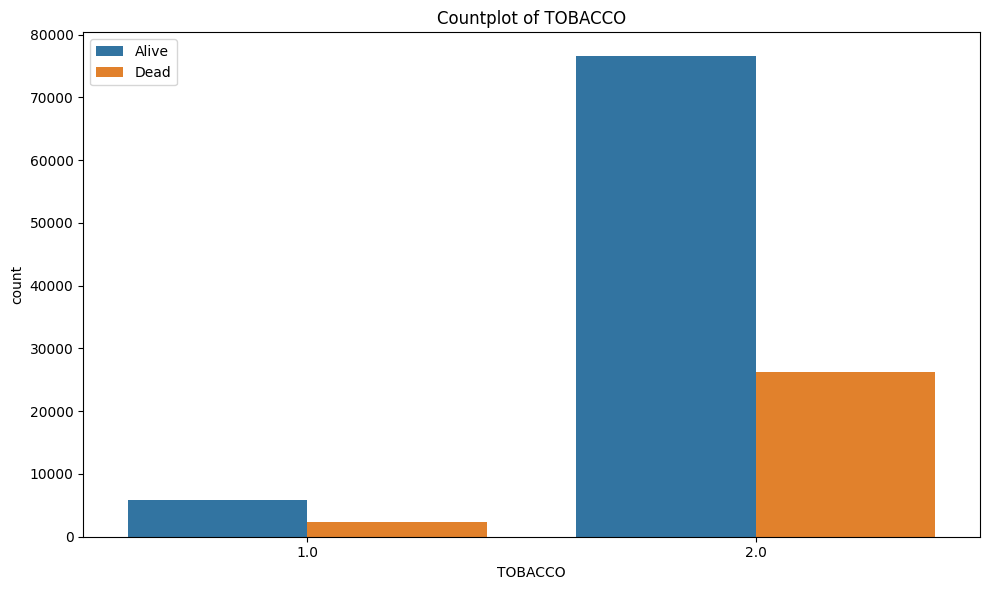

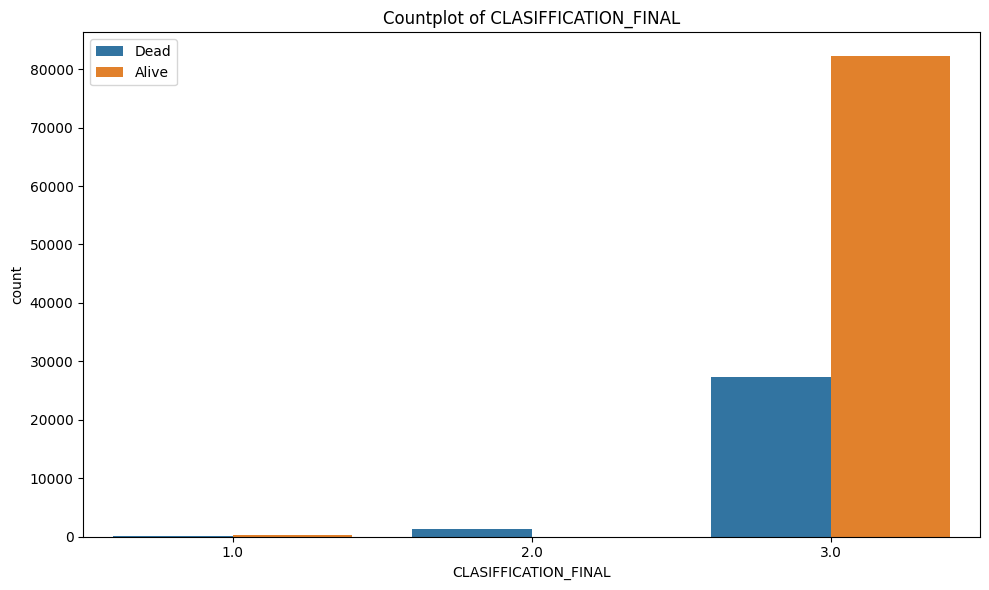

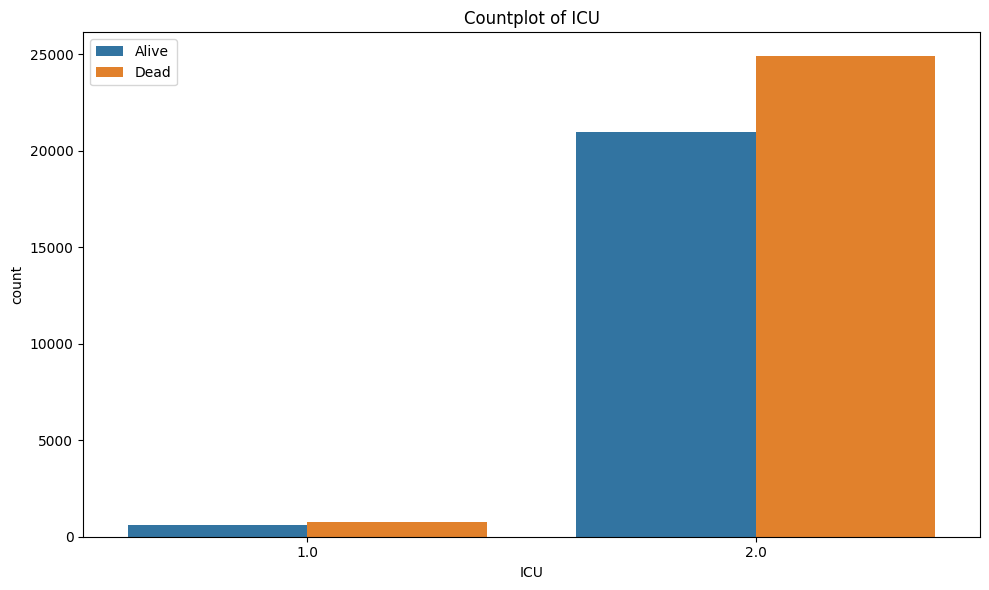

In [22]:
# Countplot of all symptoms & other health problems by number of alive and dead
died = df[df["CLASIFFICATION_FINAL"].isin([1, 2, 3])]
unique = died["DATE_DIED"].unique()
died["DATE_DIED"].fillna("Alive", inplace=True)
died["DATE_DIED"].replace(unique, "Dead", inplace=True)

symptoms = ["USMER", "MEDICAL_UNIT", "SEX", "PATIENT_TYPE", "INTUBED", "PNEUMONIA",
            "AGE", "PREGNANT", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "OTHER_DISEASE",
            "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "CLASIFFICATION_FINAL", "ICU"]

for symptom in symptoms:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=died[symptom],hue=died["DATE_DIED"])
  plt.title(f"Countplot of {symptoms[symptoms.index(symptom)]}")
  plt.legend(loc="upper left")
  plt.tight_layout()
  plt.show()

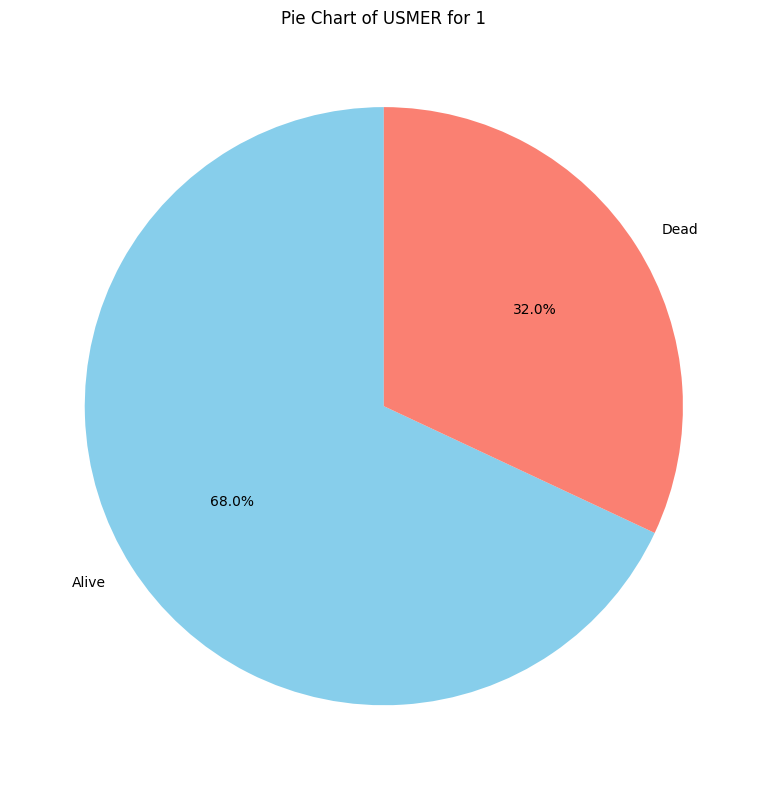

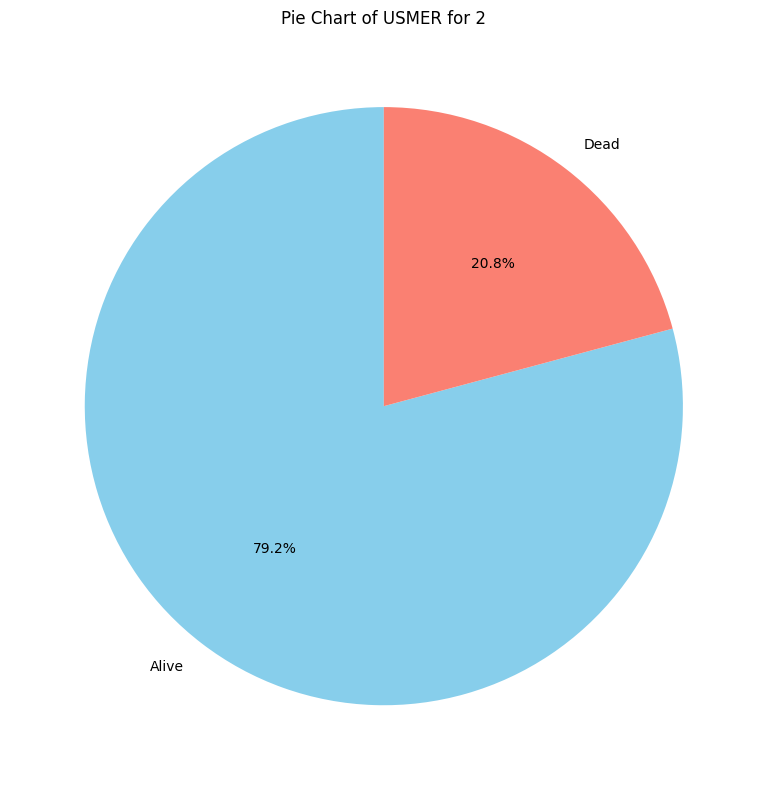

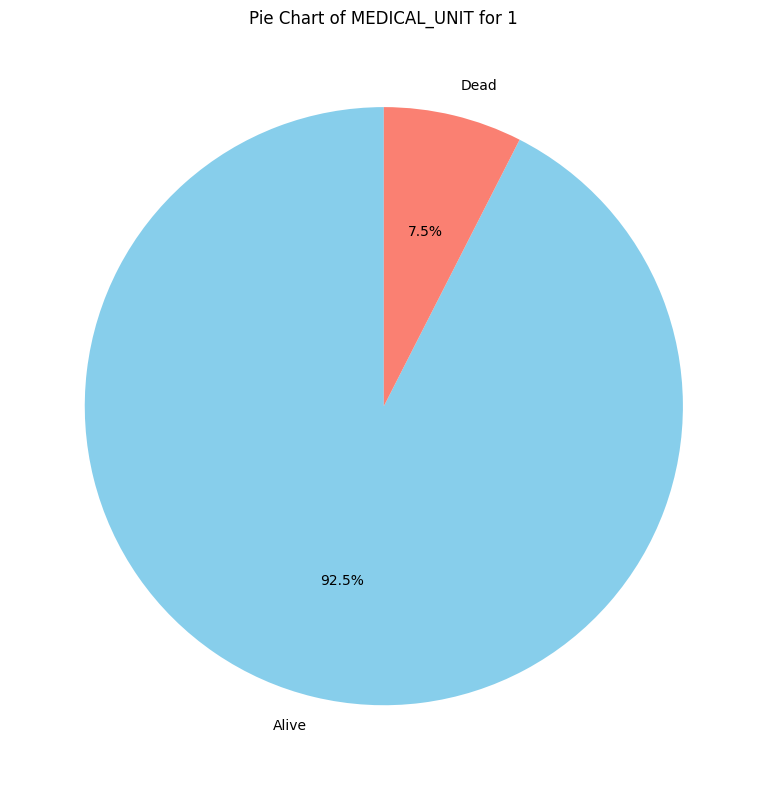

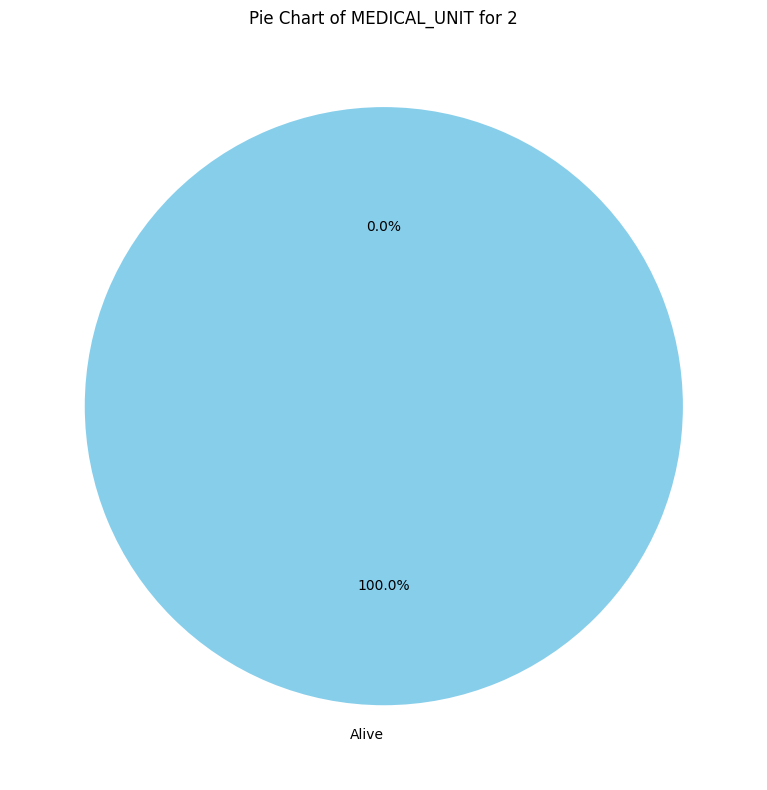

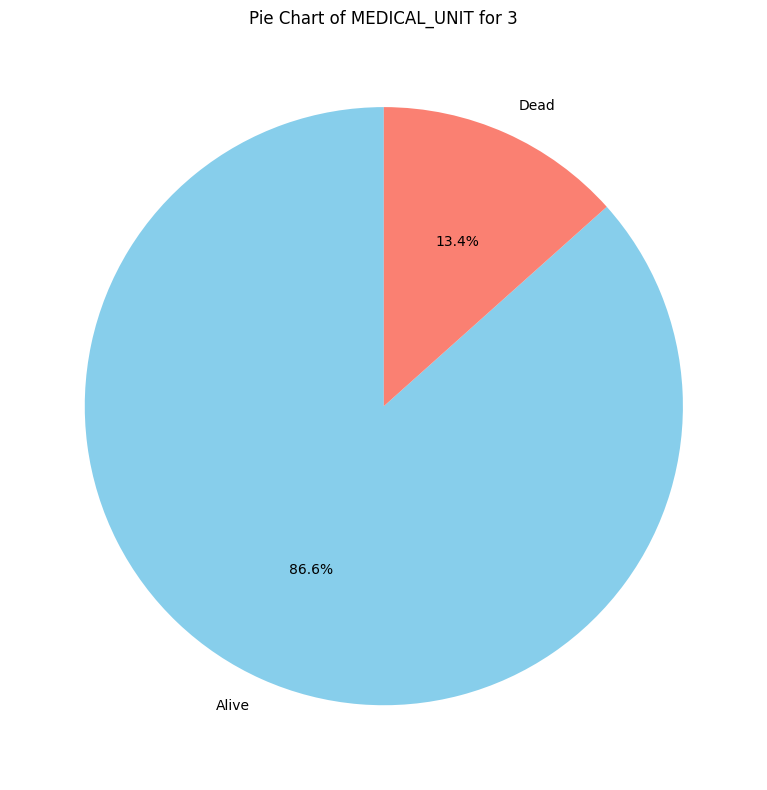

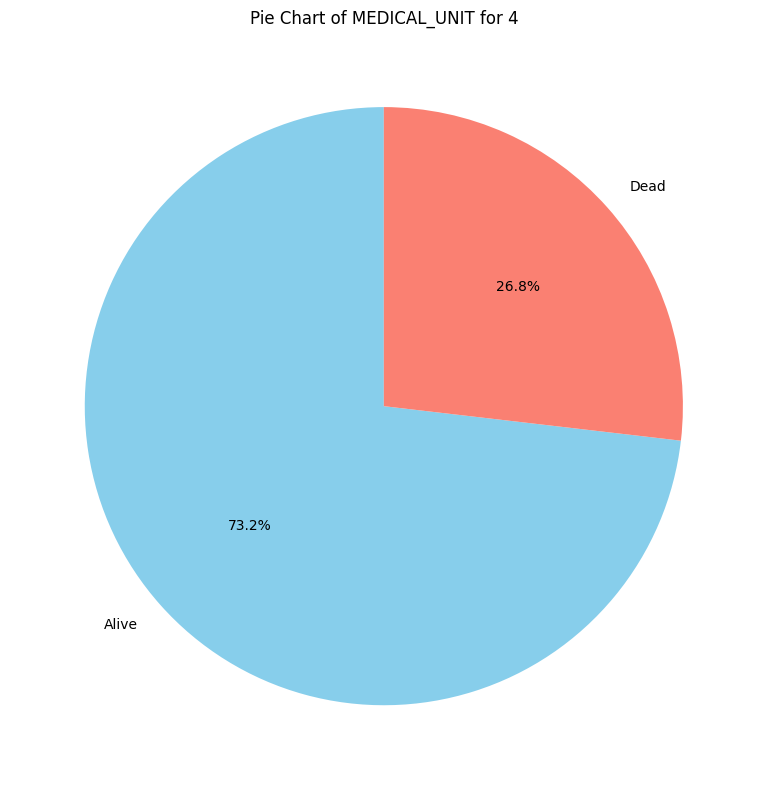

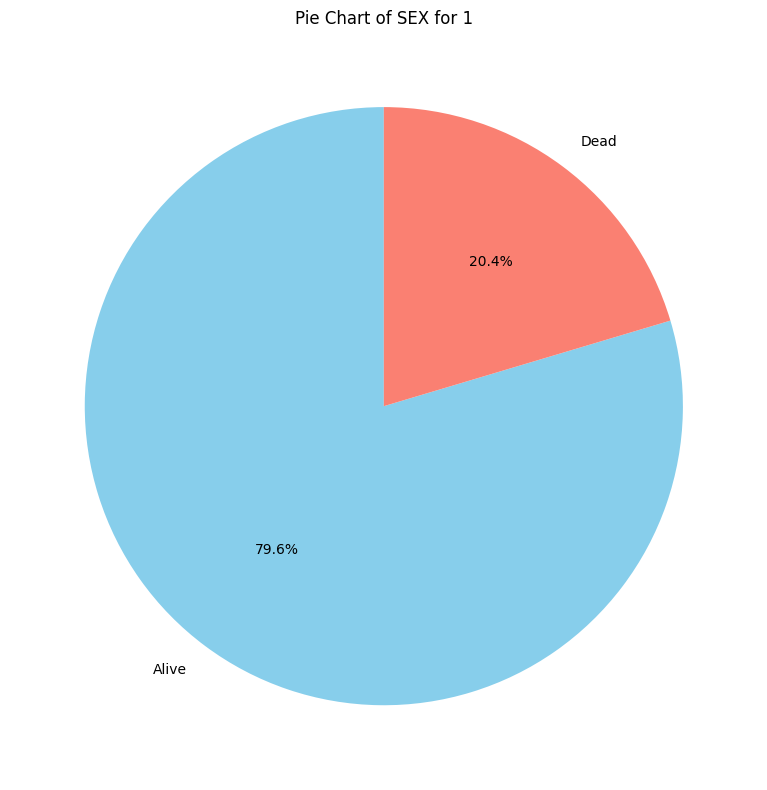

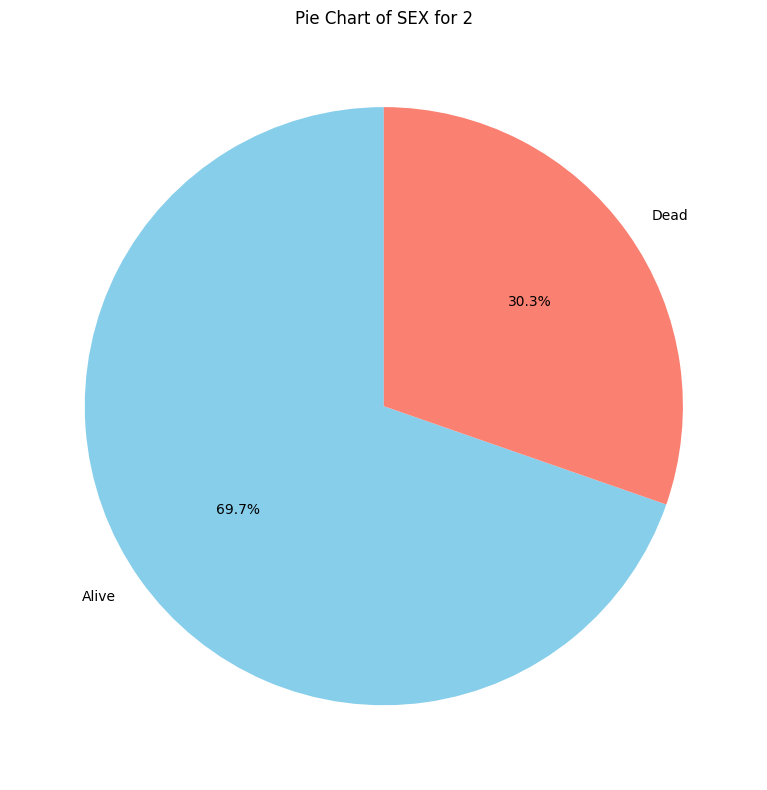

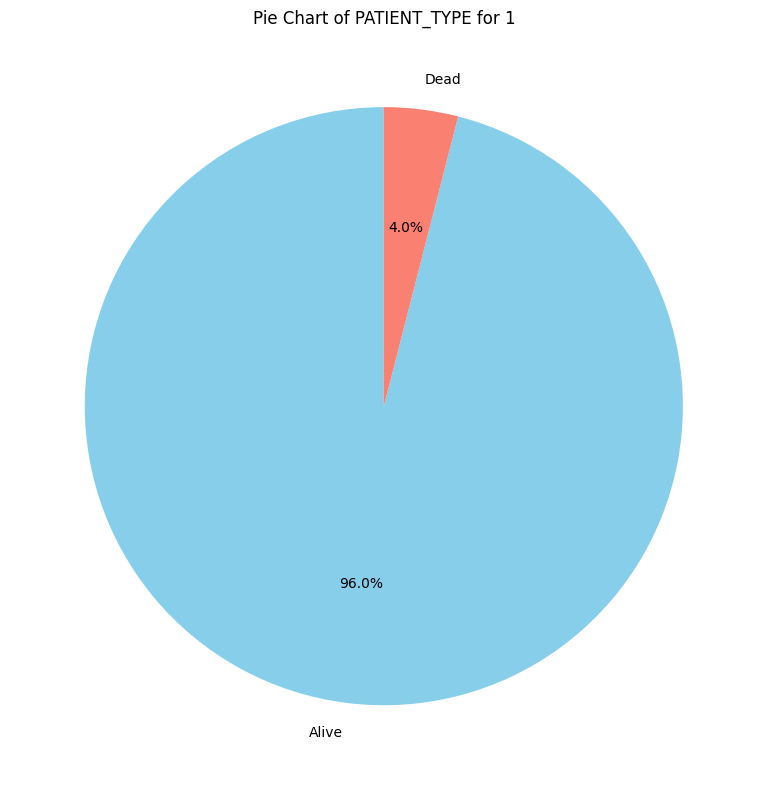

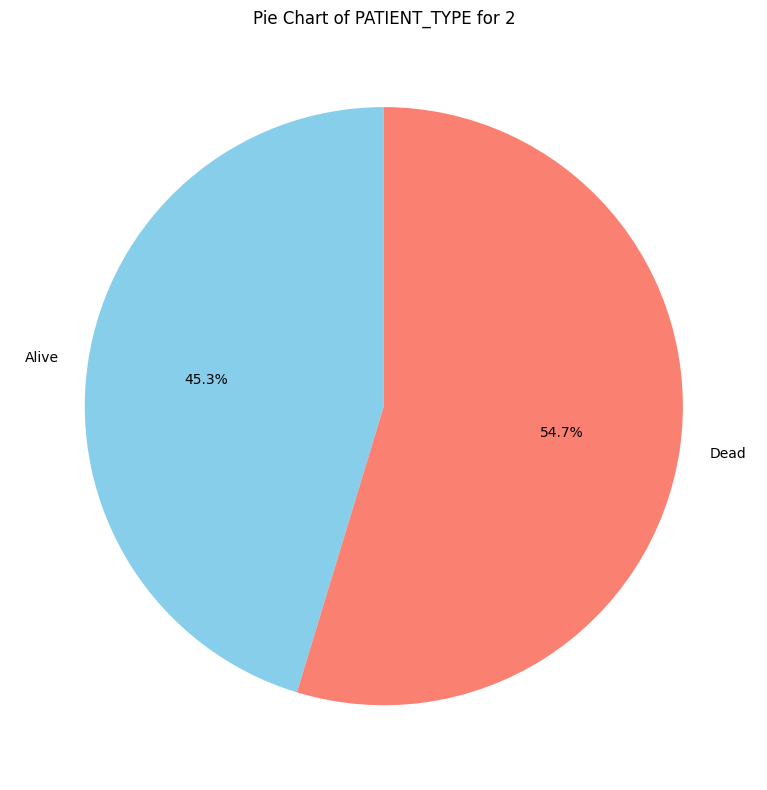

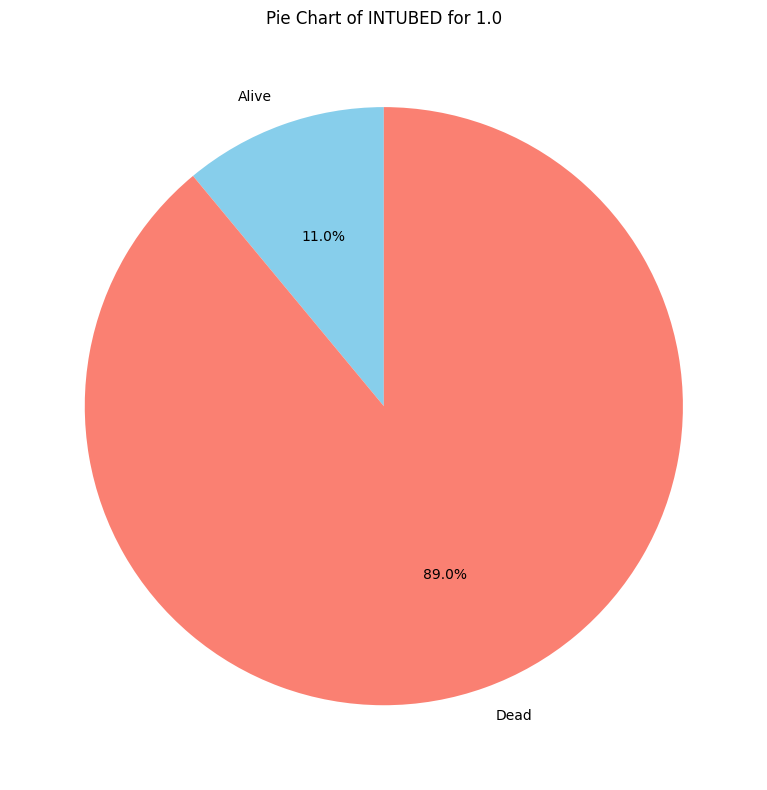

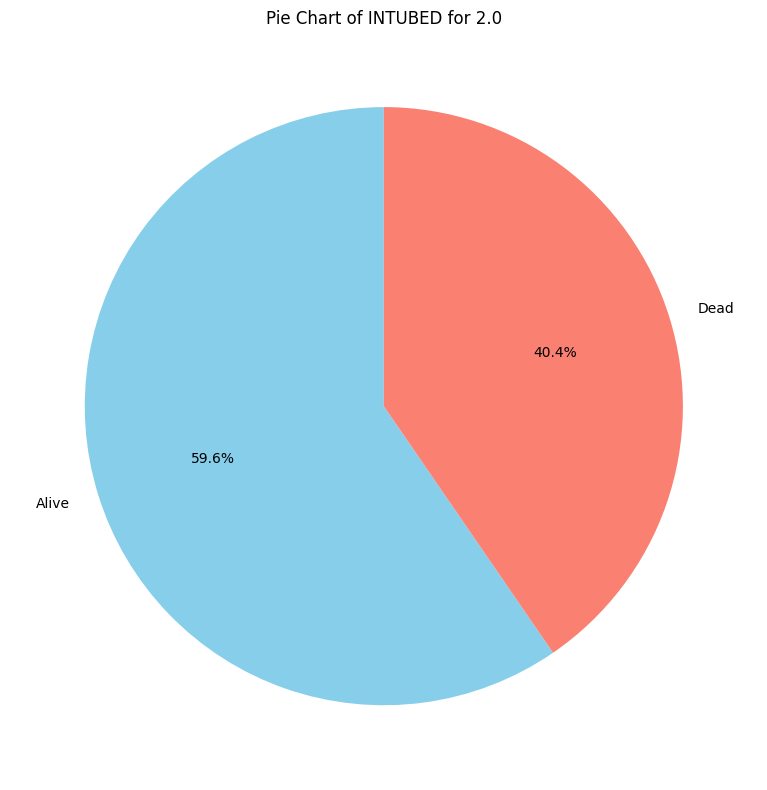

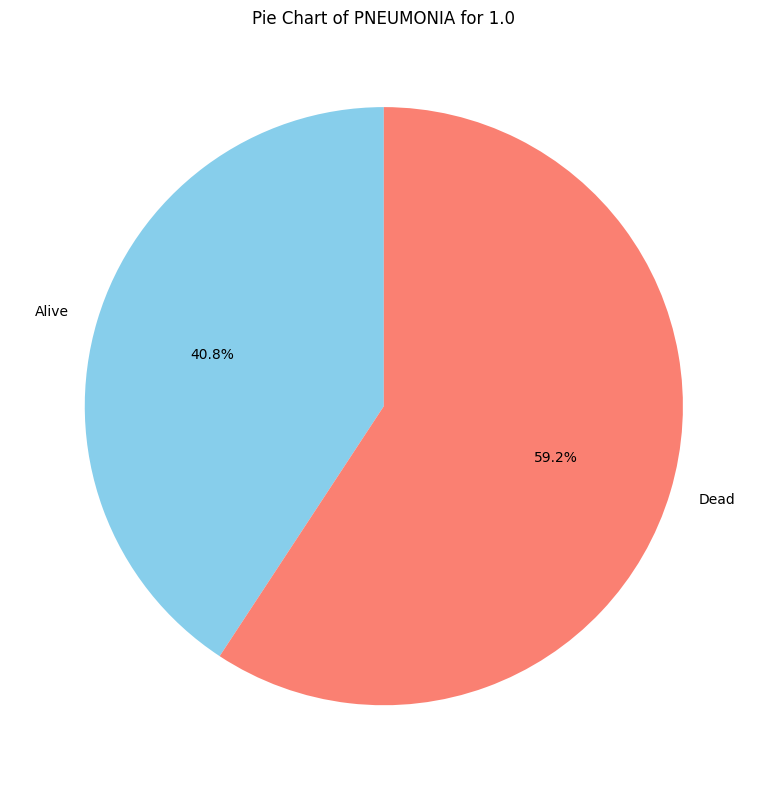

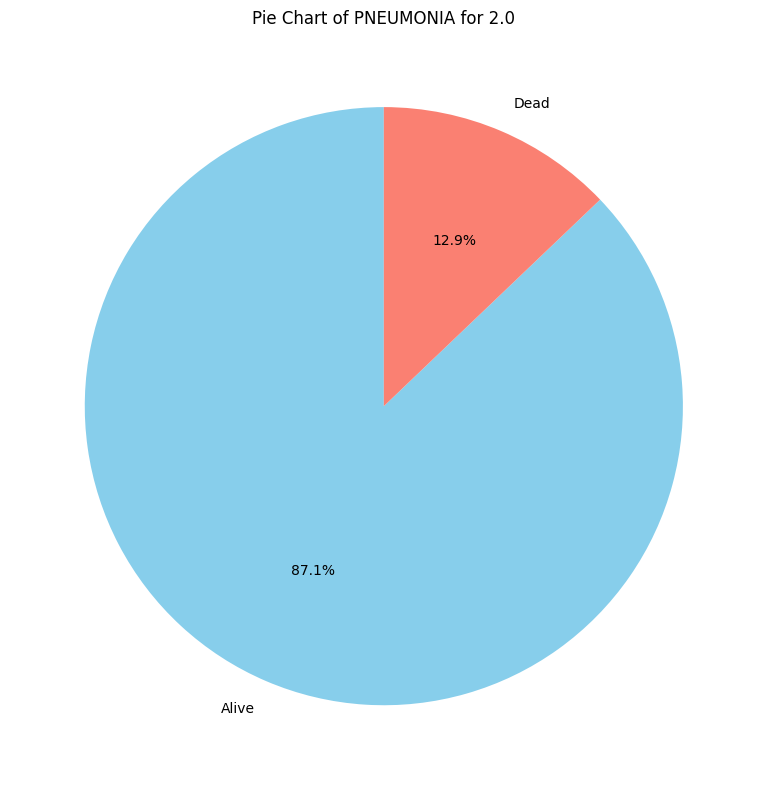

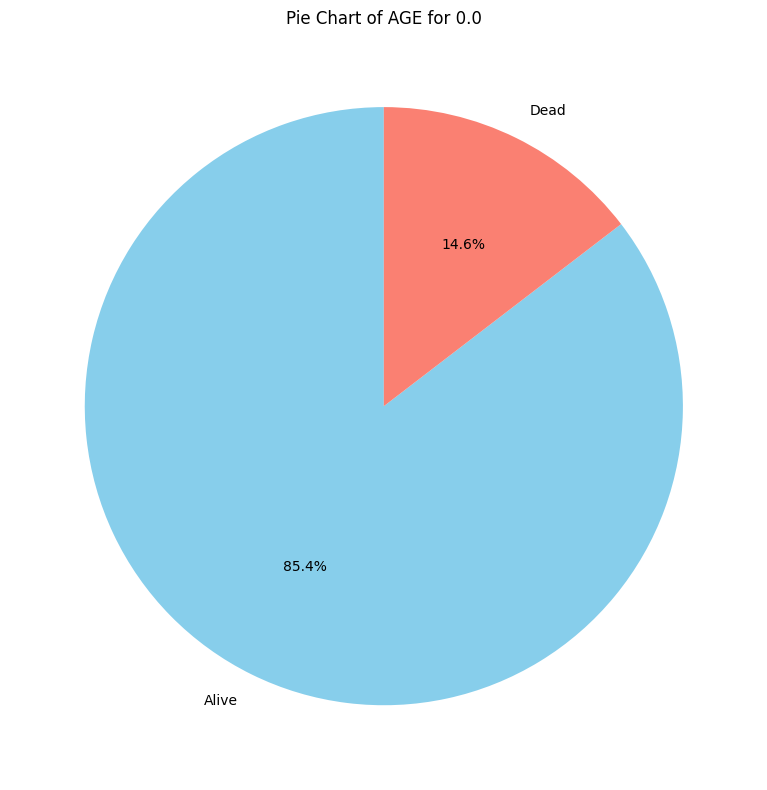

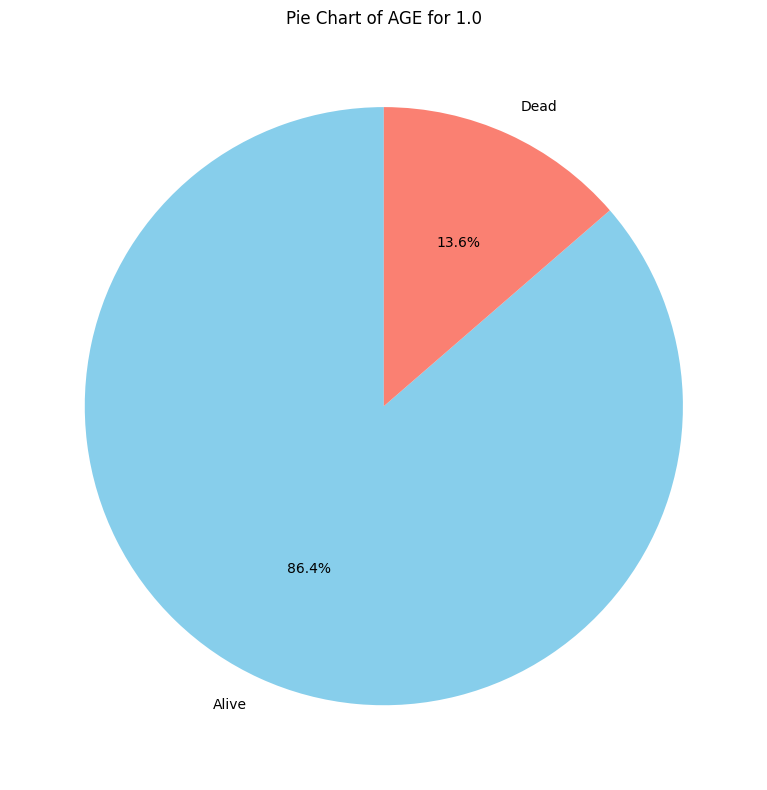

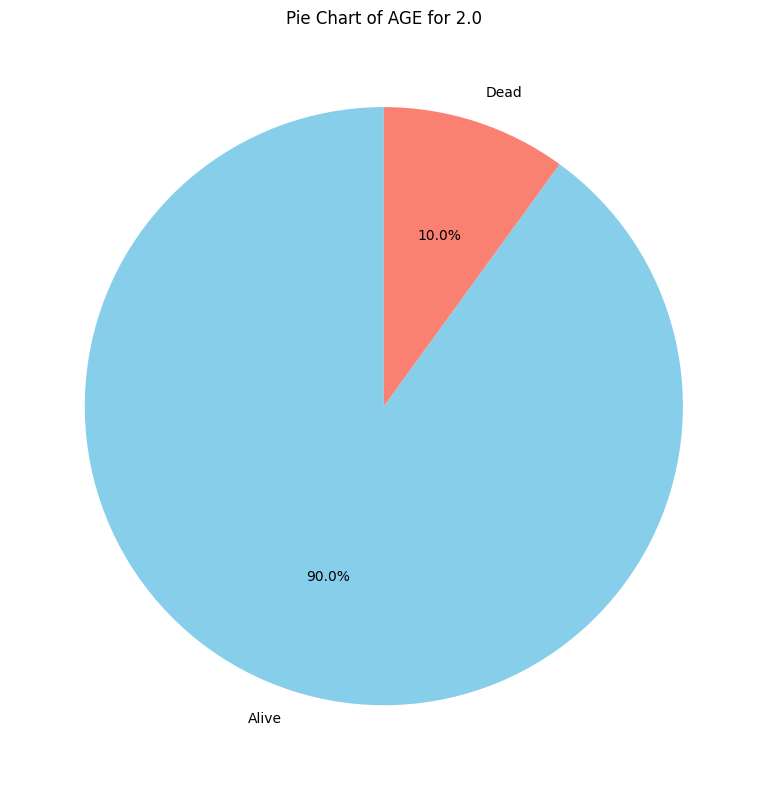

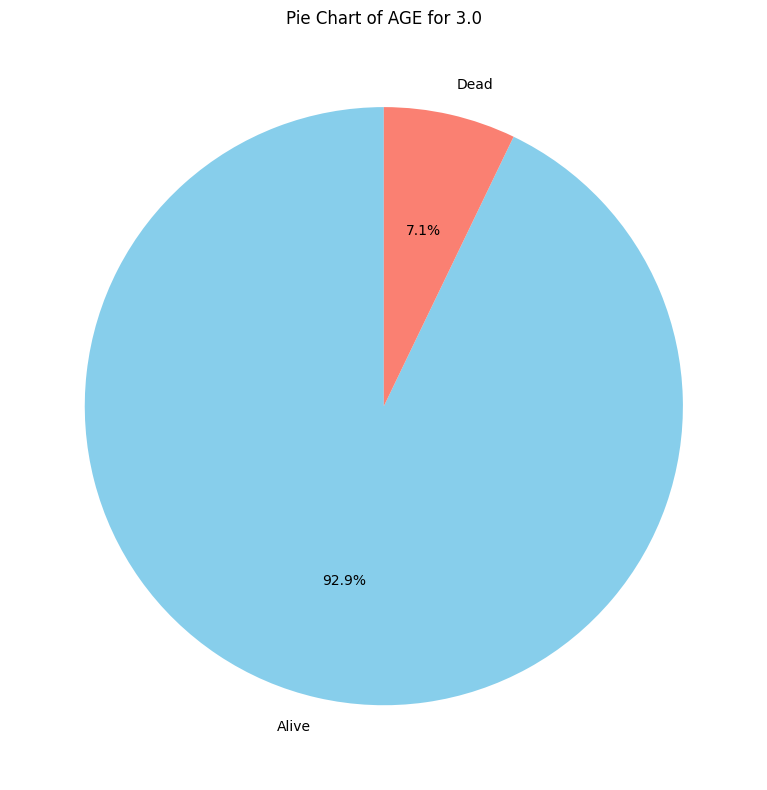

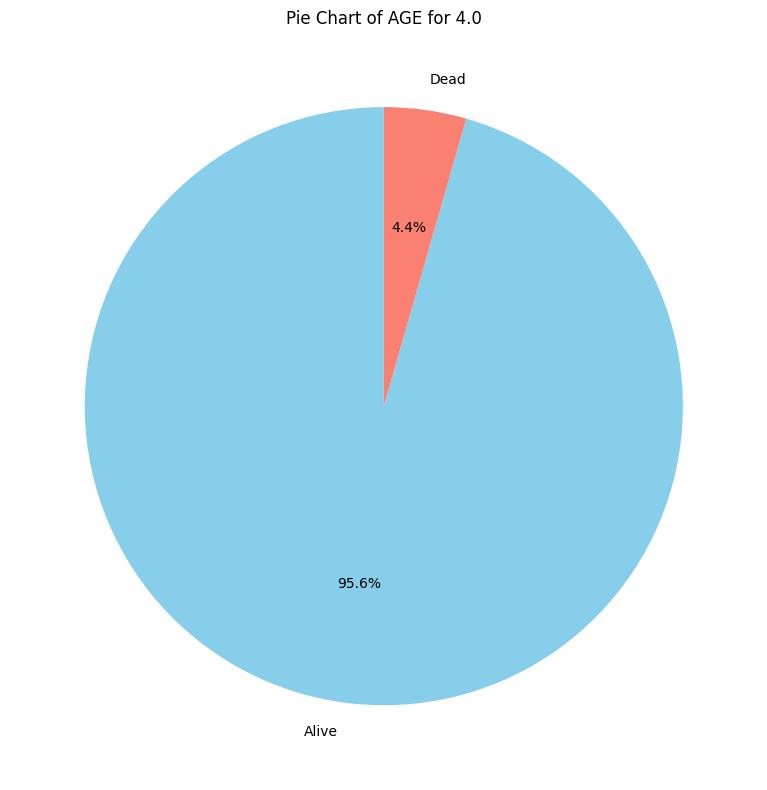

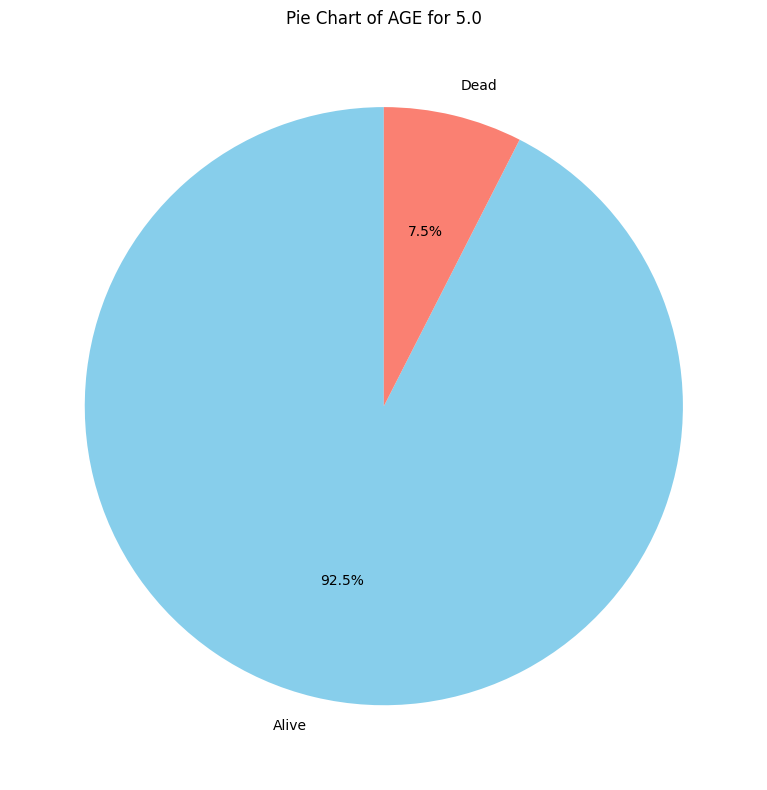

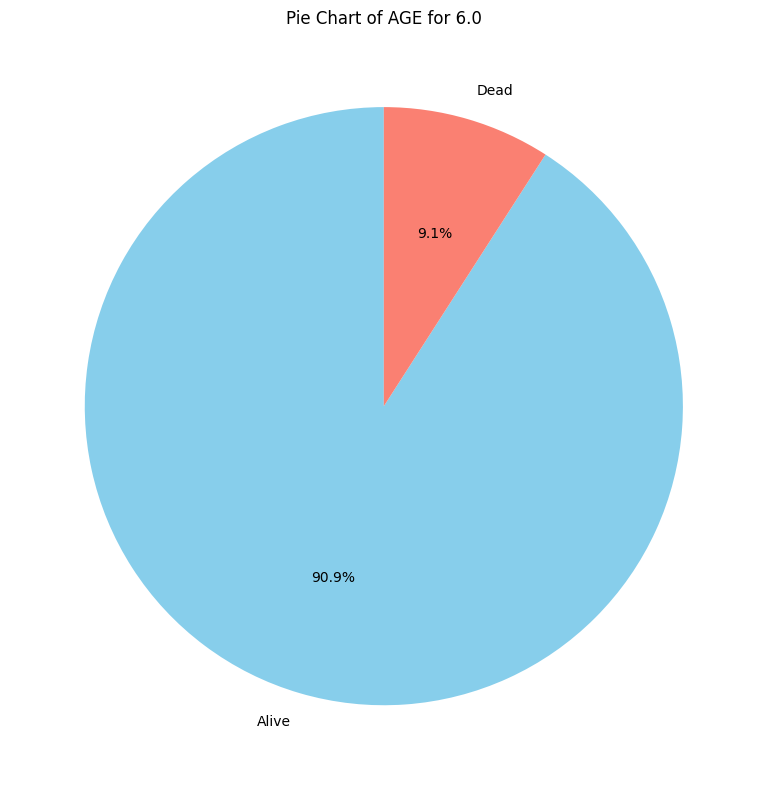

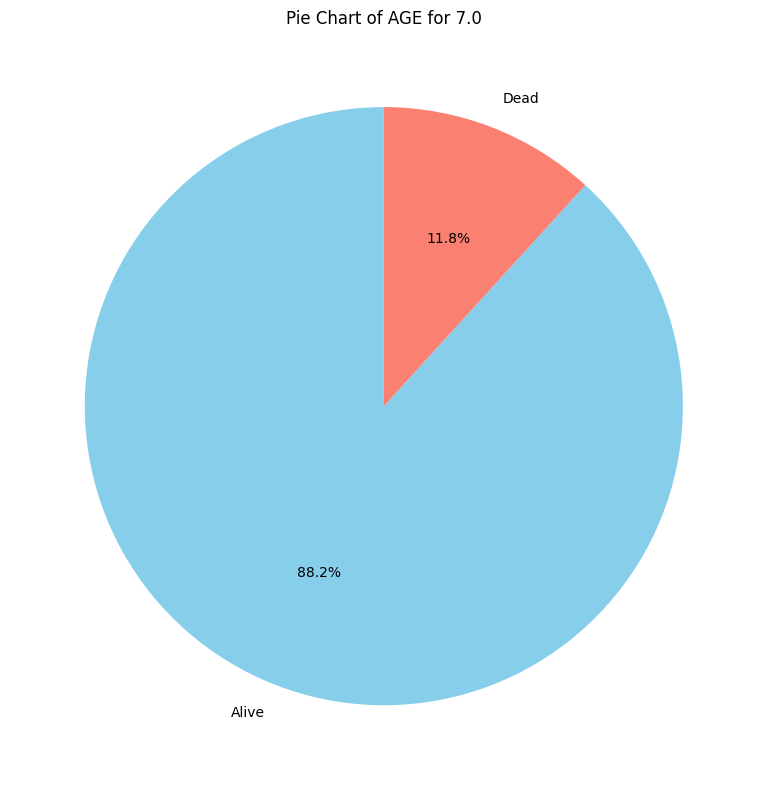

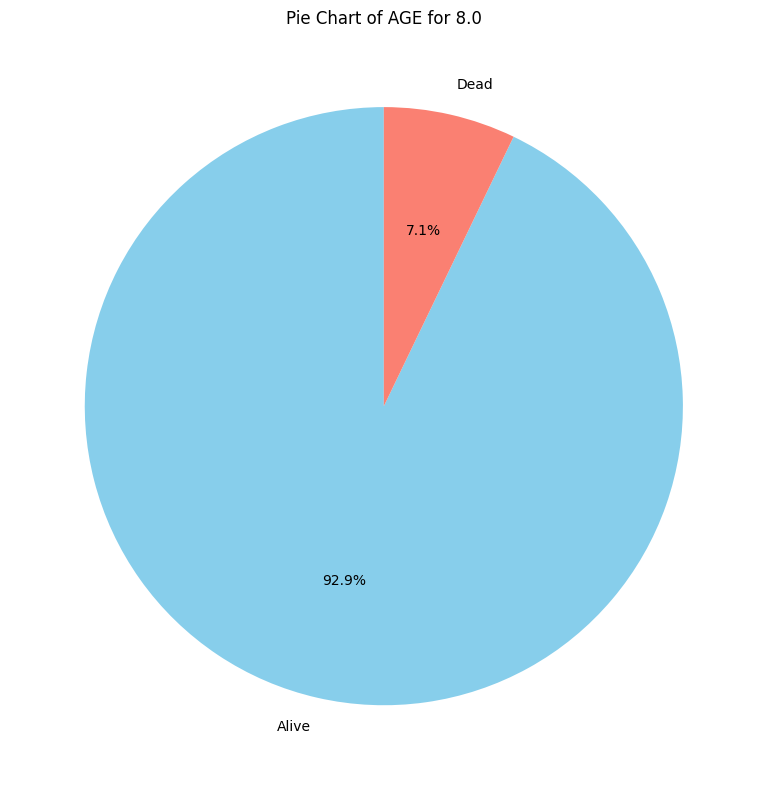

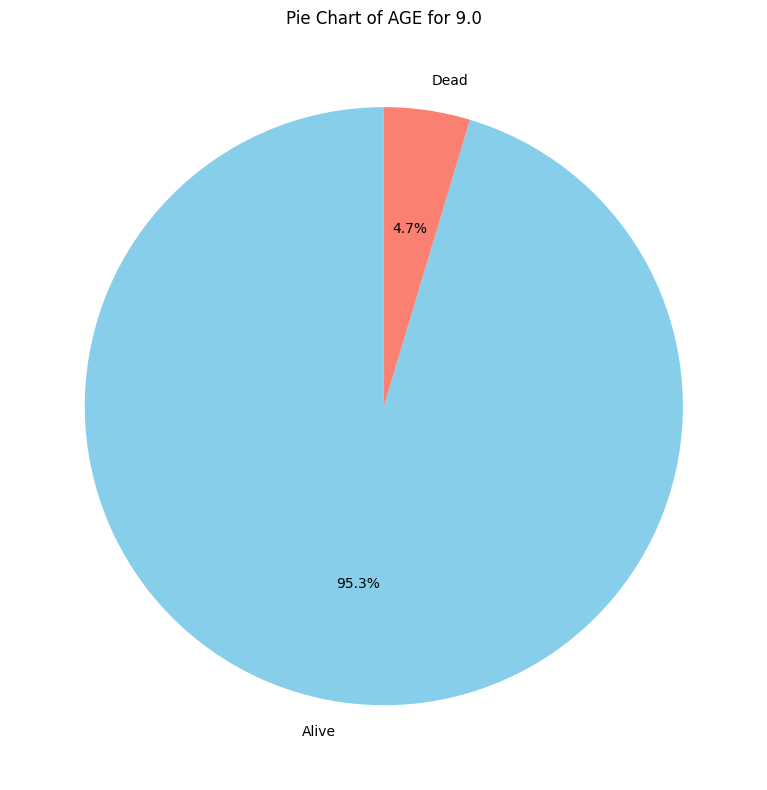

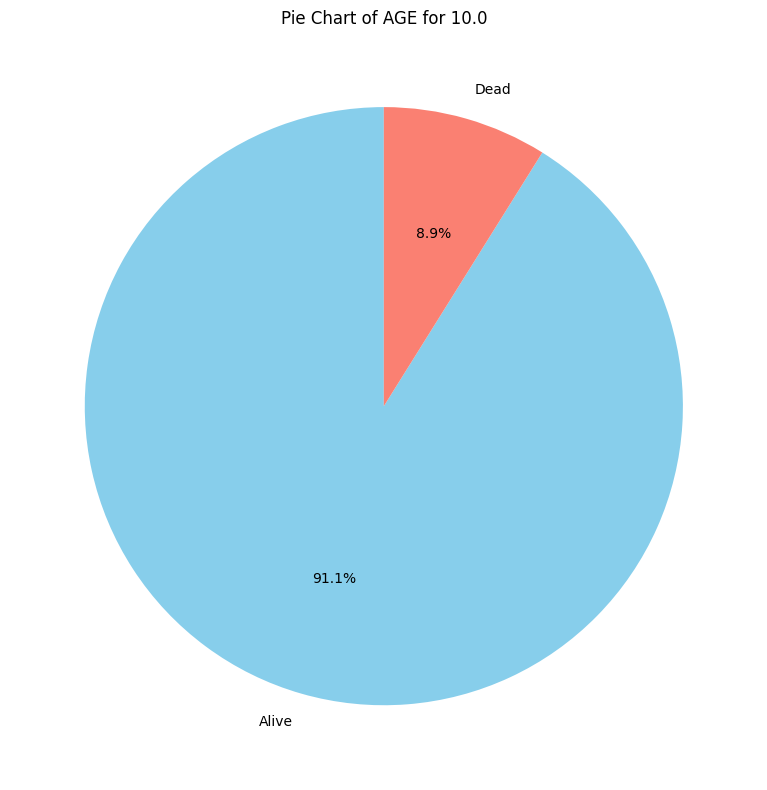

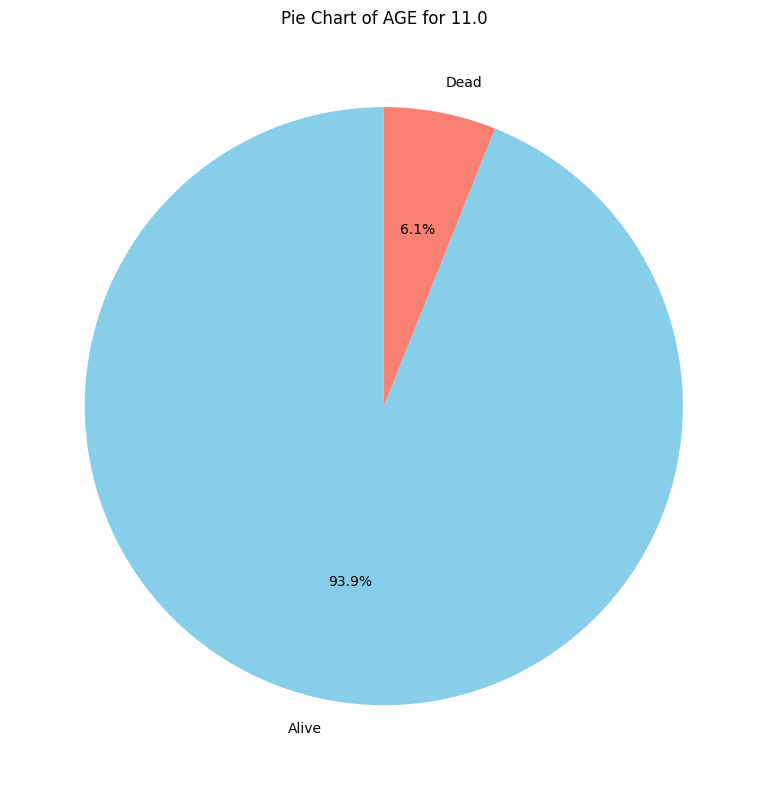

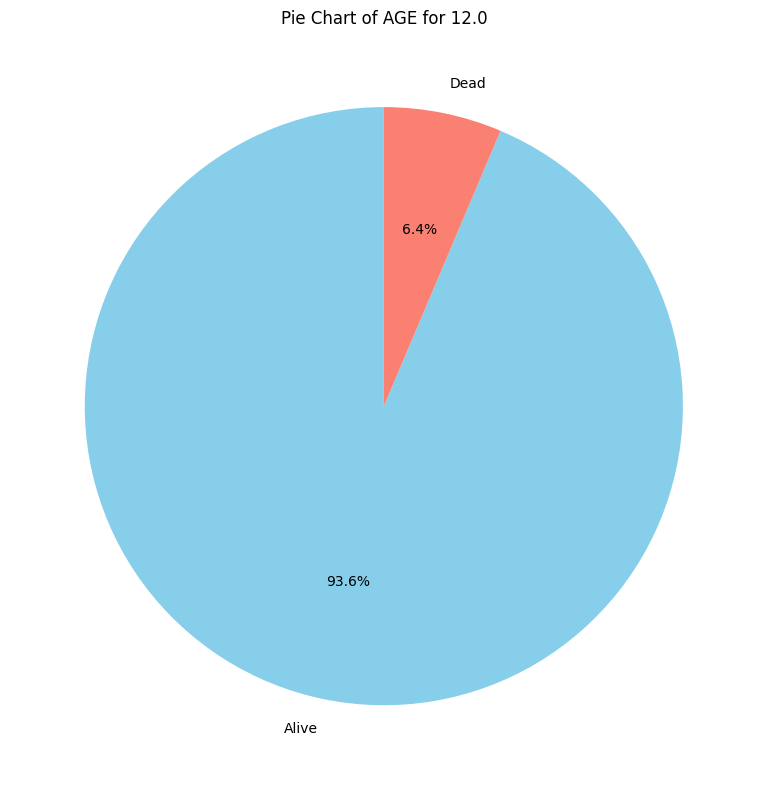

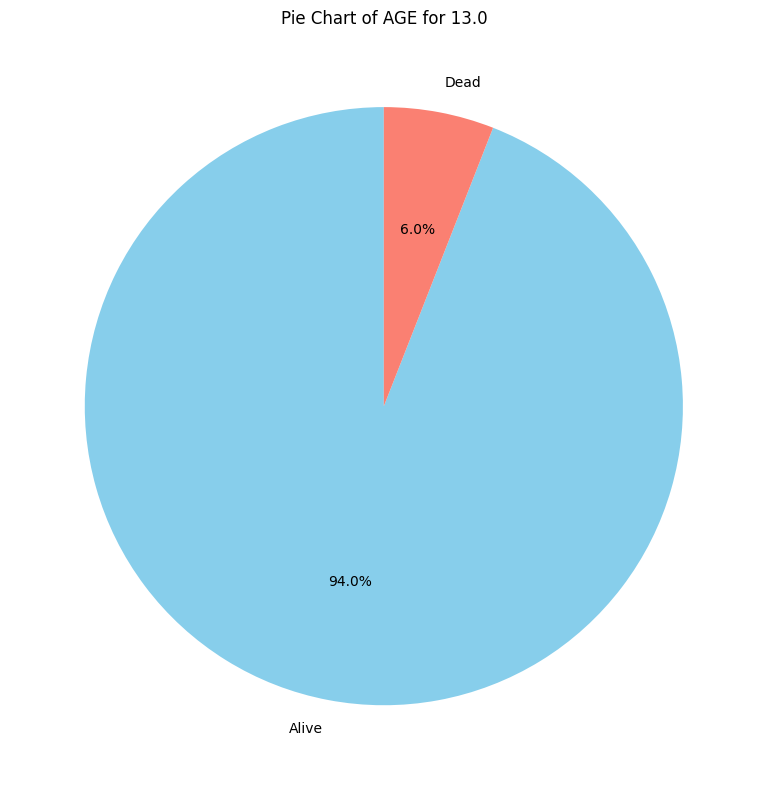

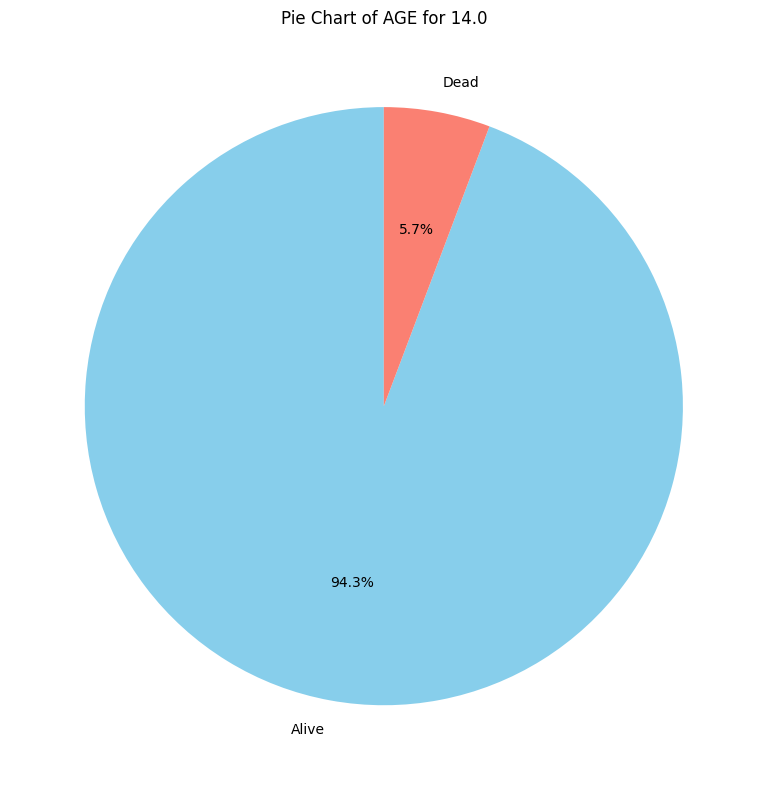

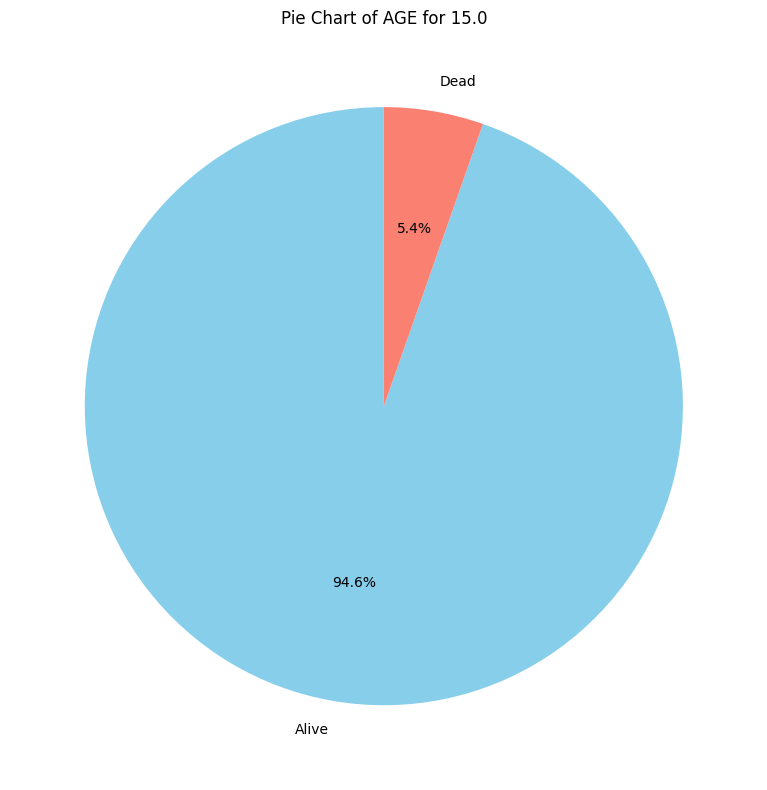

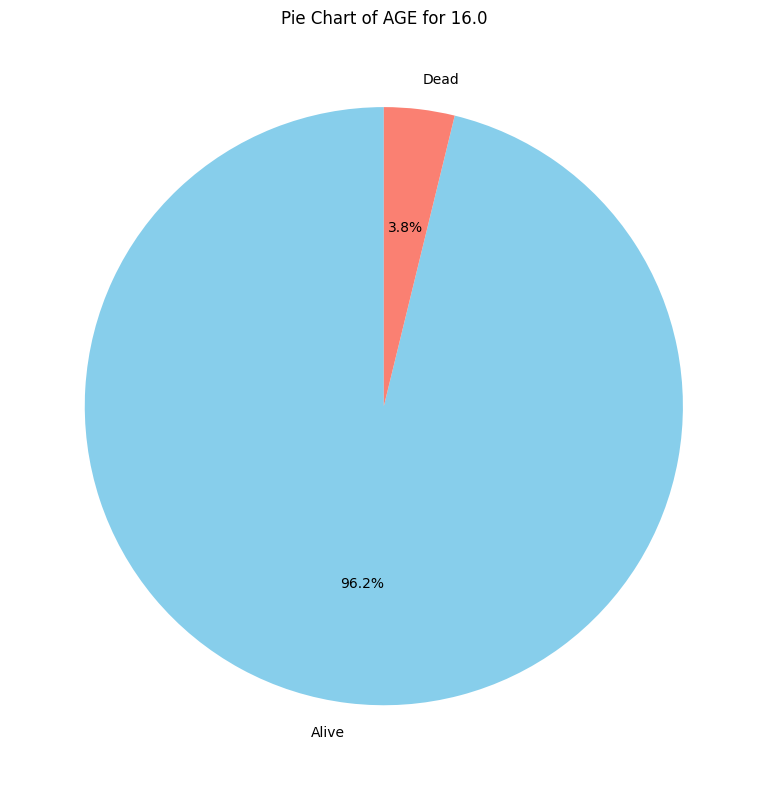

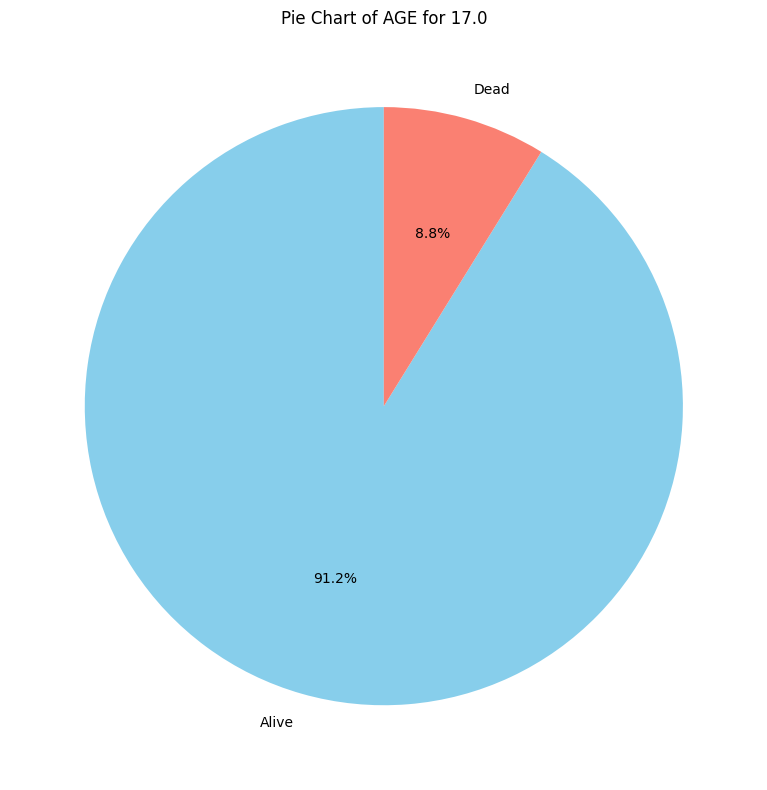

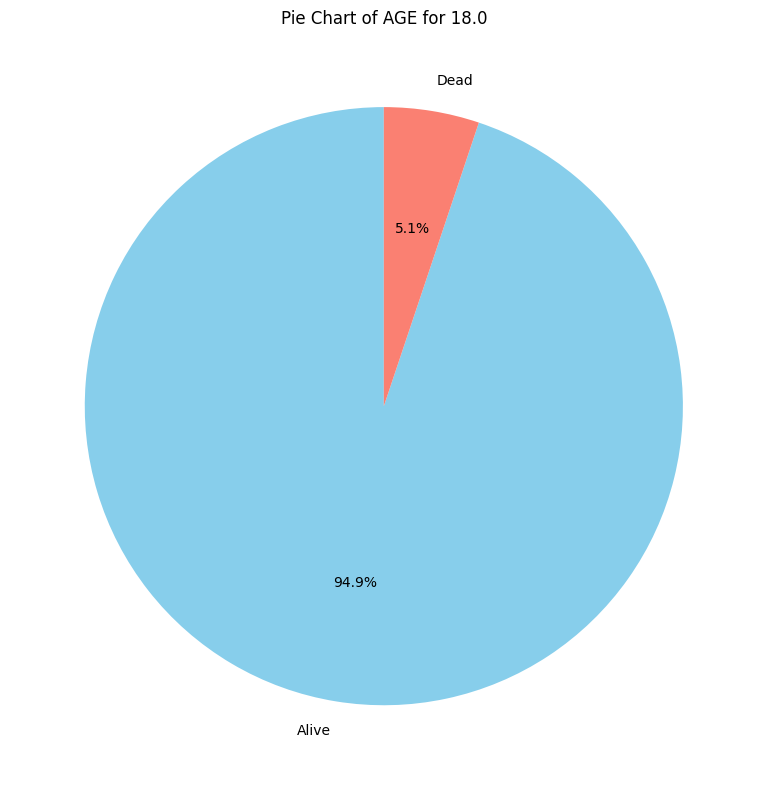

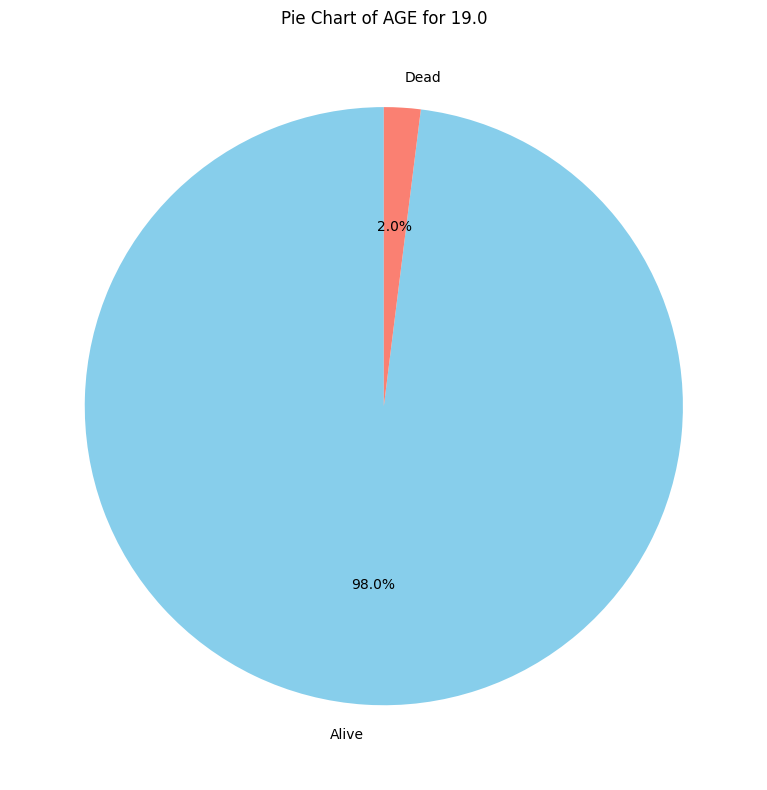

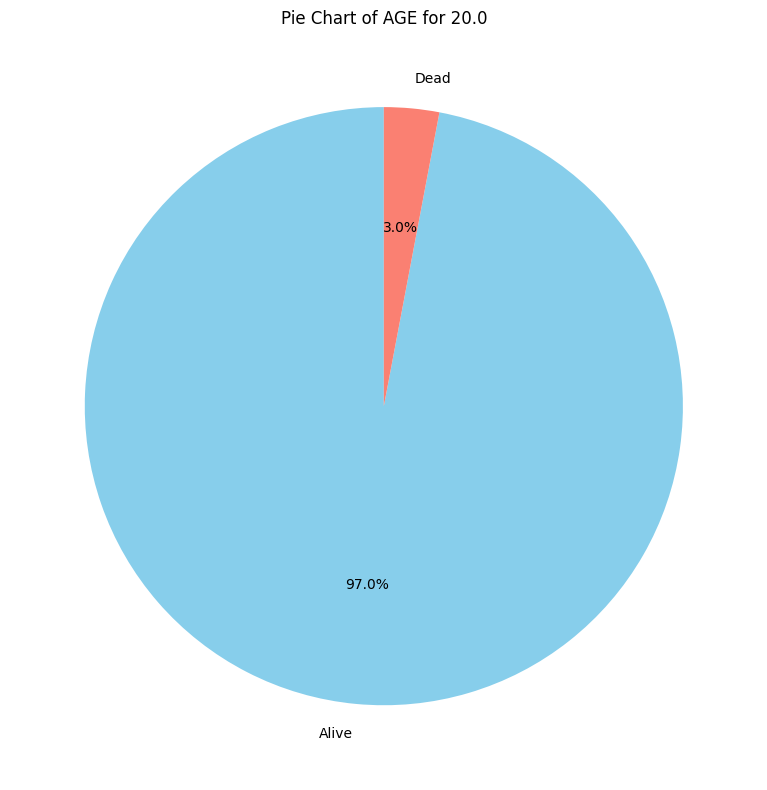

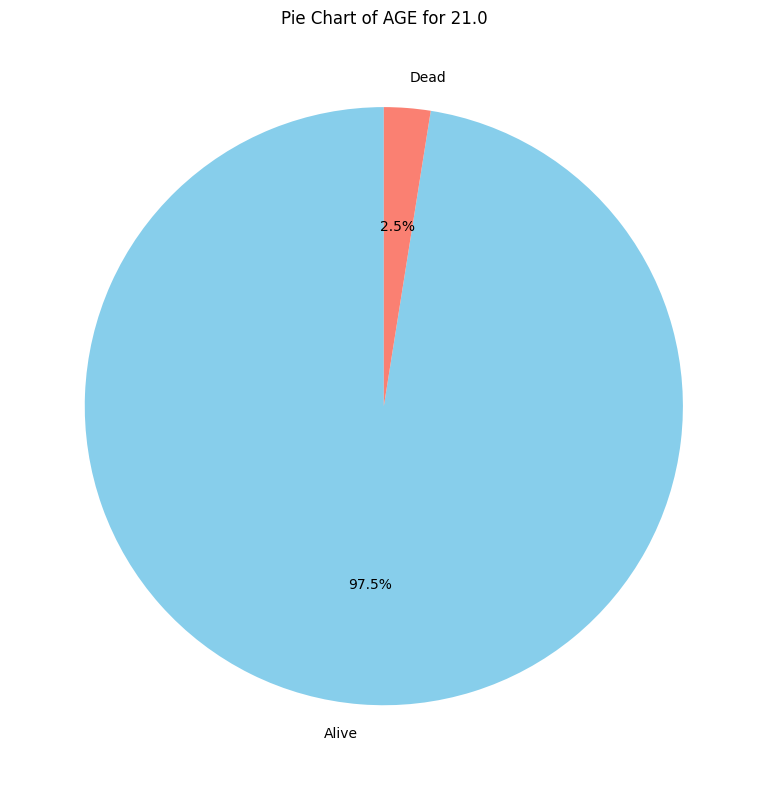

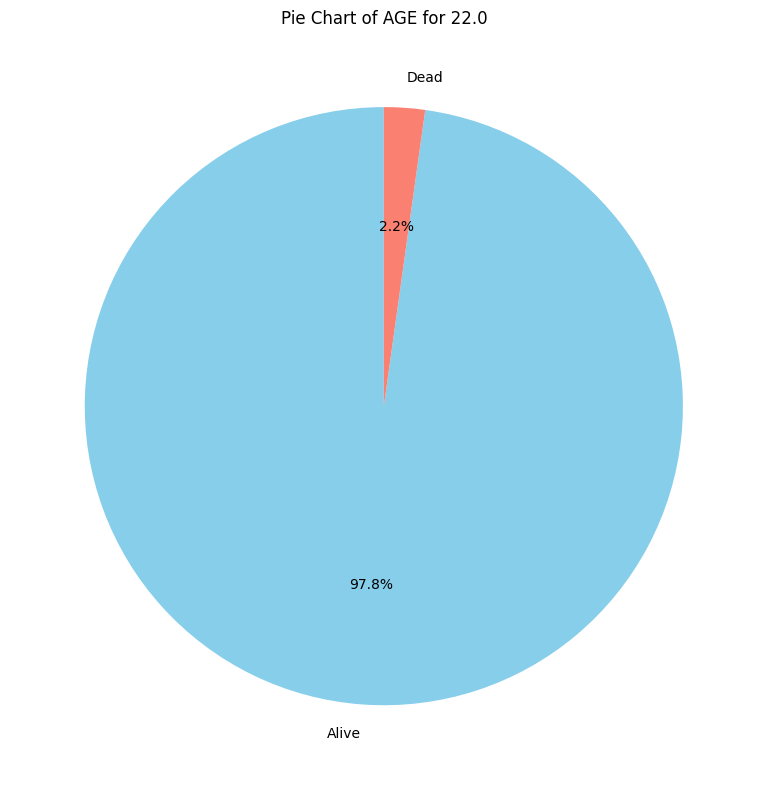

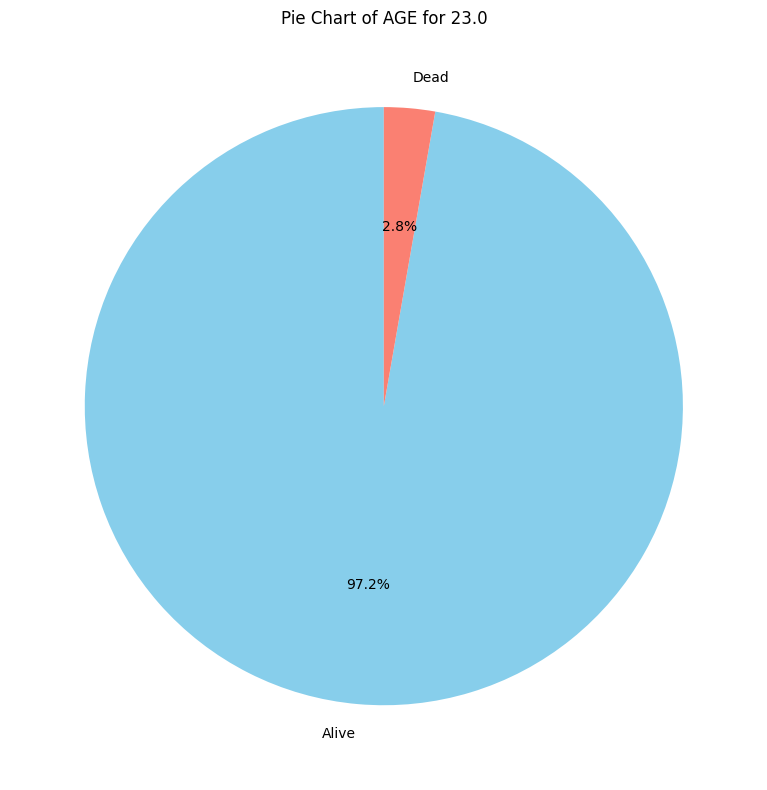

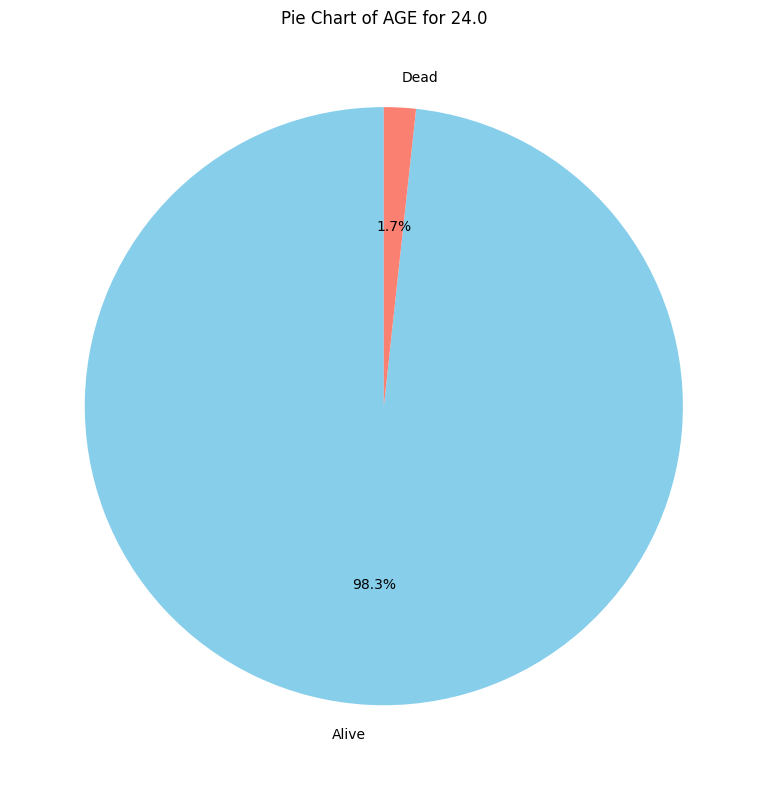

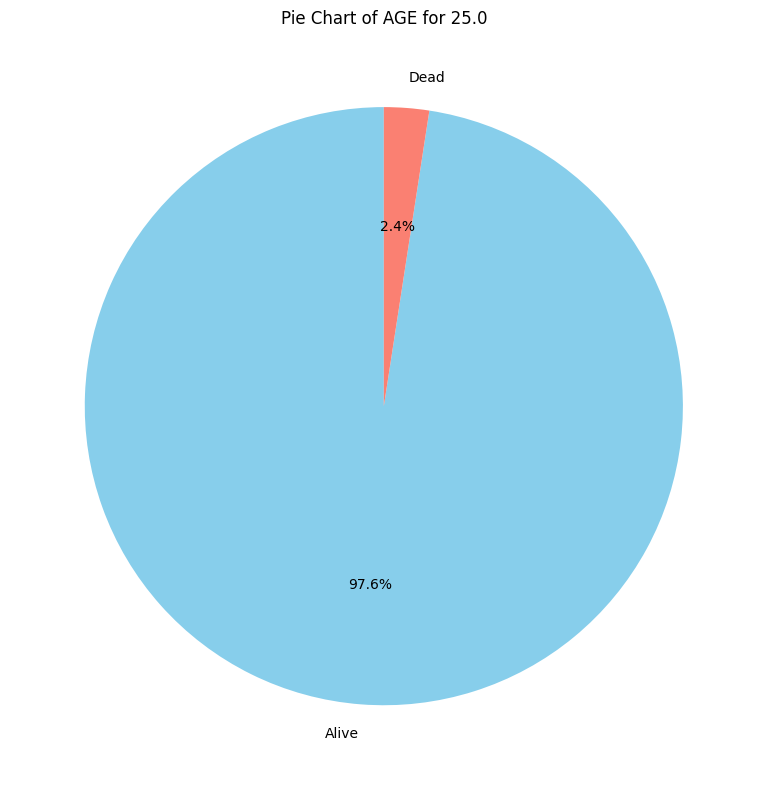

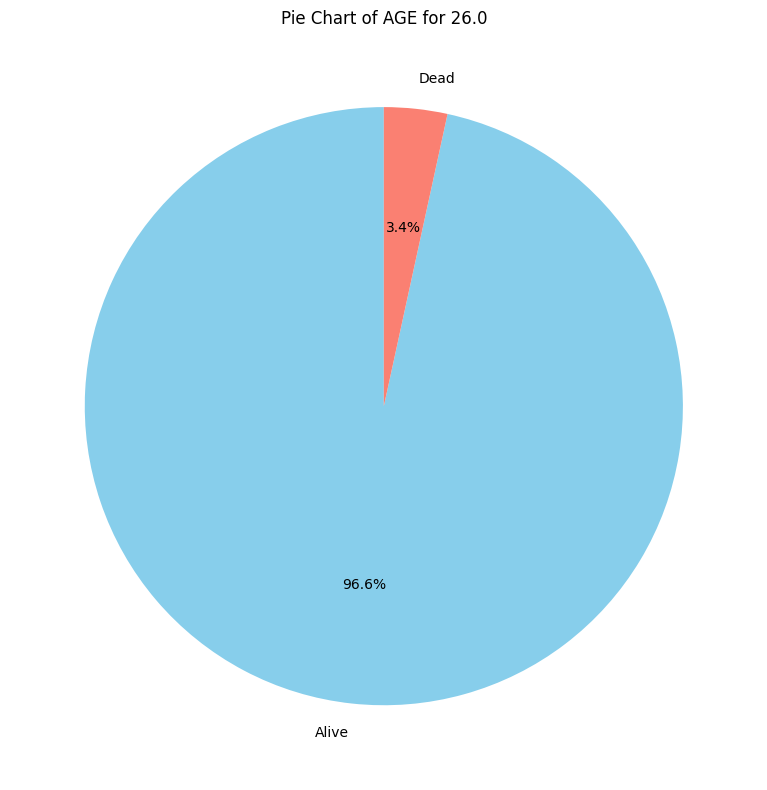

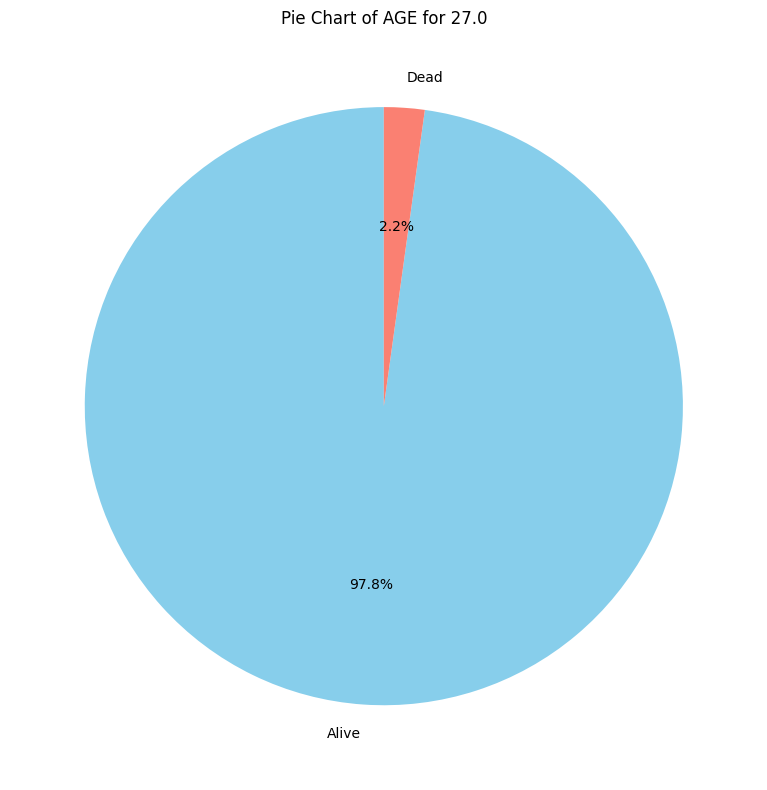

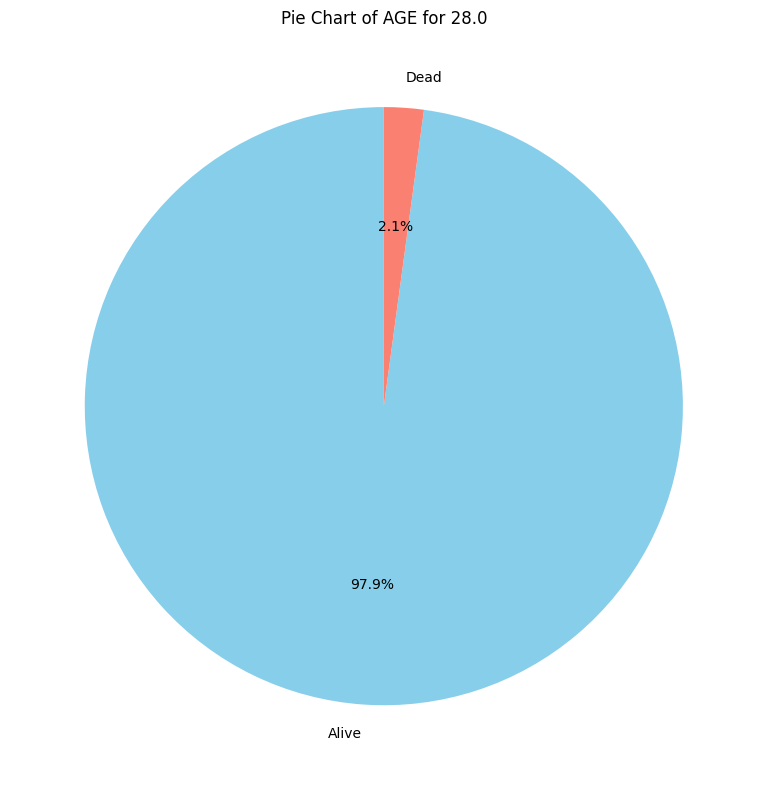

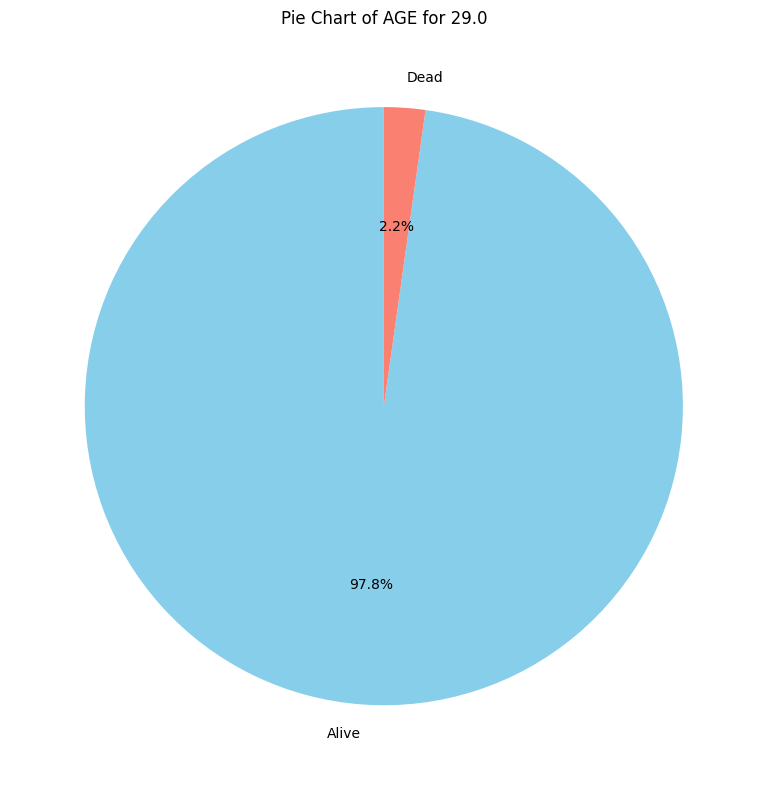

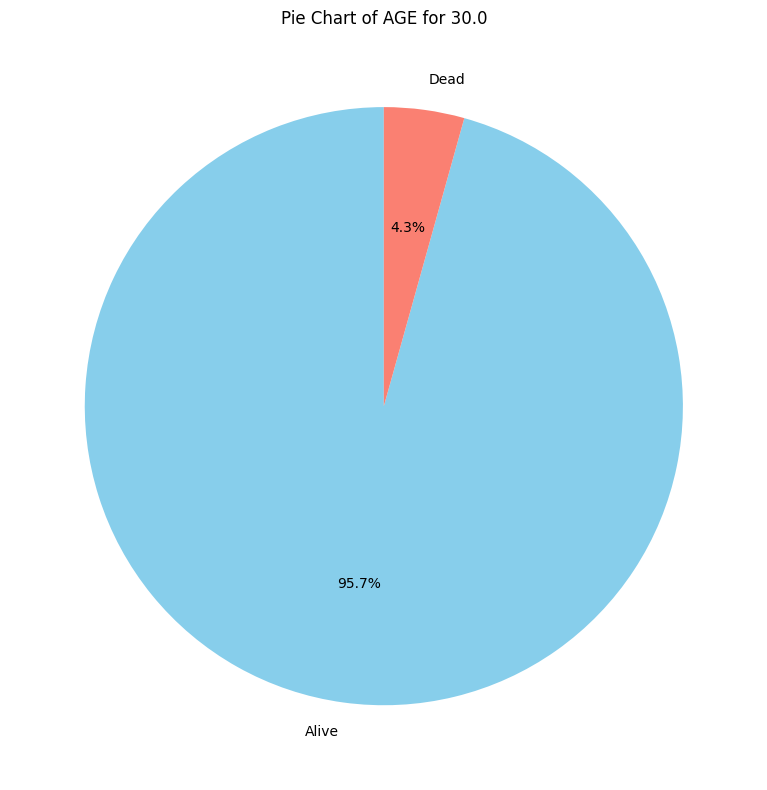

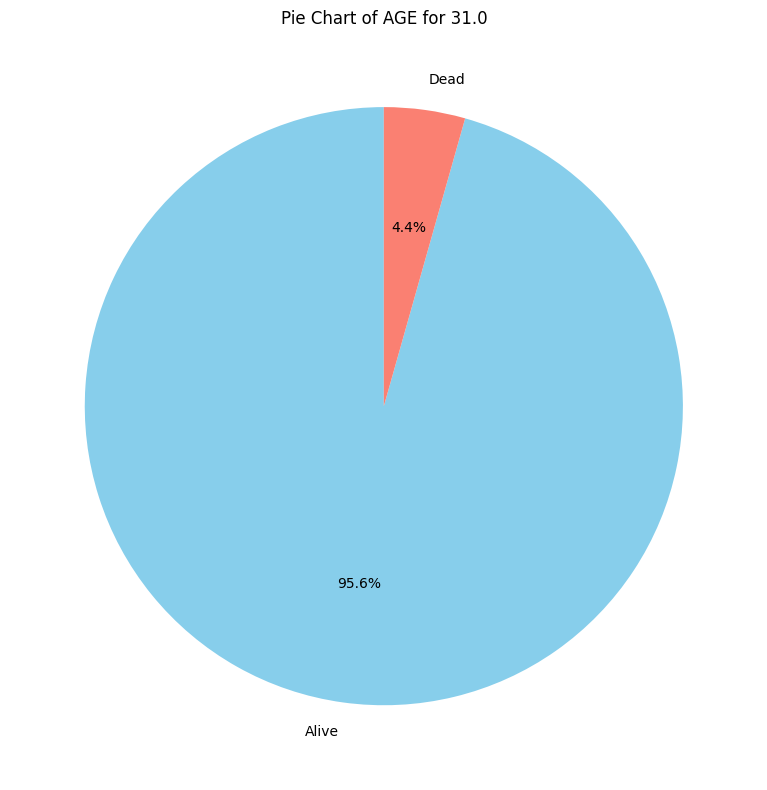

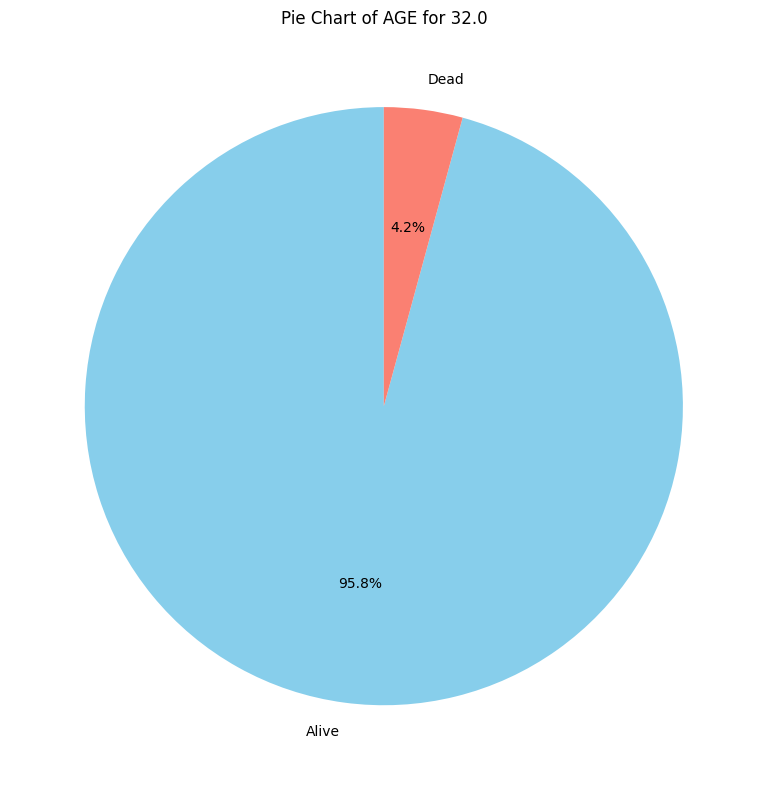

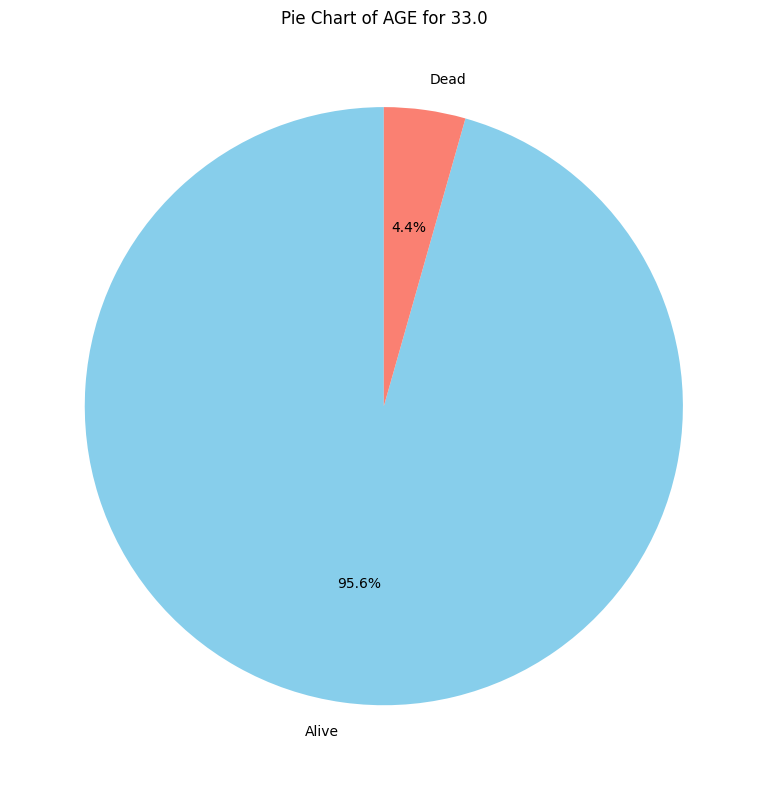

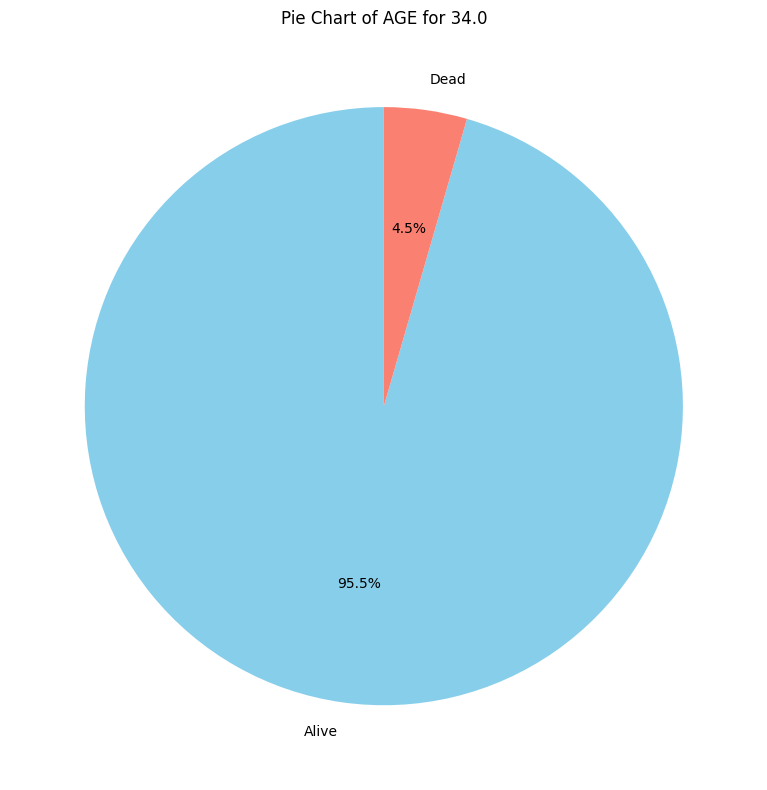

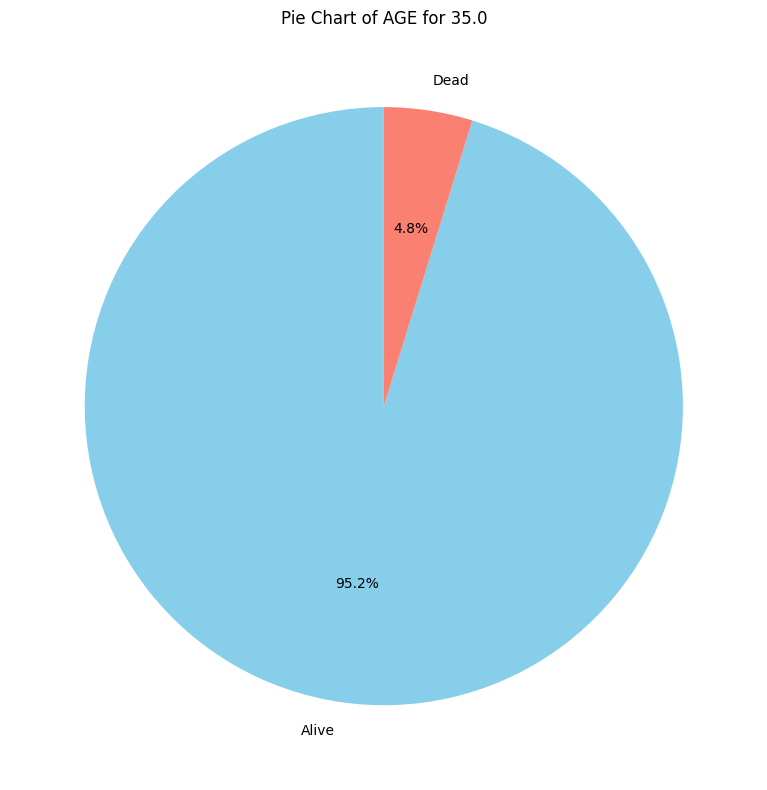

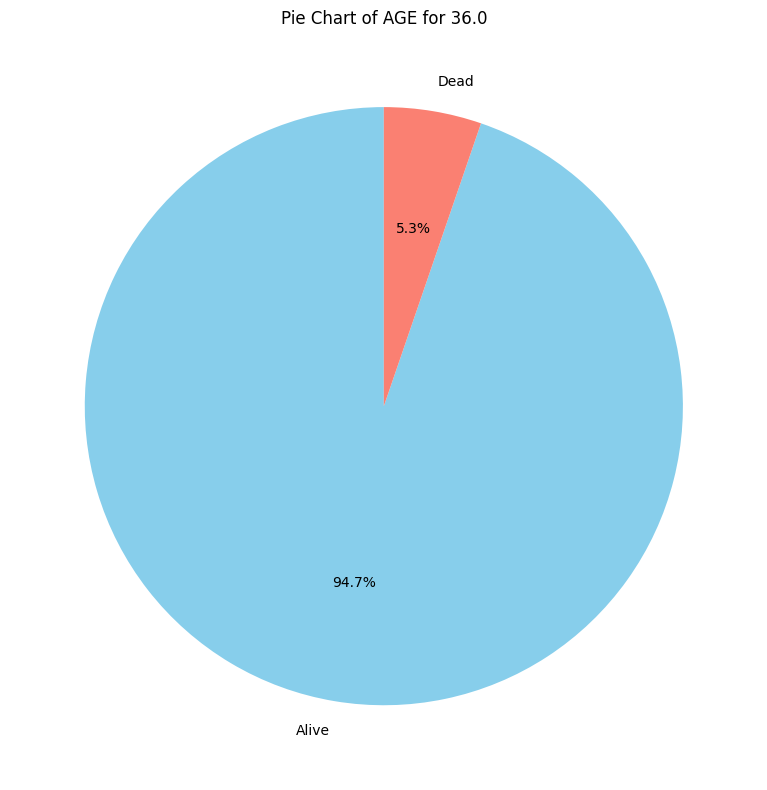

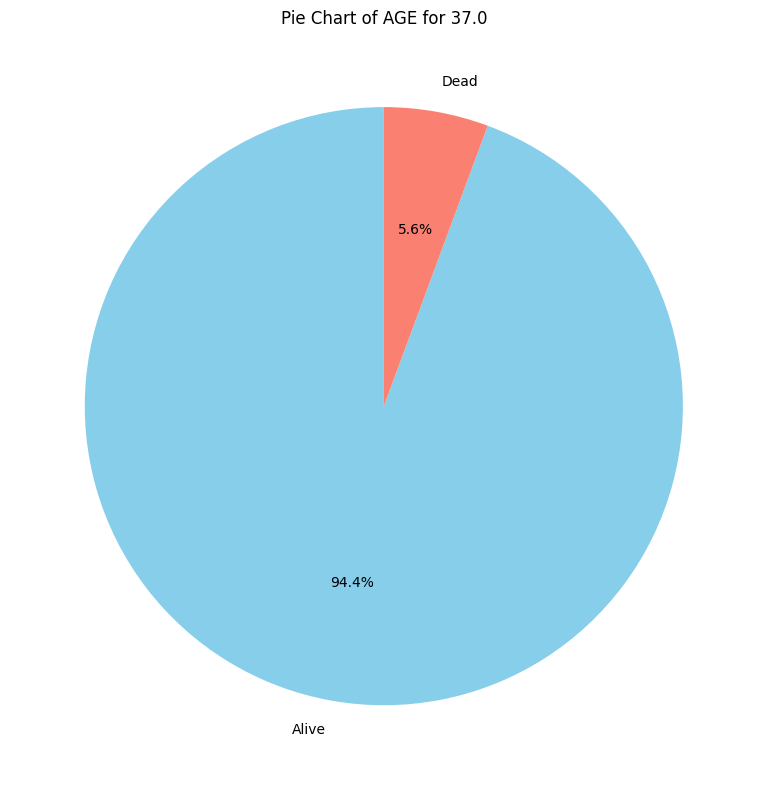

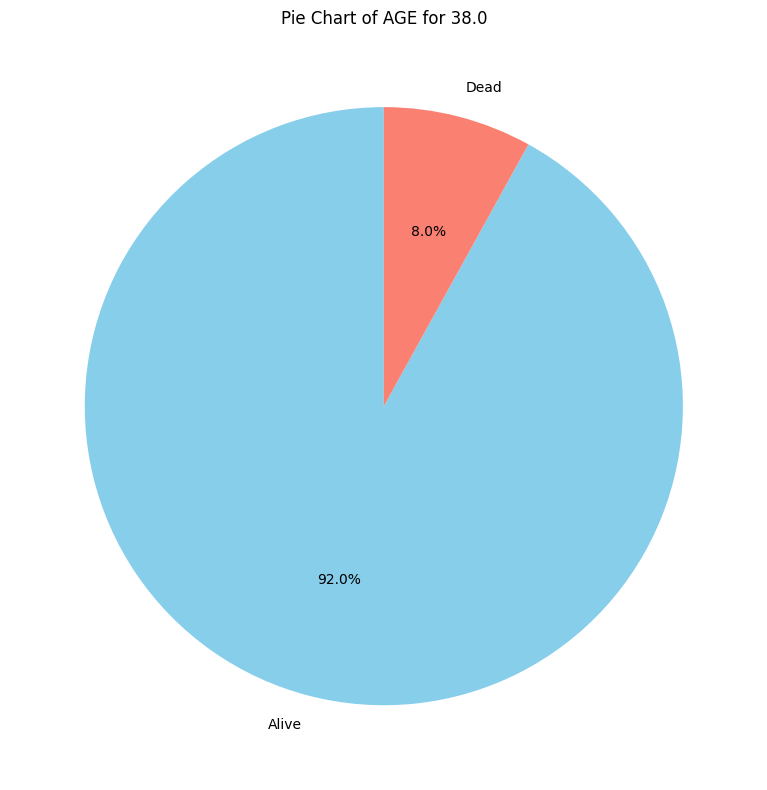

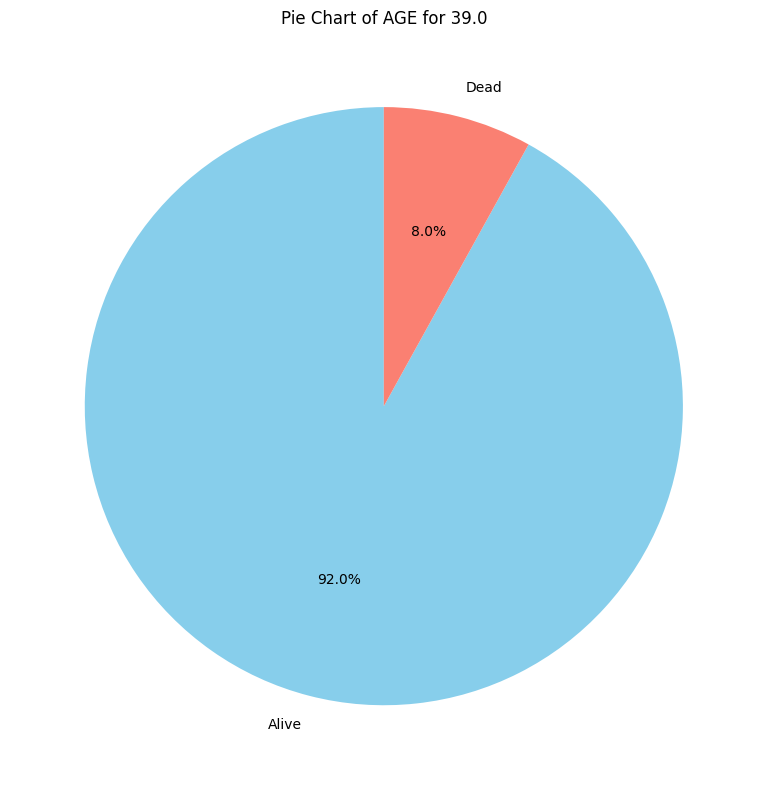

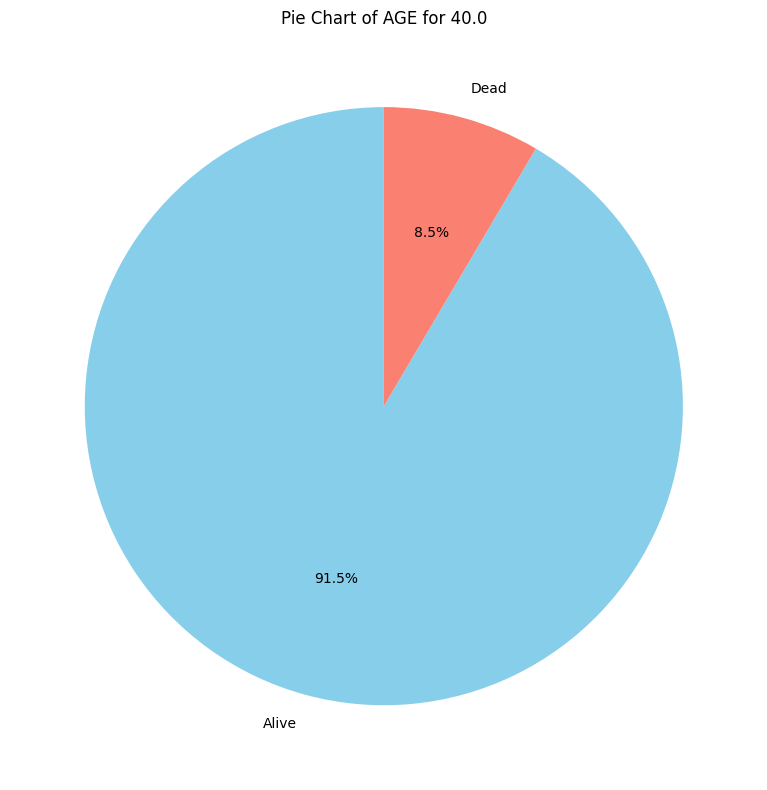

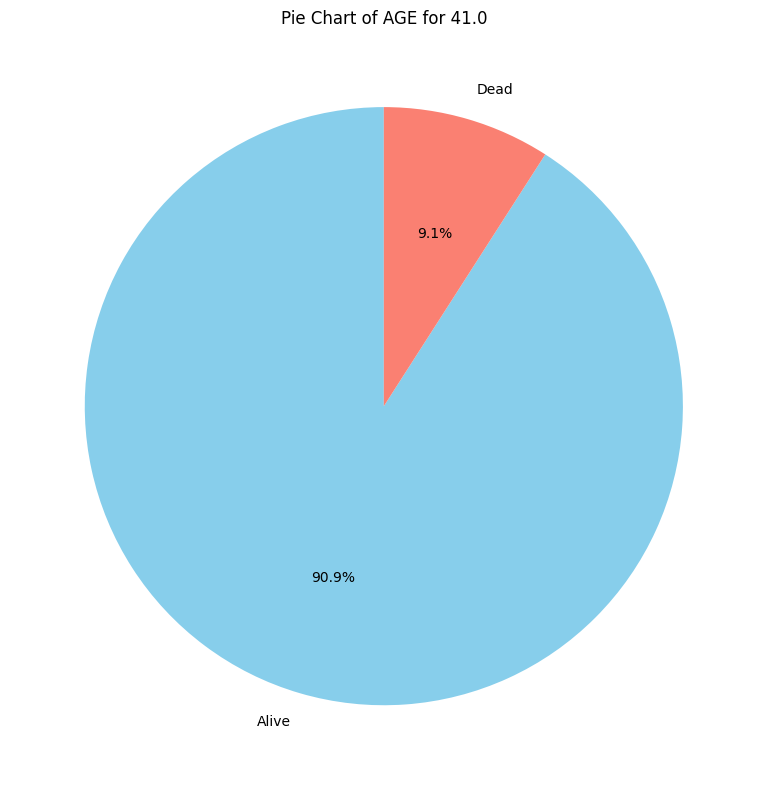

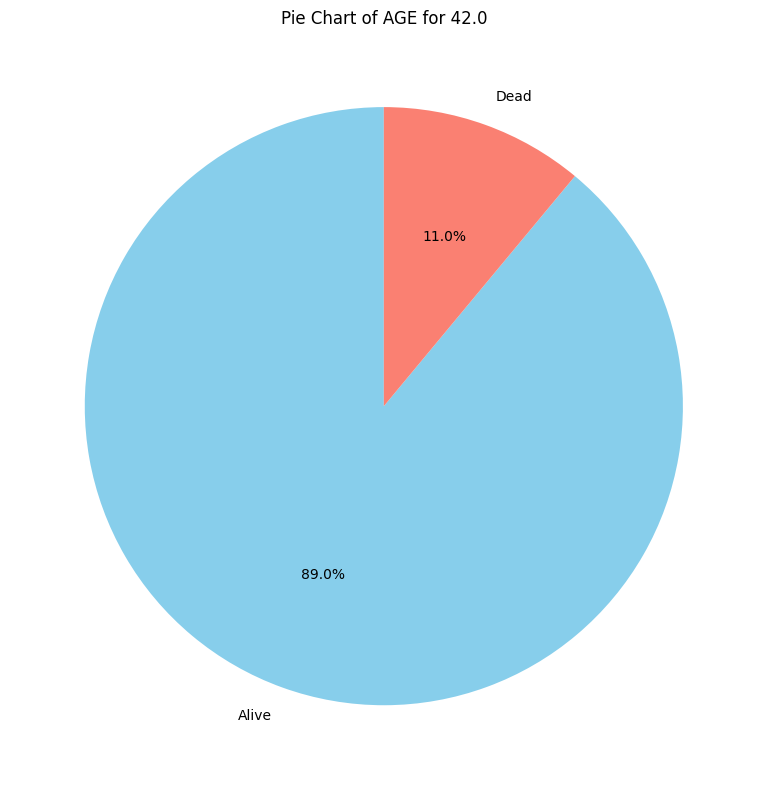

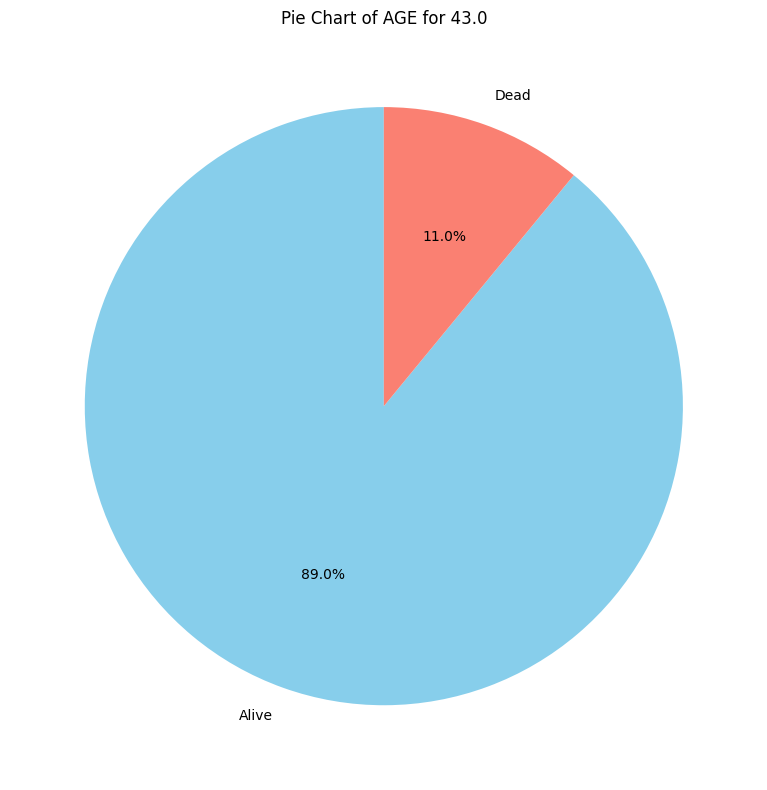

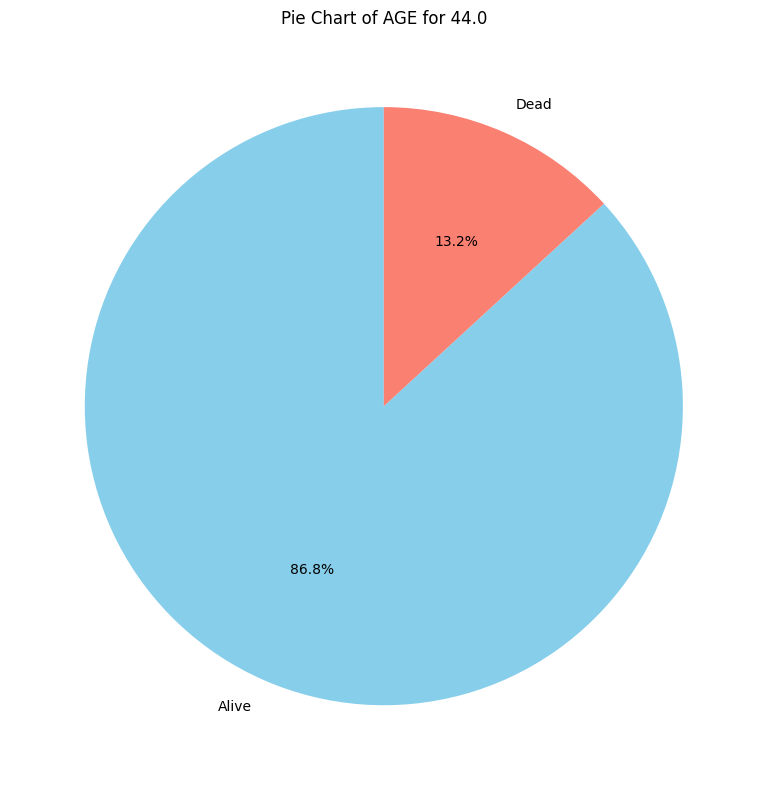

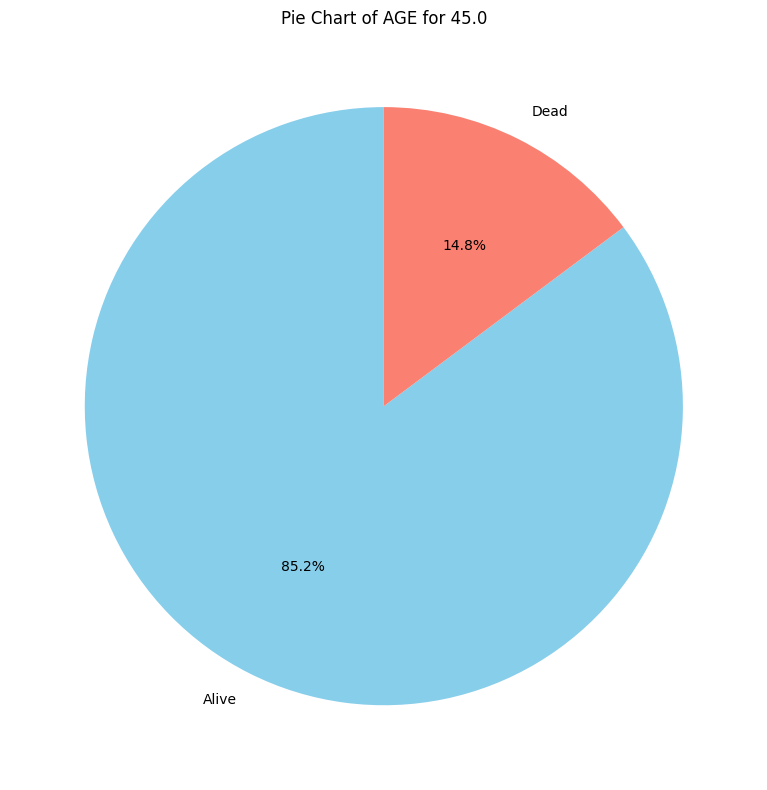

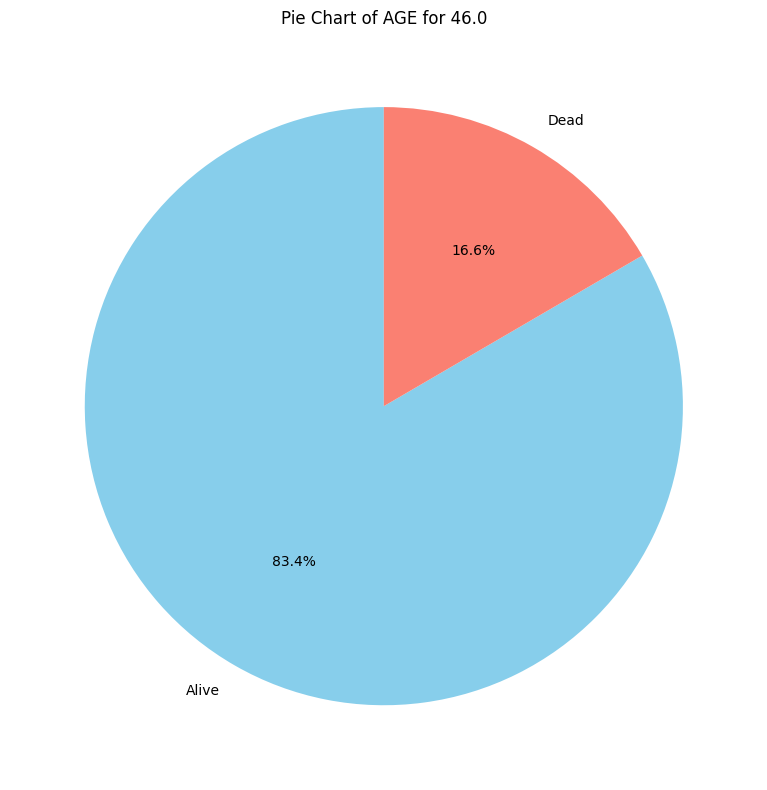

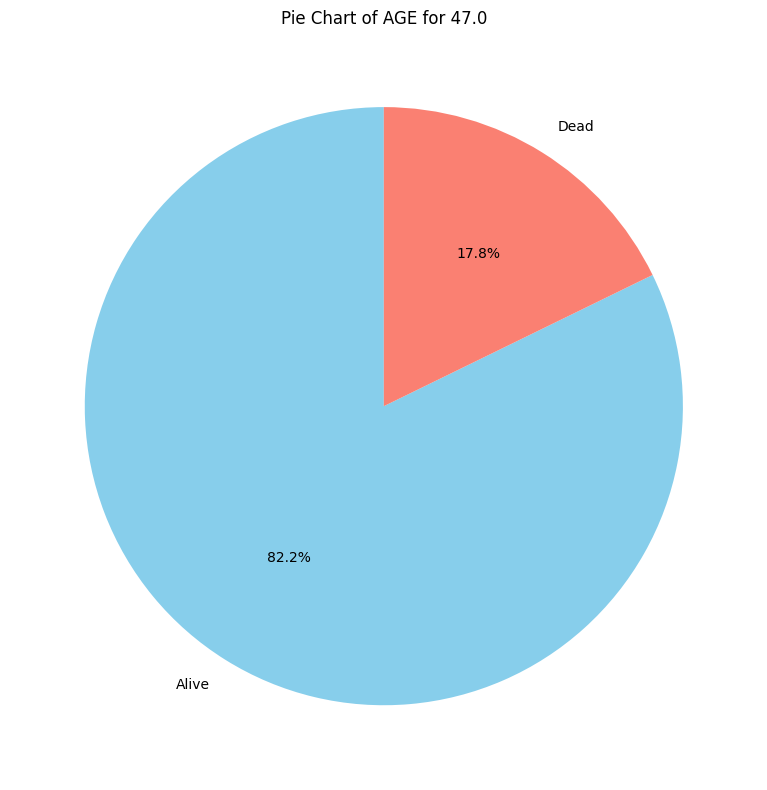

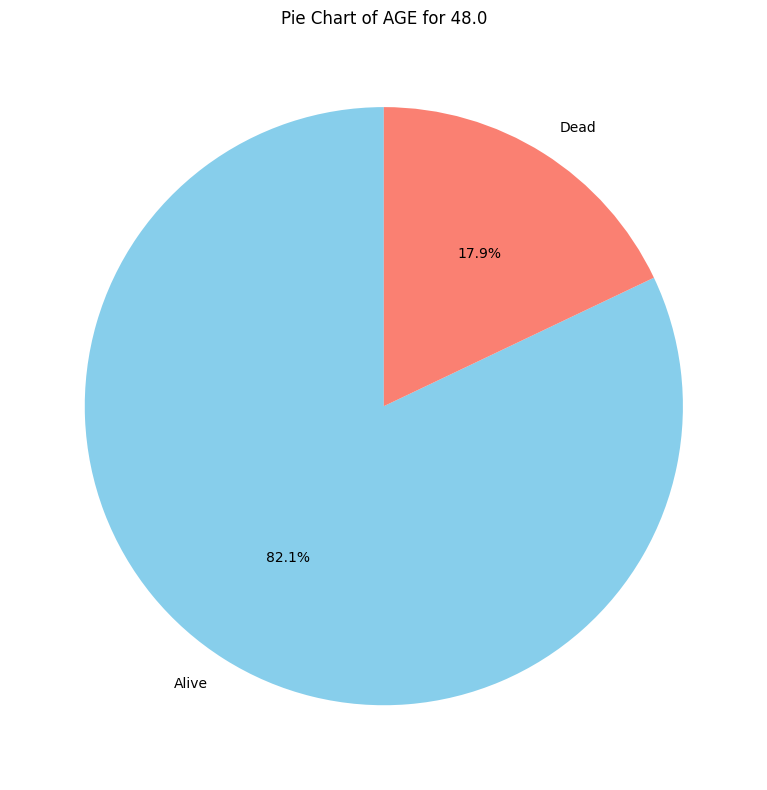

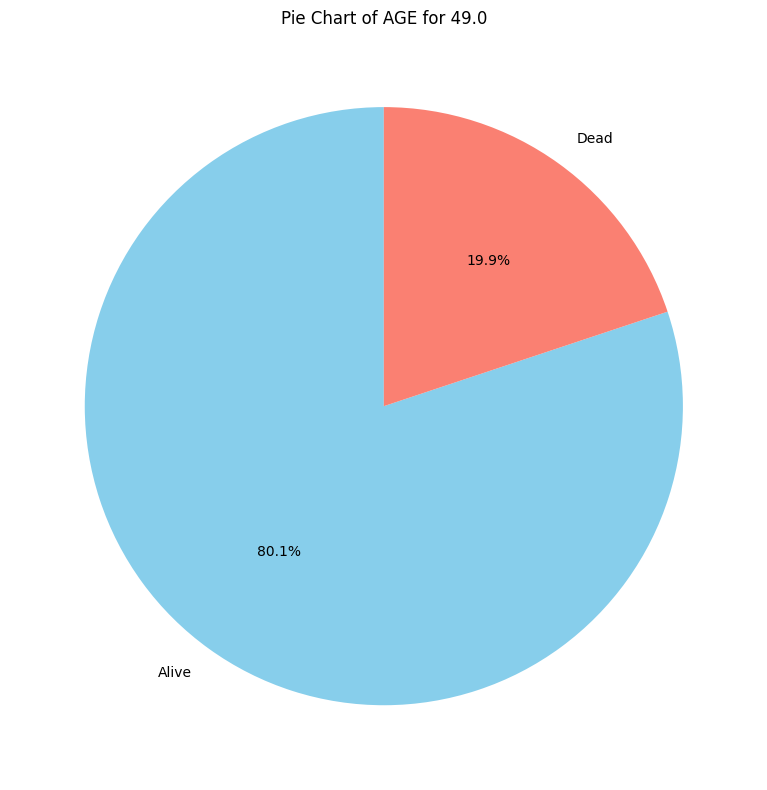

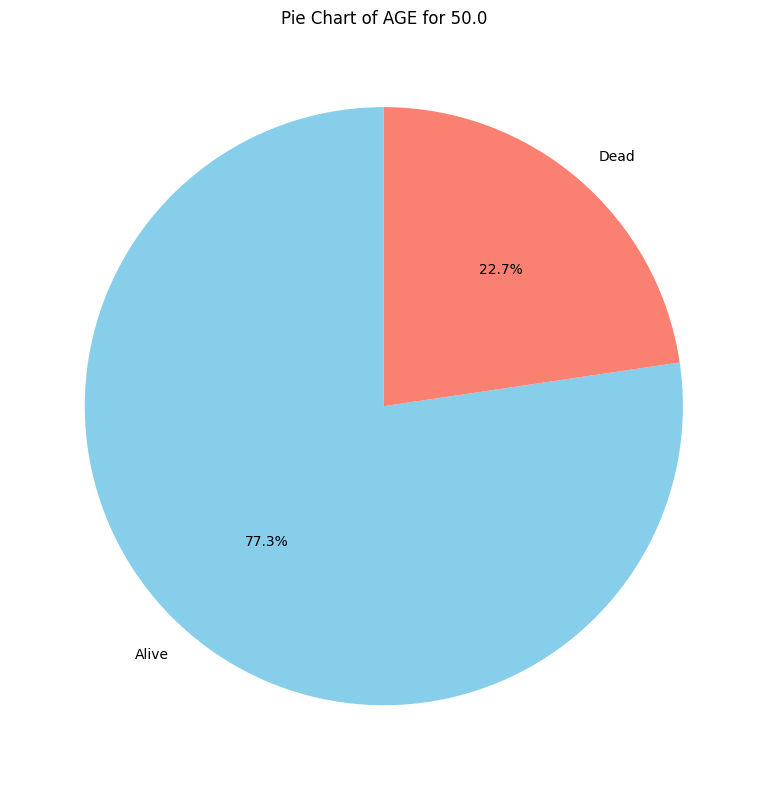

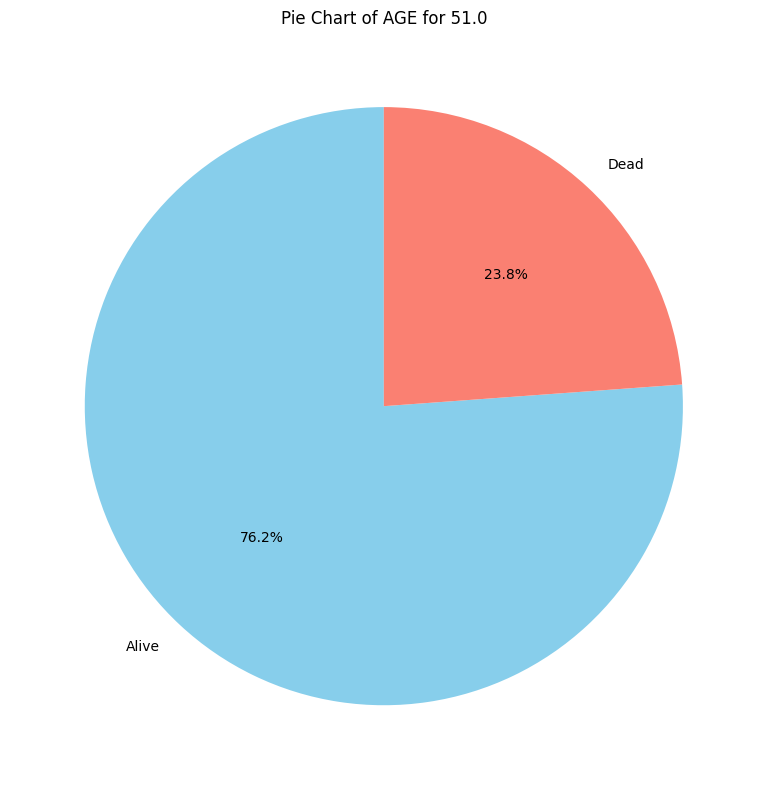

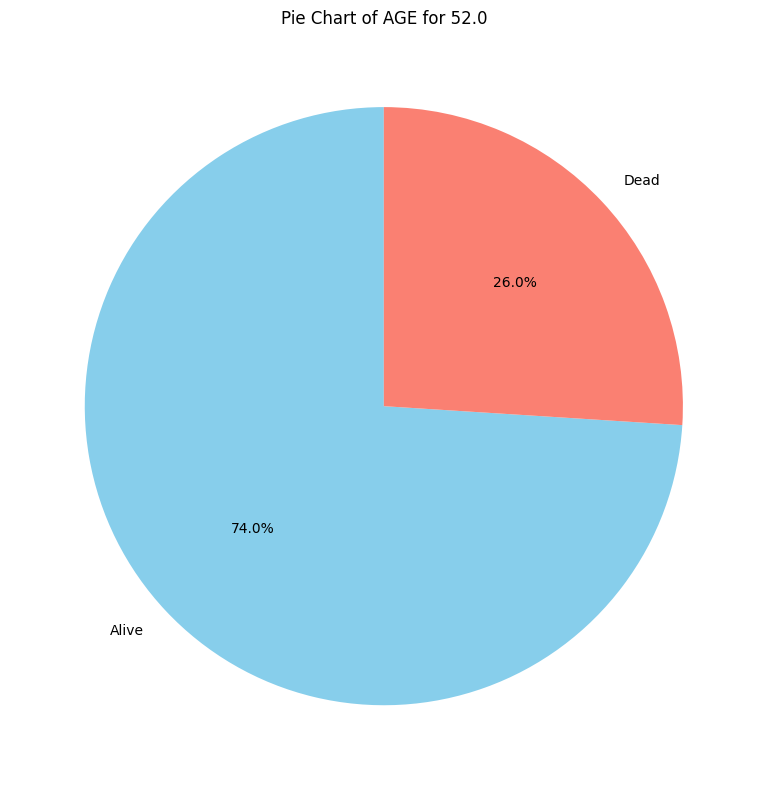

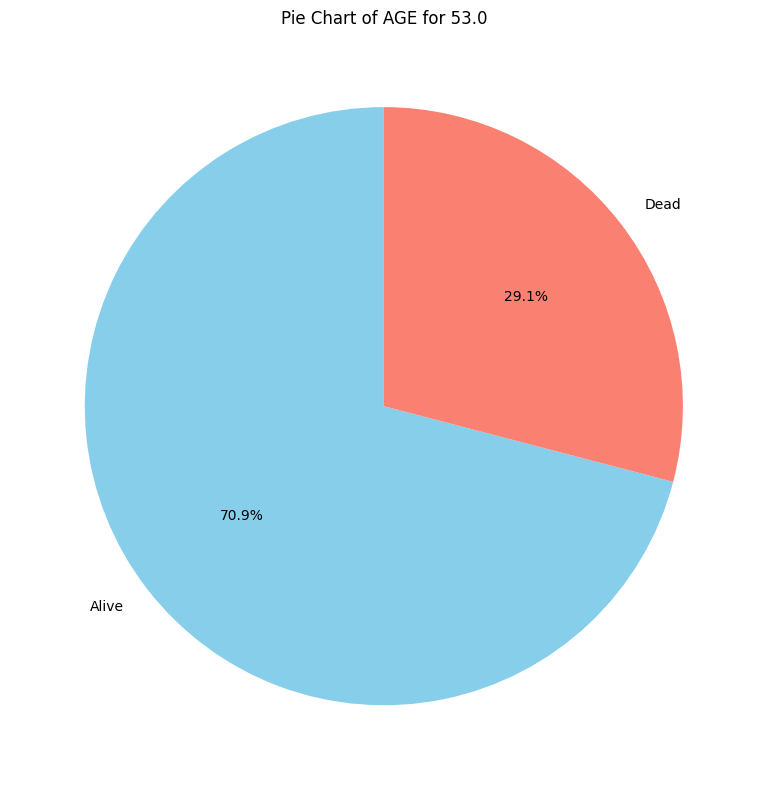

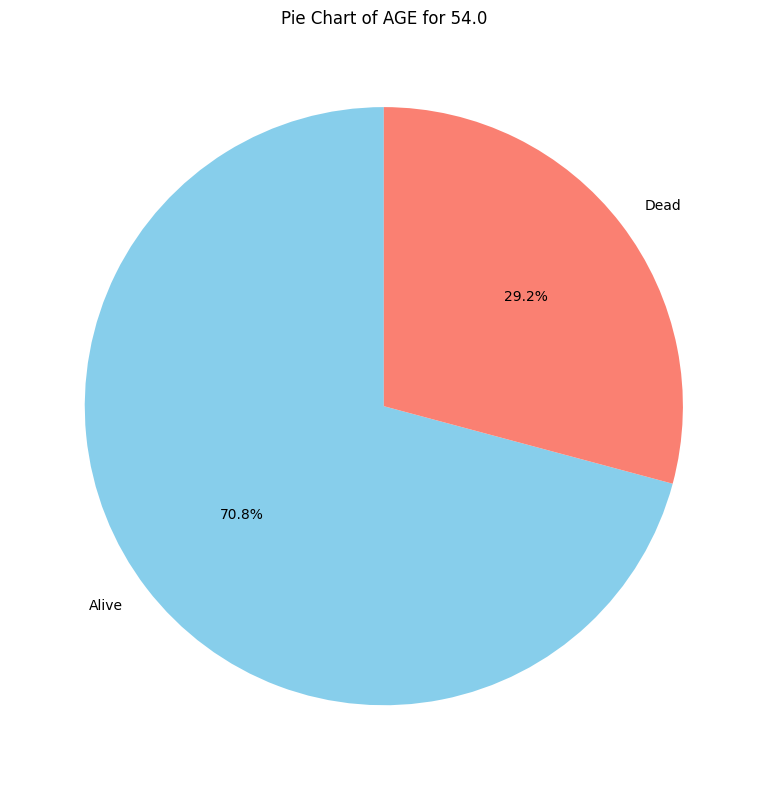

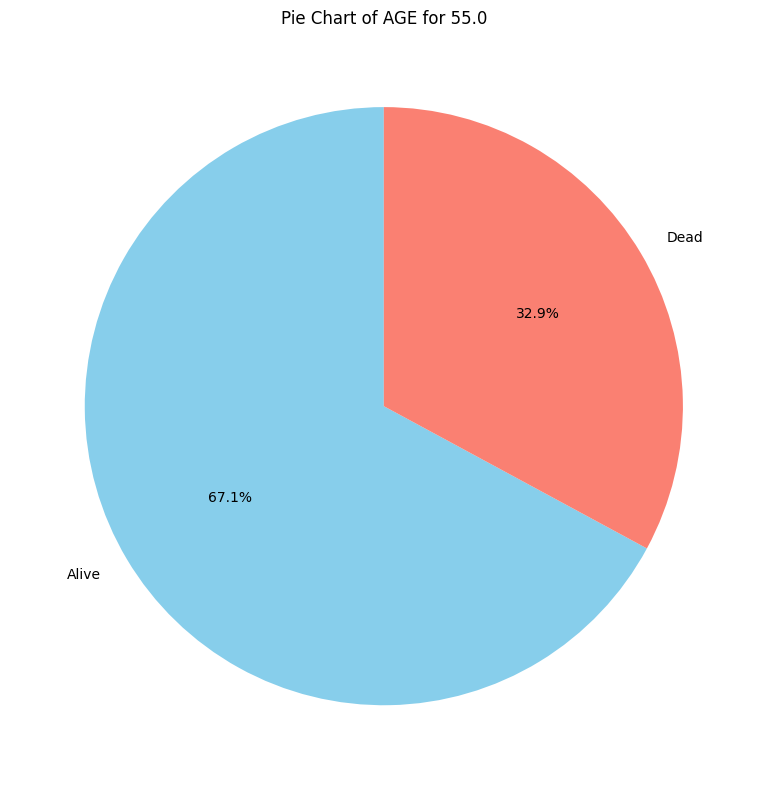

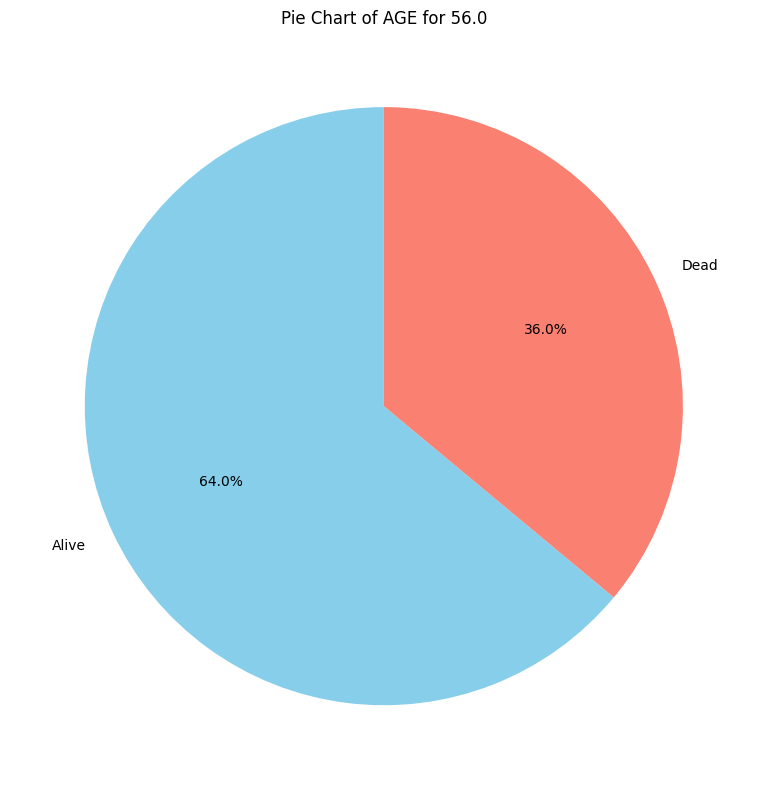

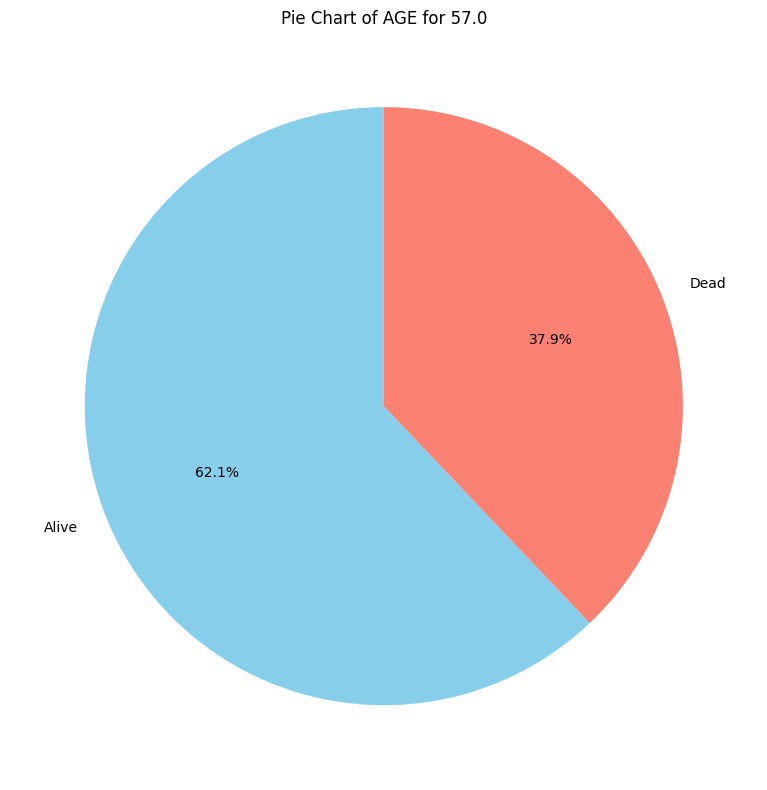

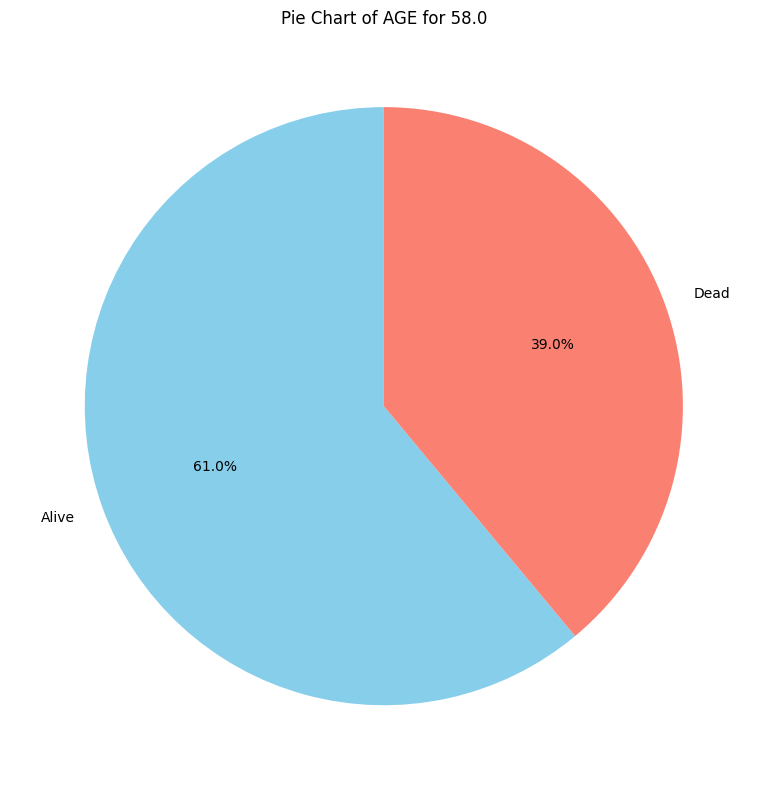

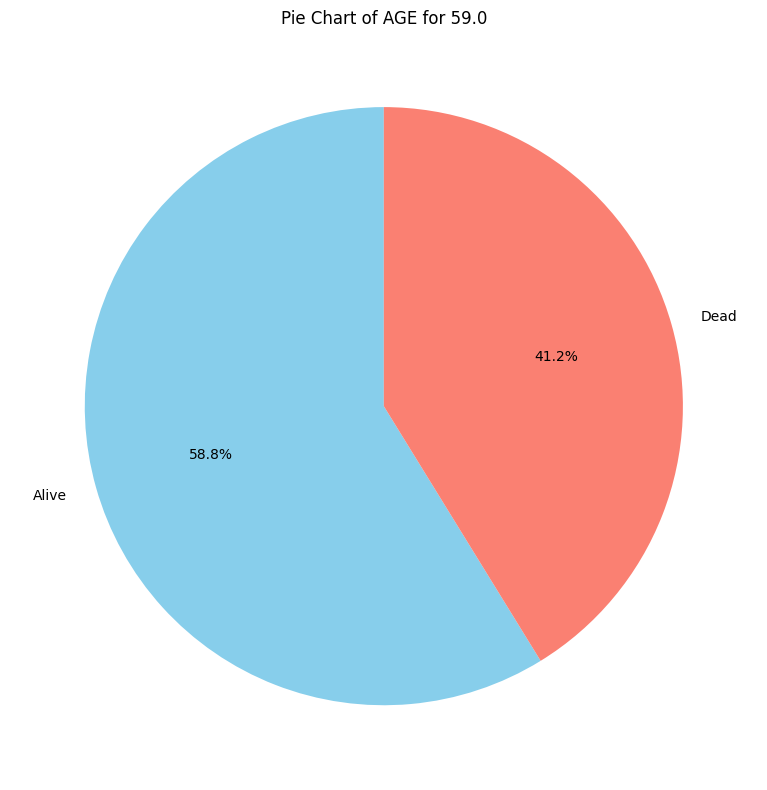

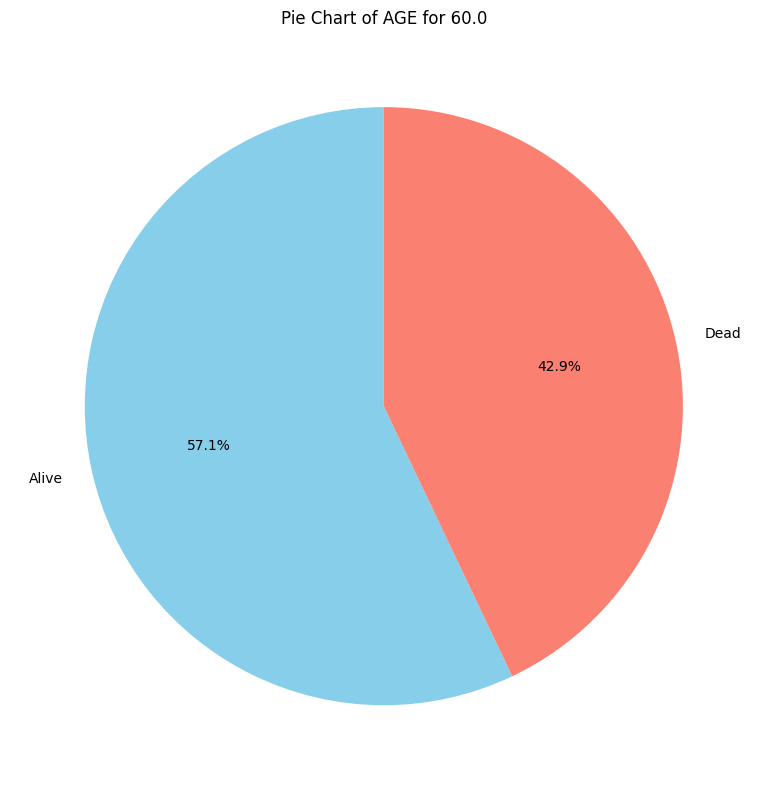

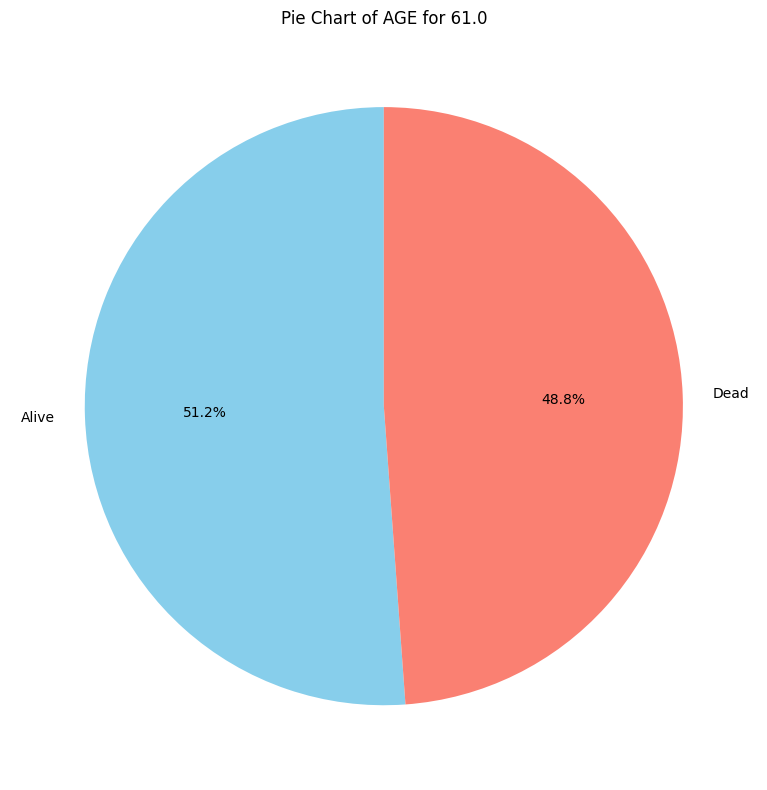

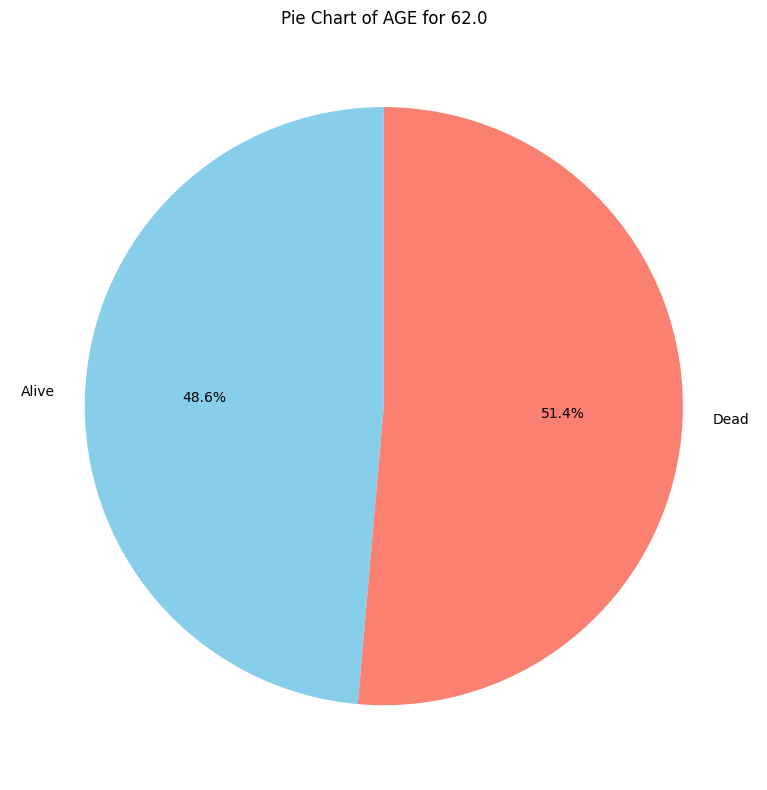

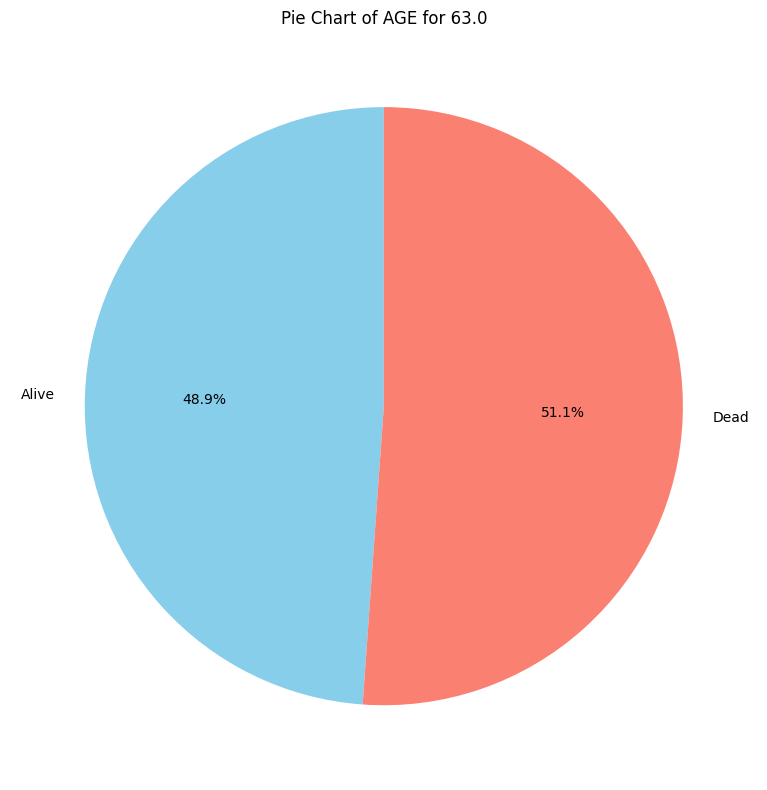

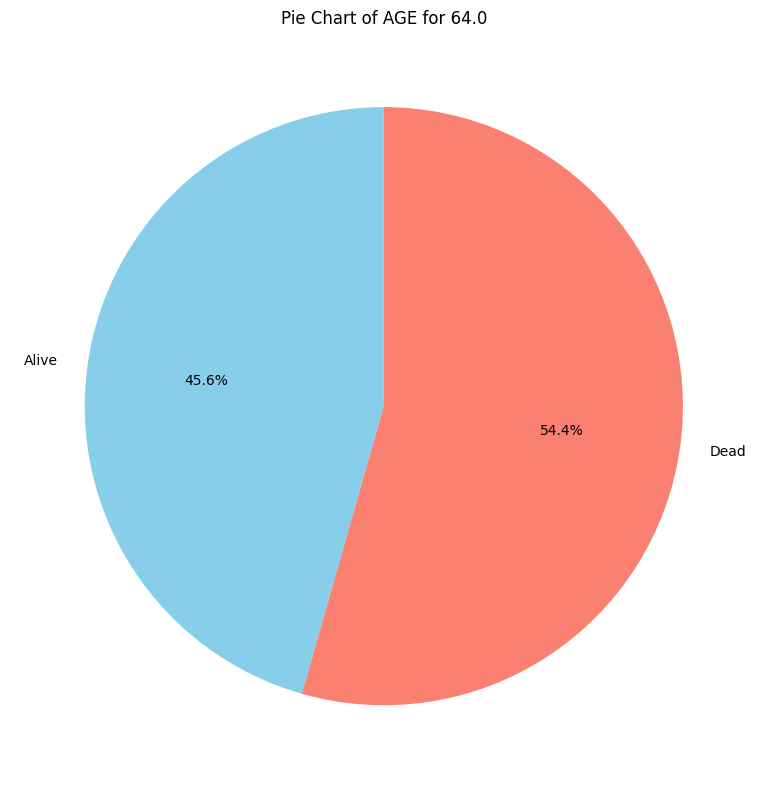

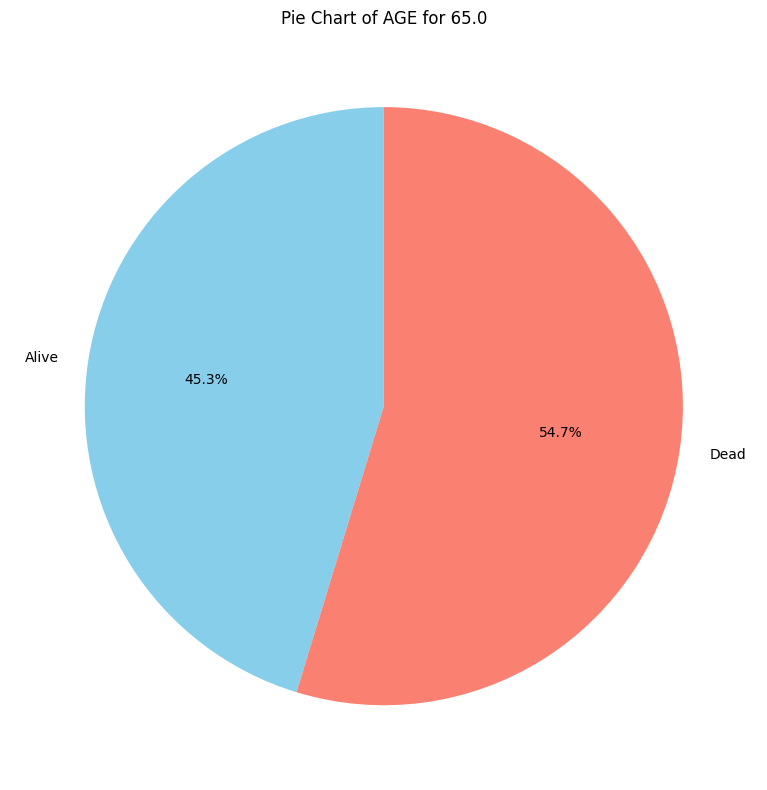

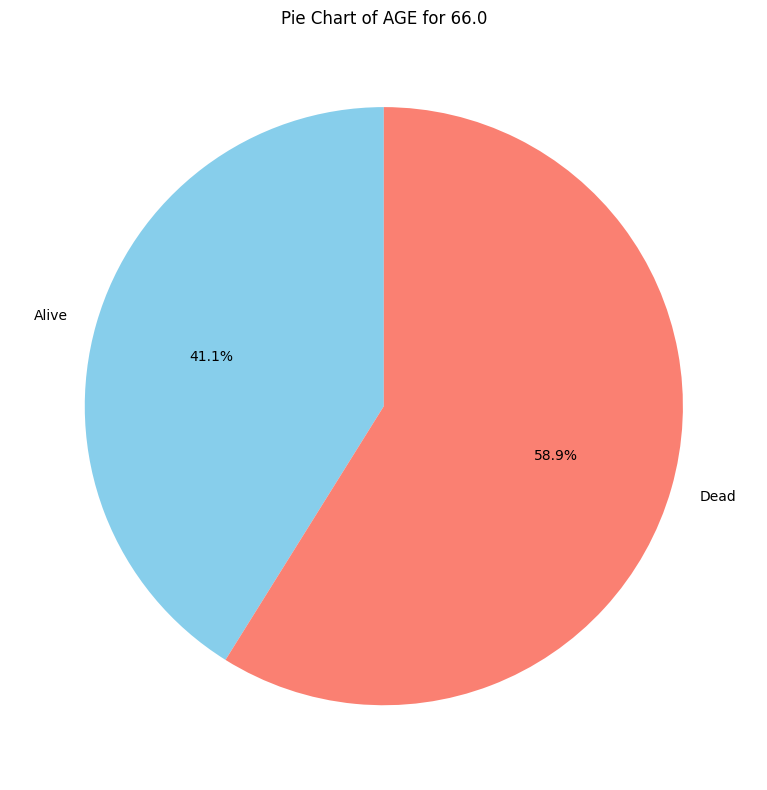

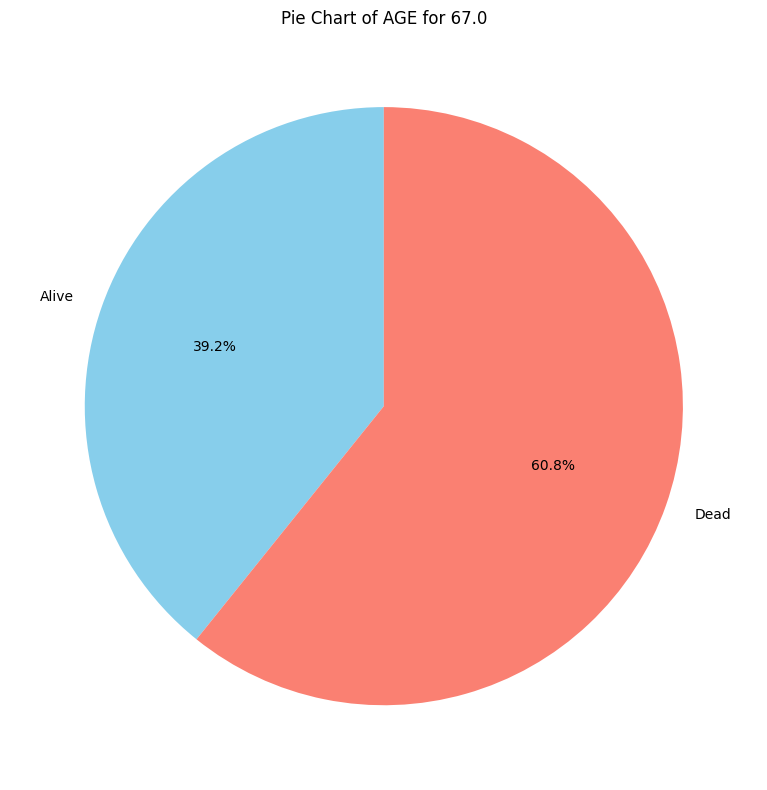

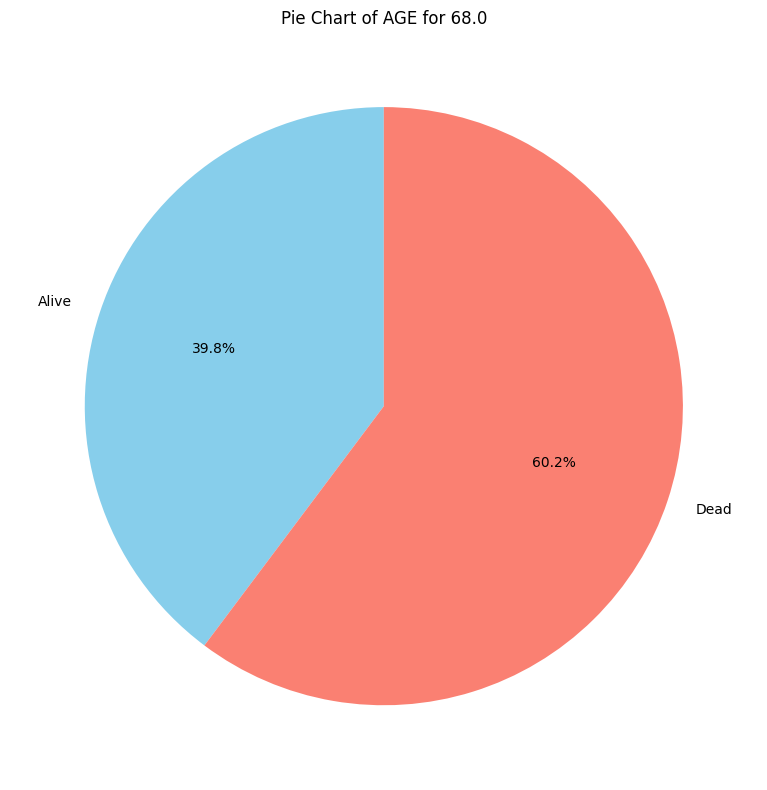

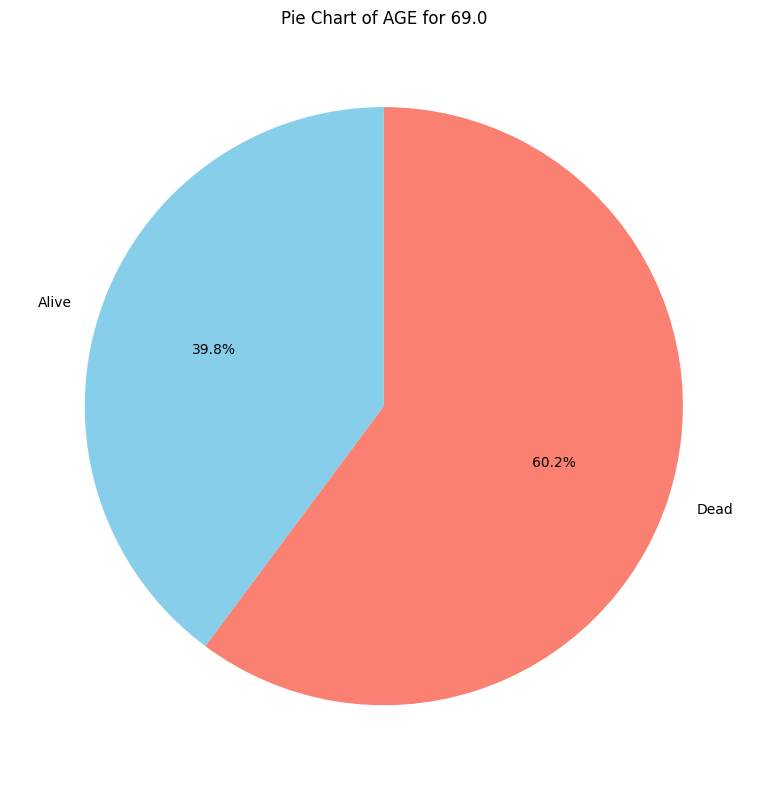

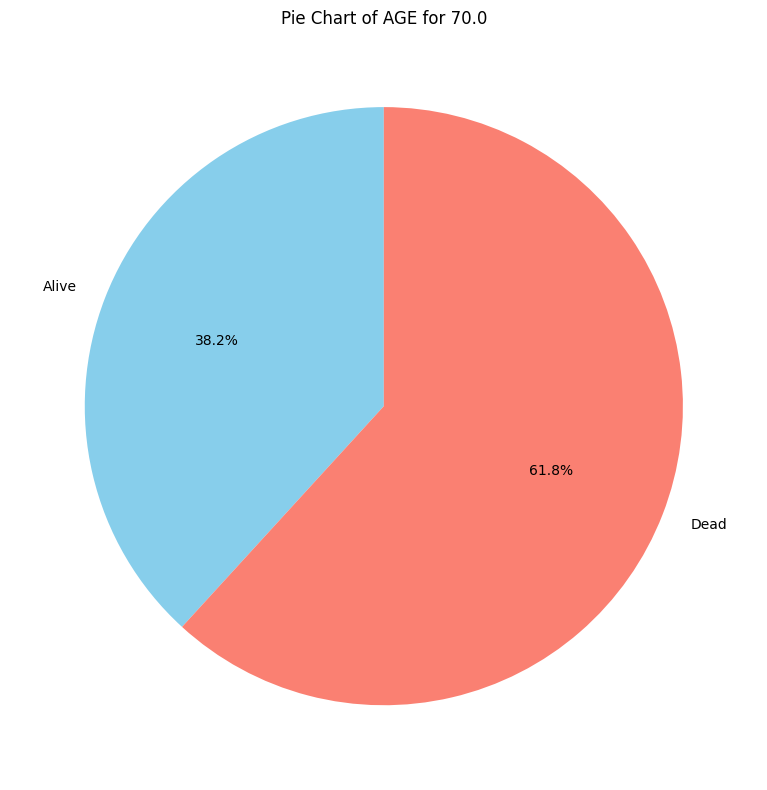

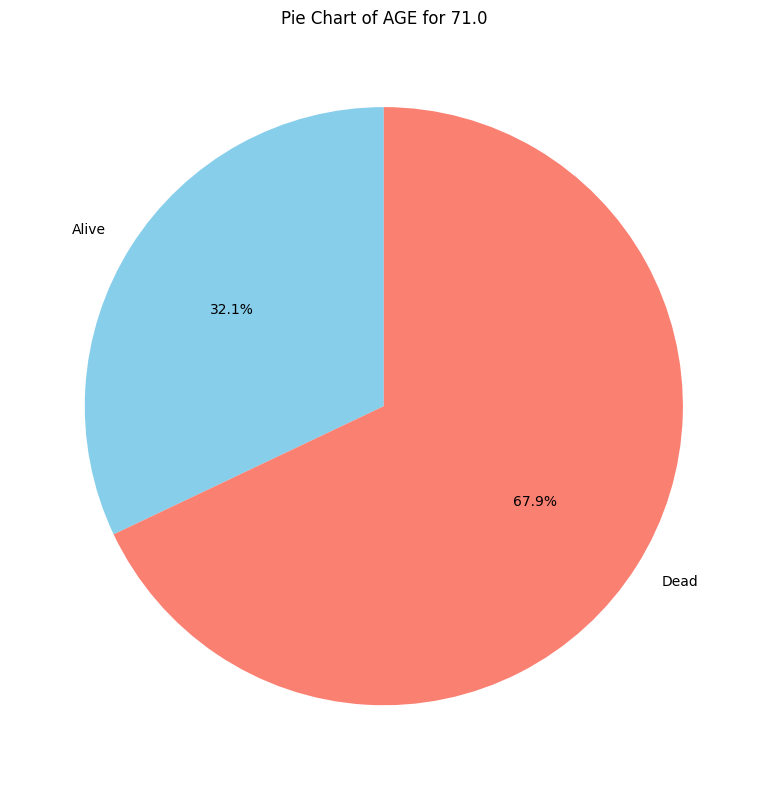

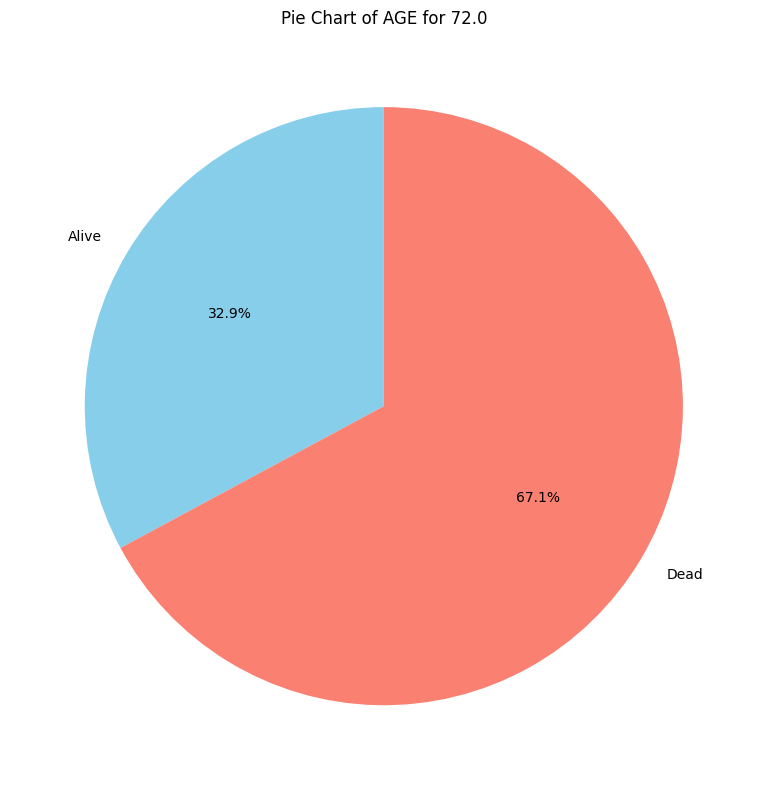

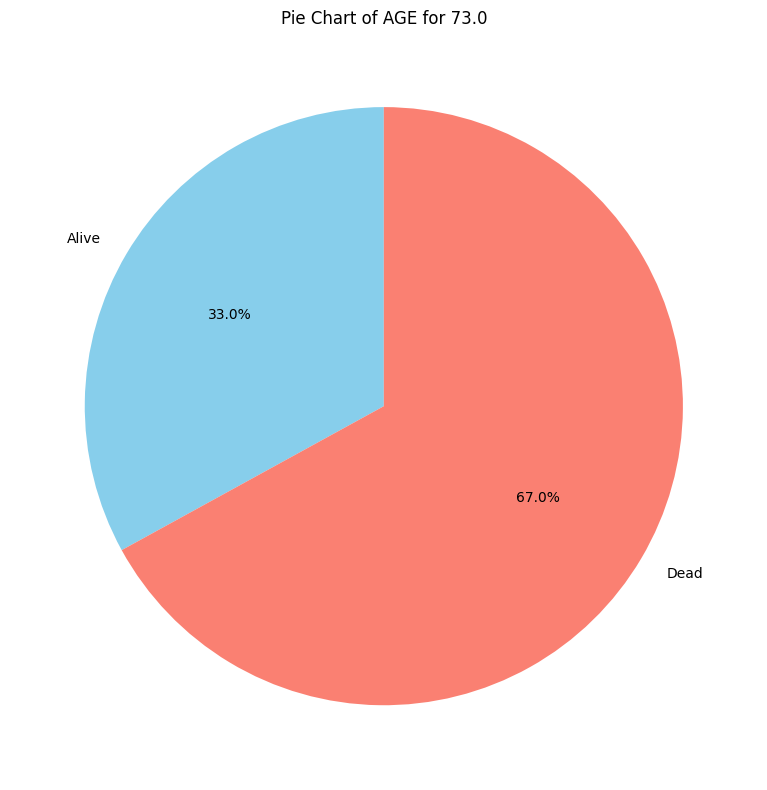

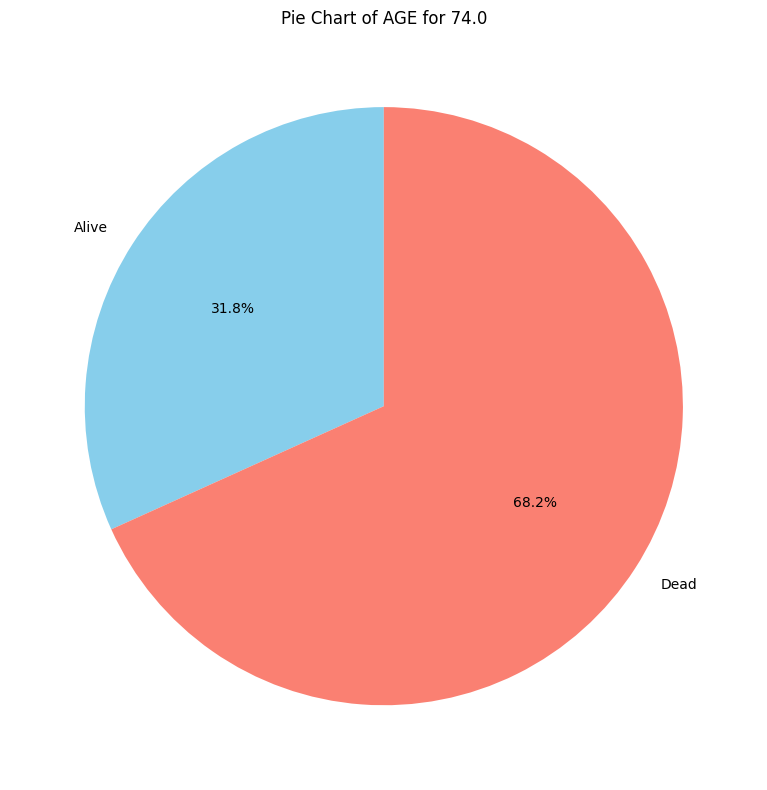

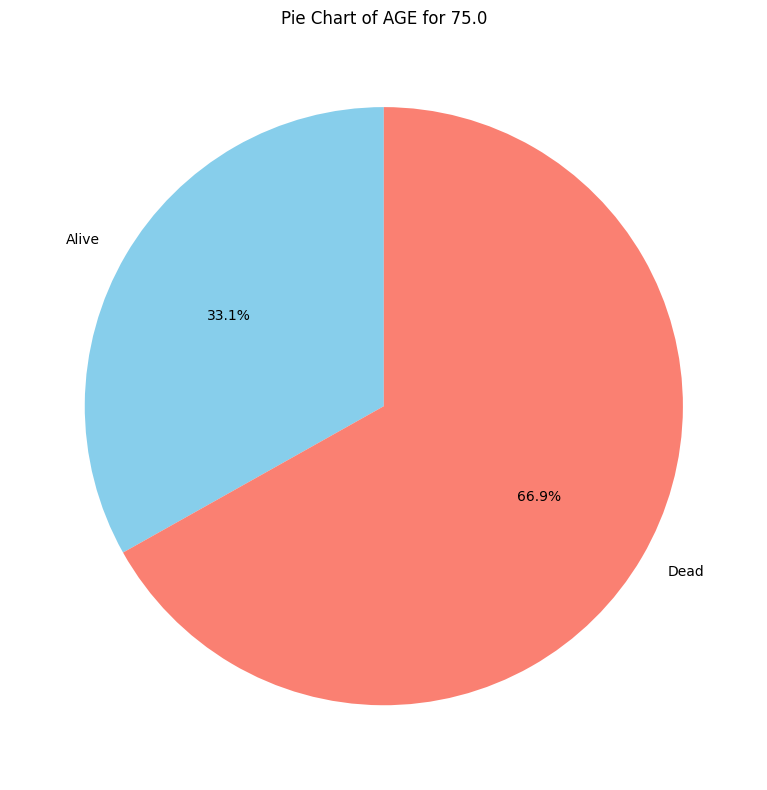

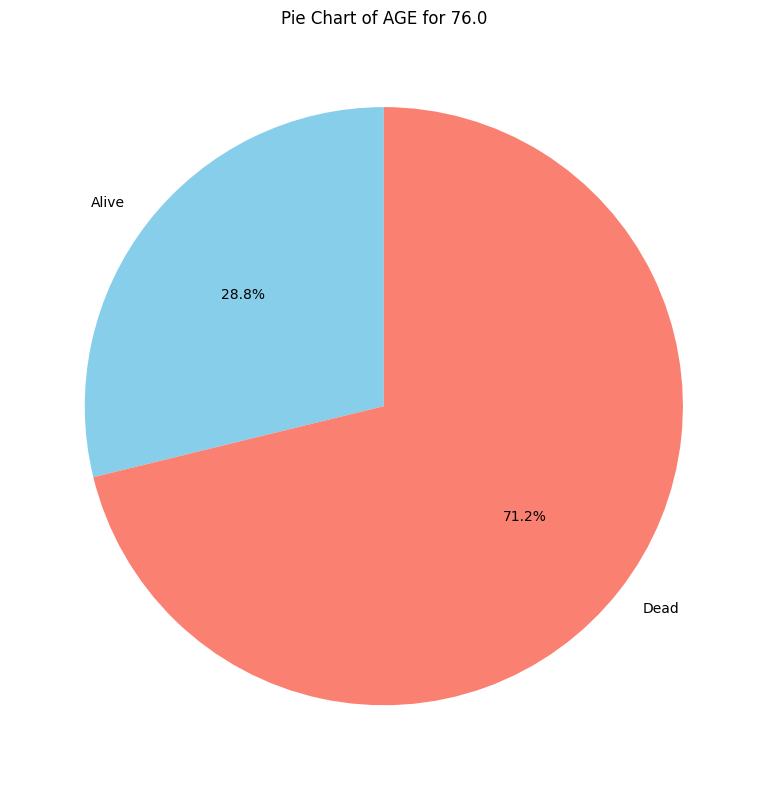

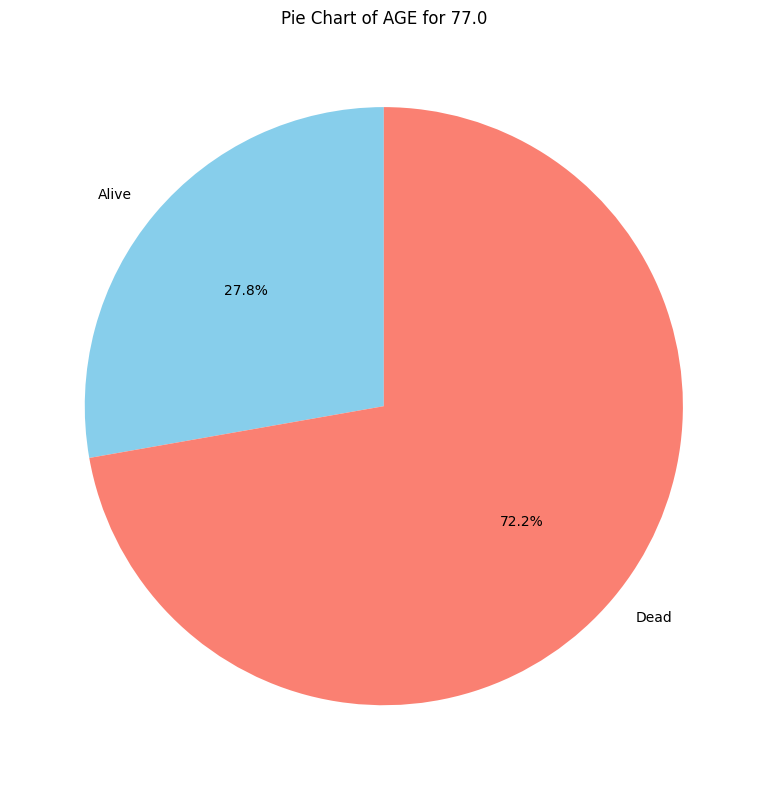

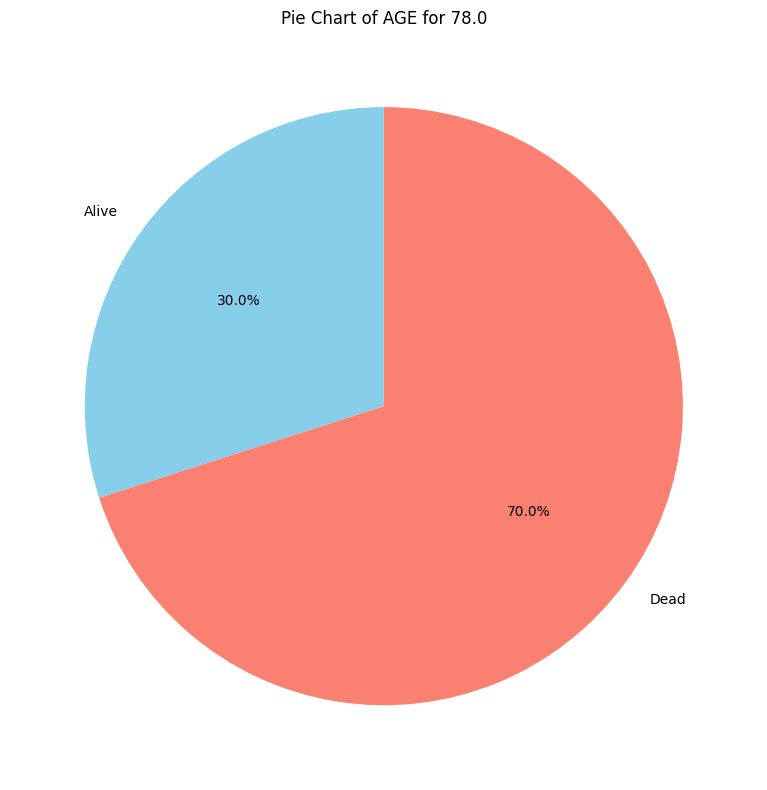

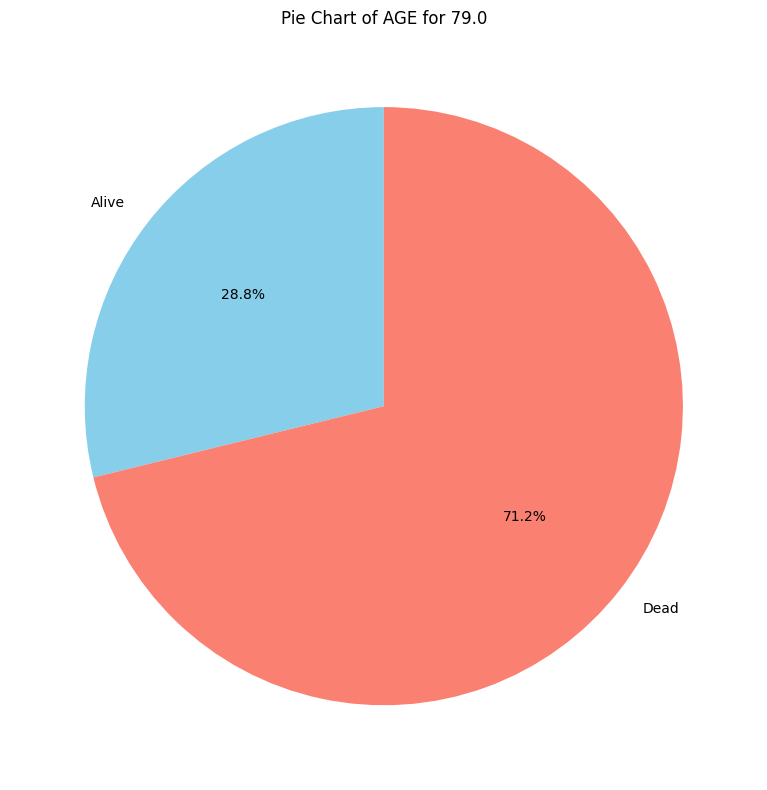

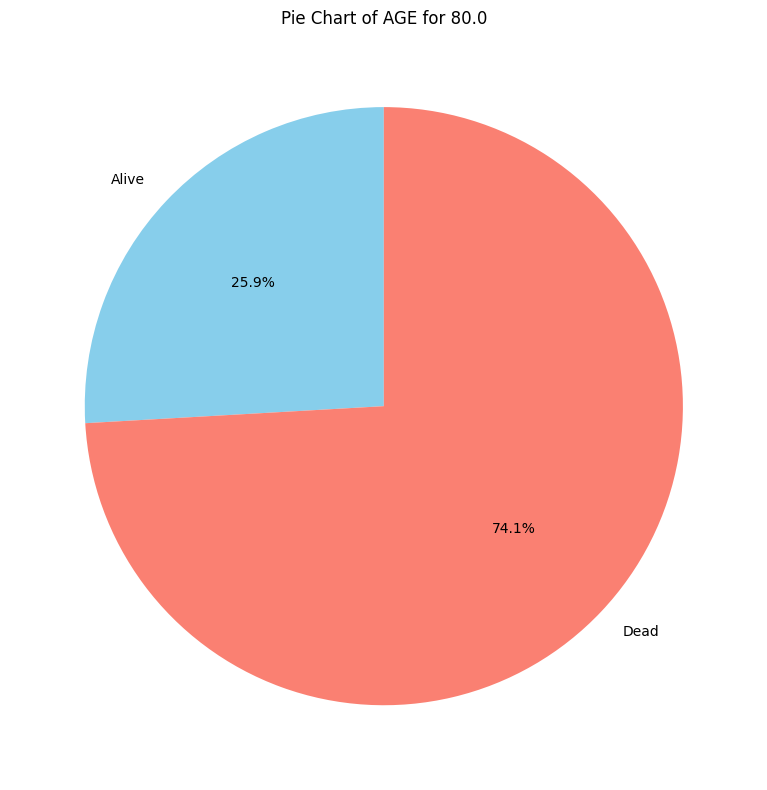

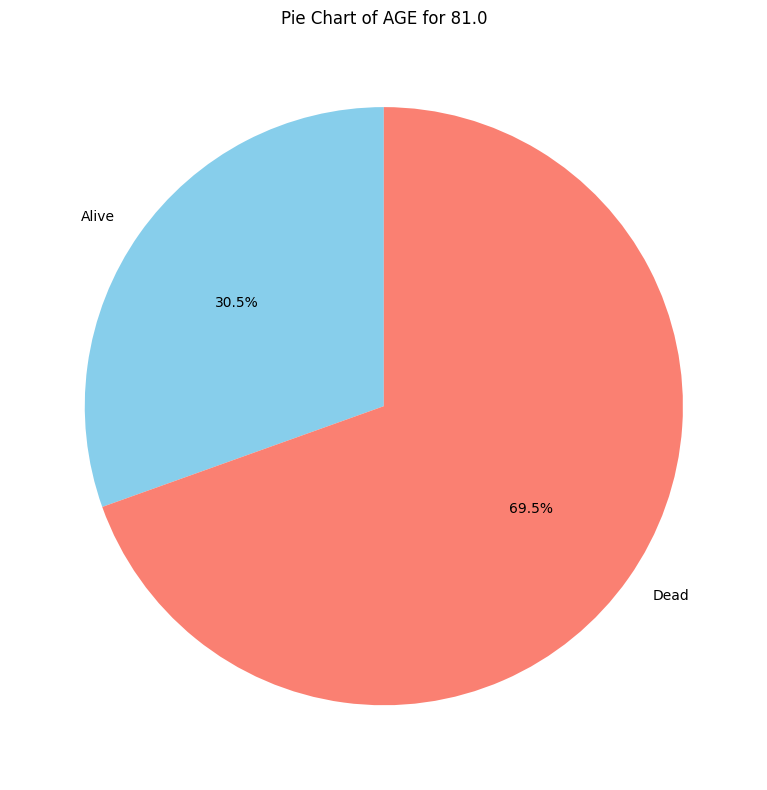

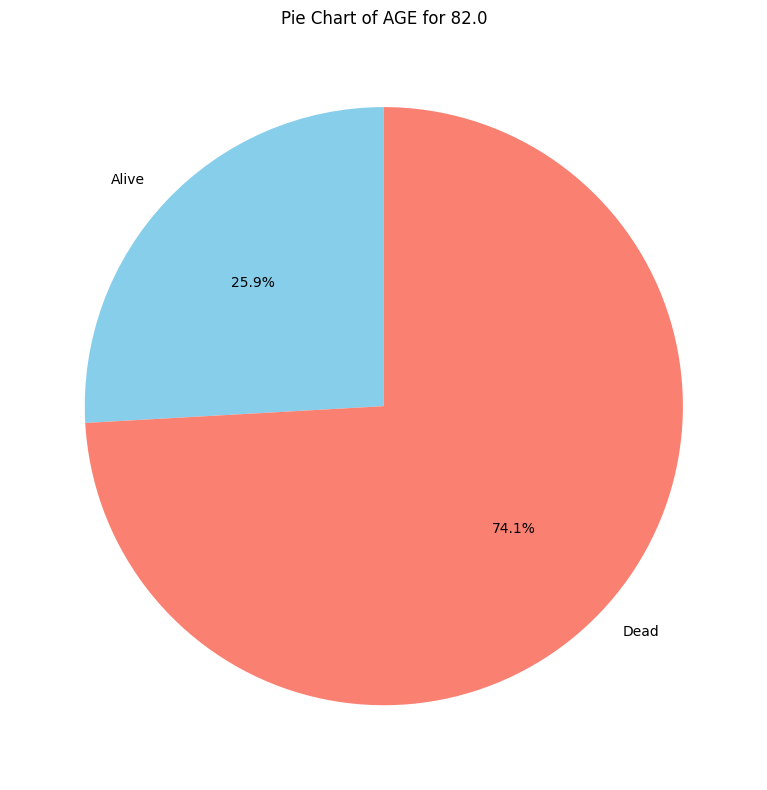

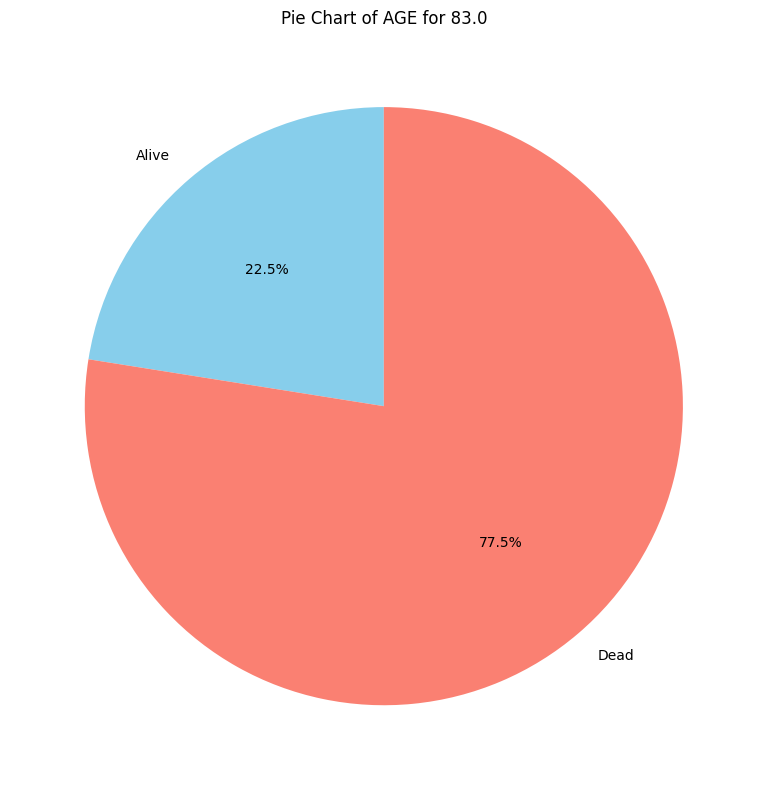

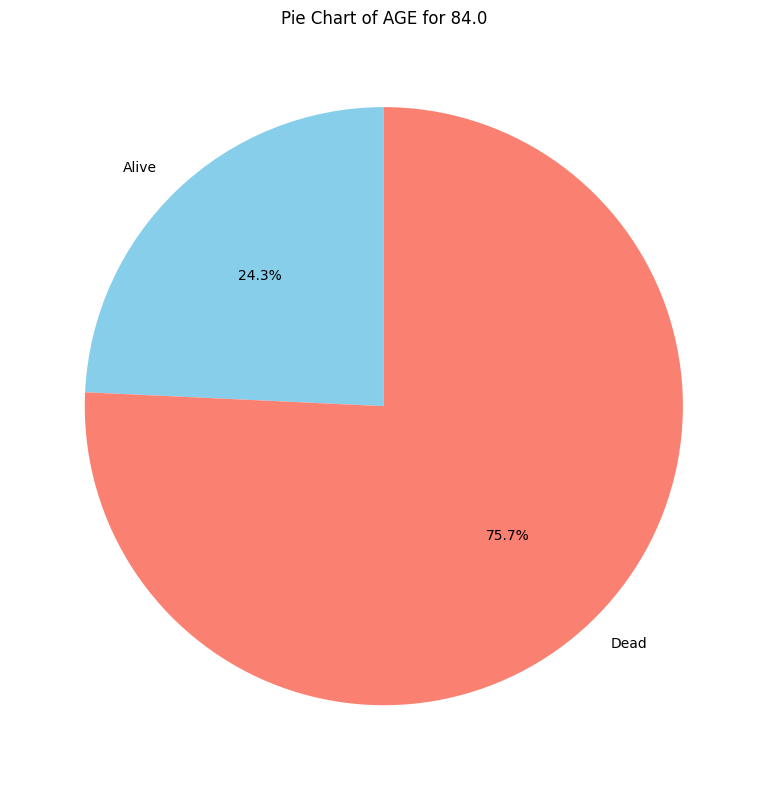

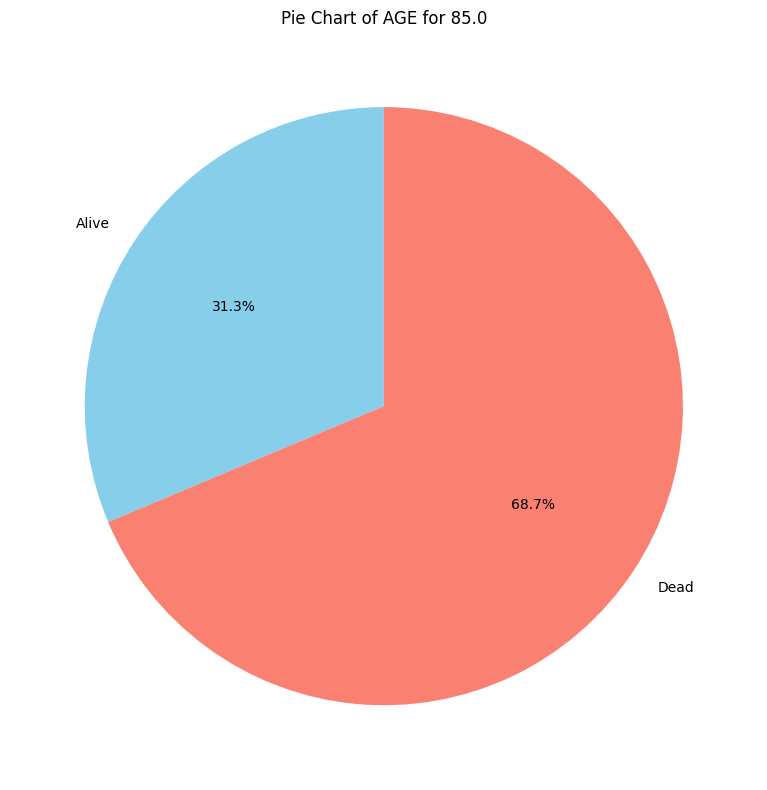

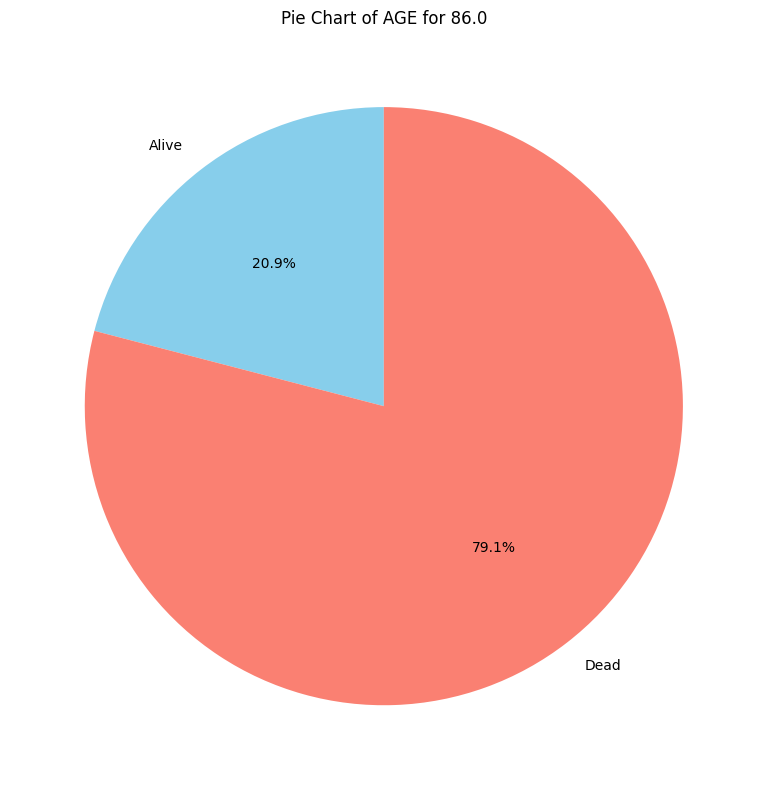

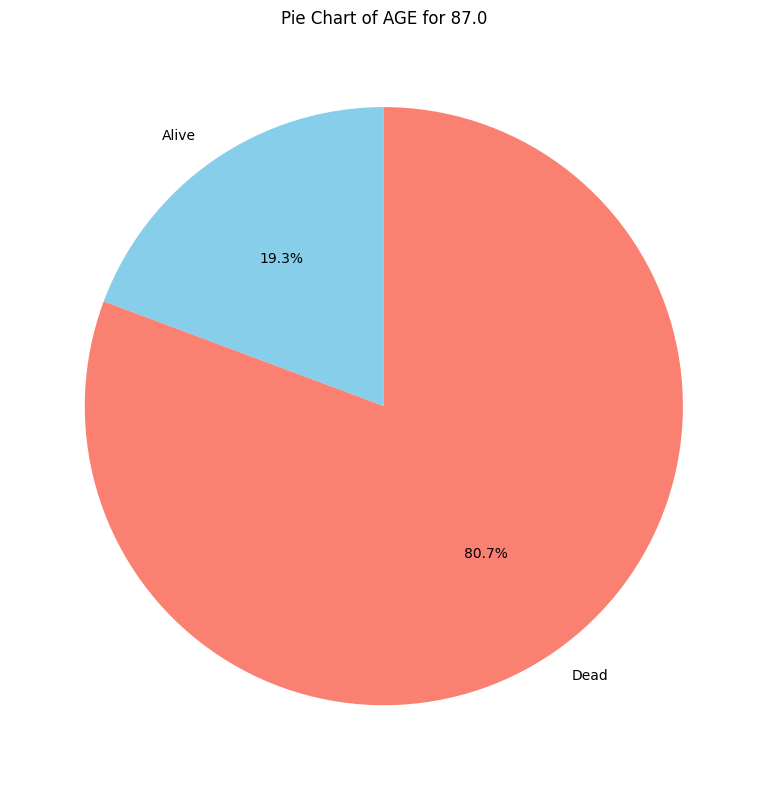

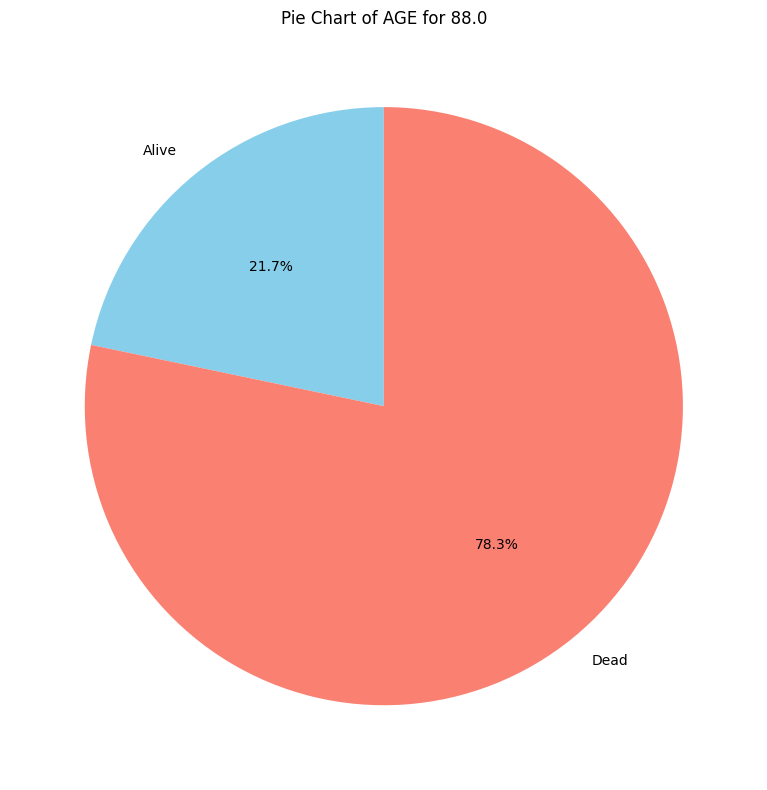

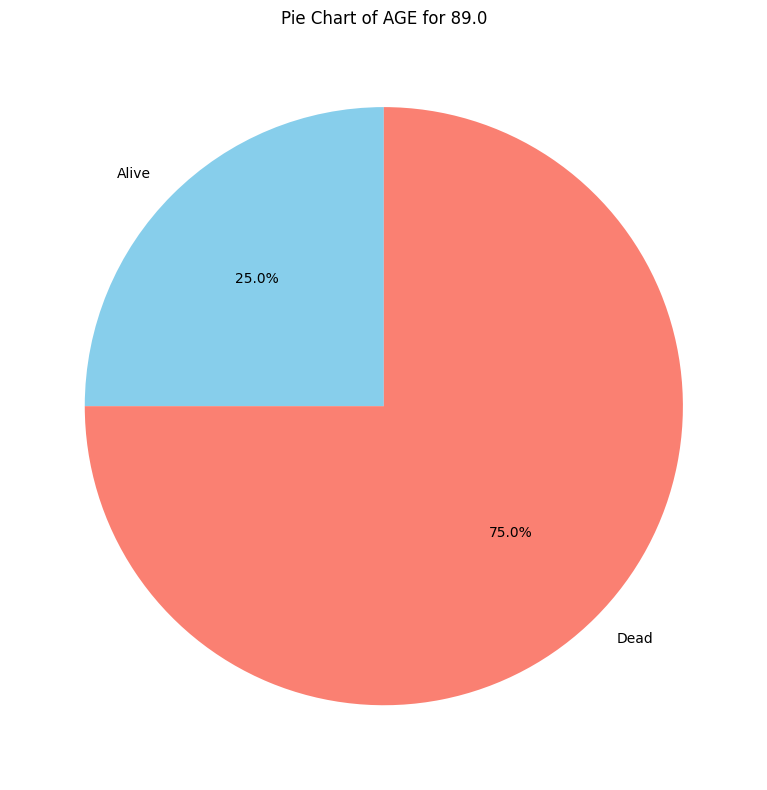

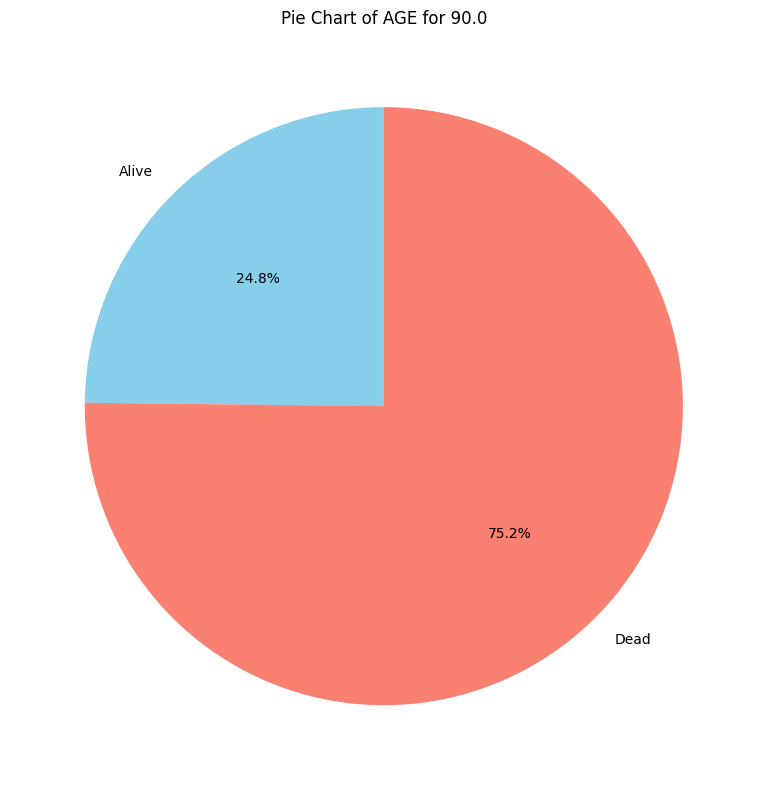

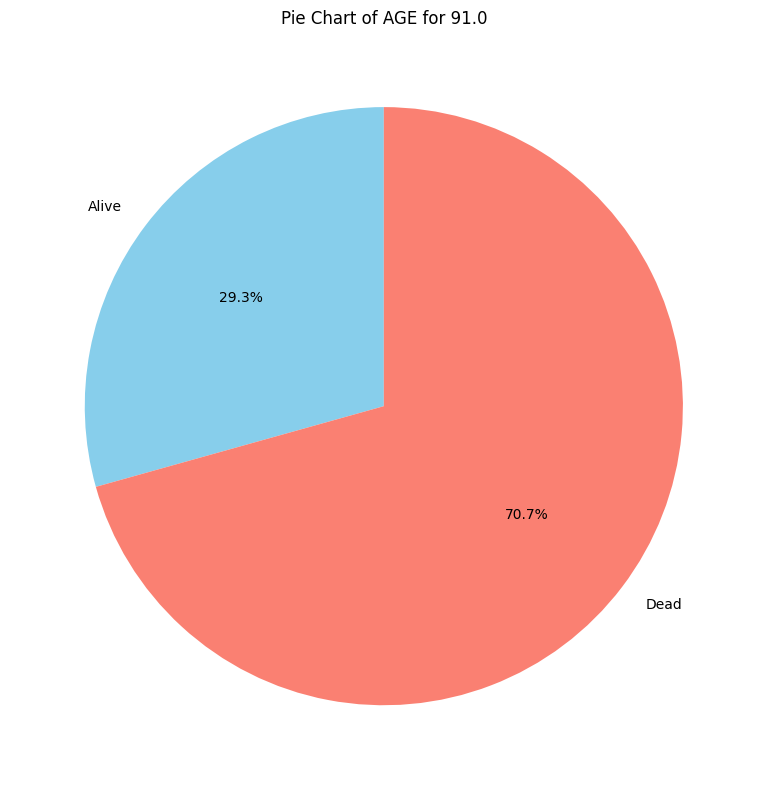

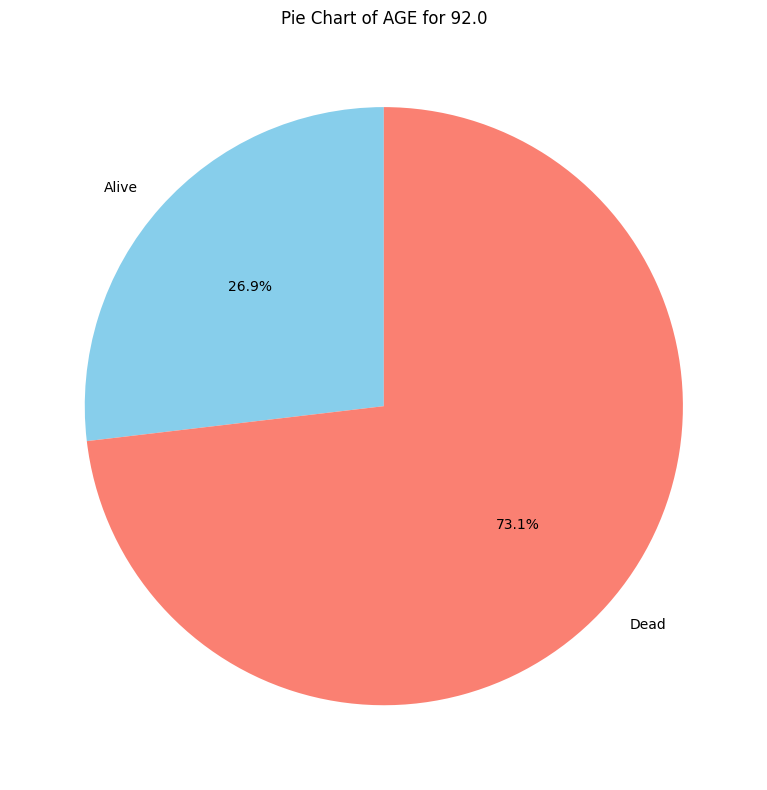

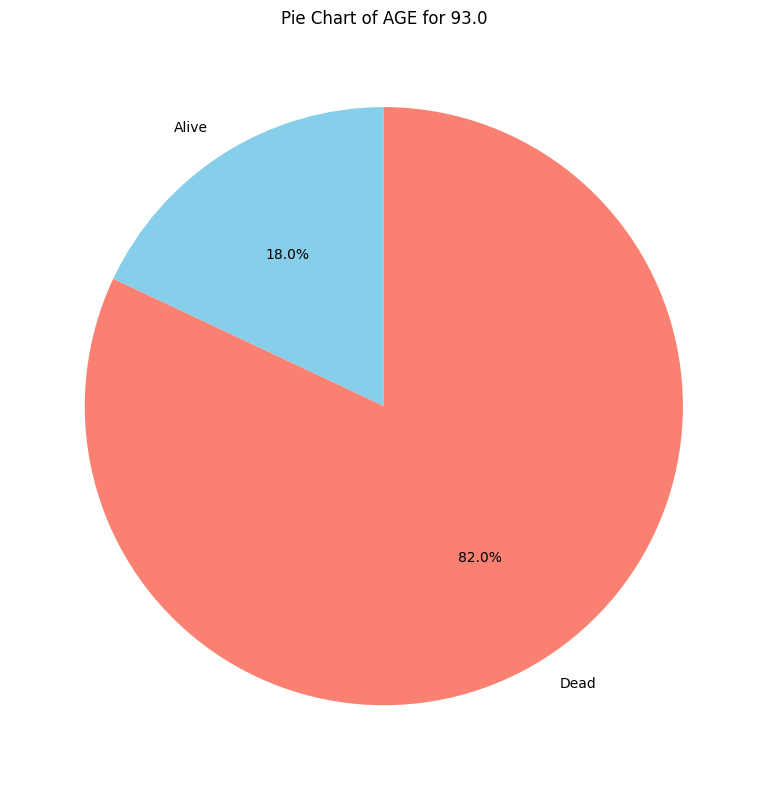

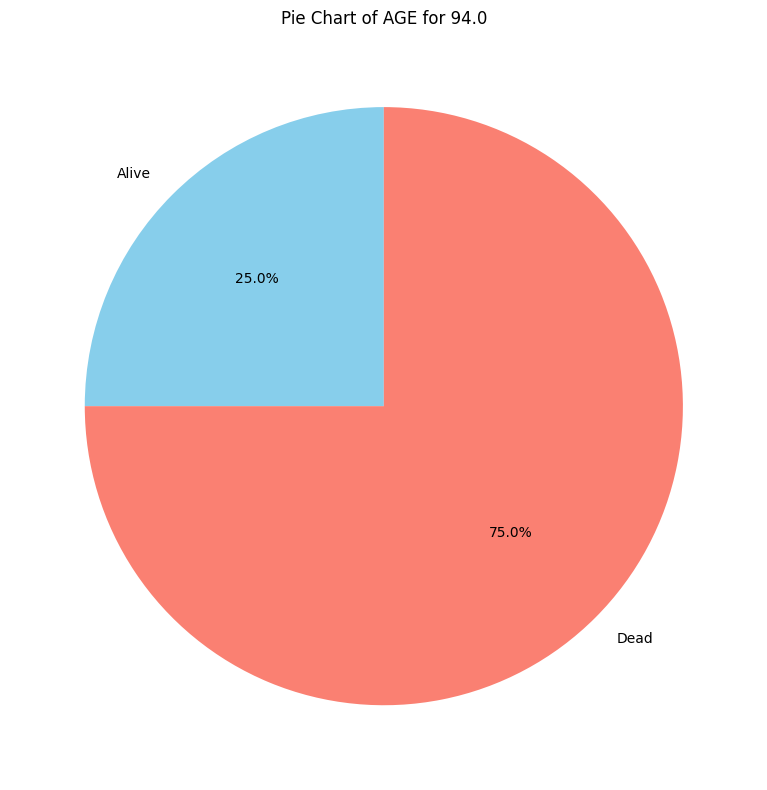

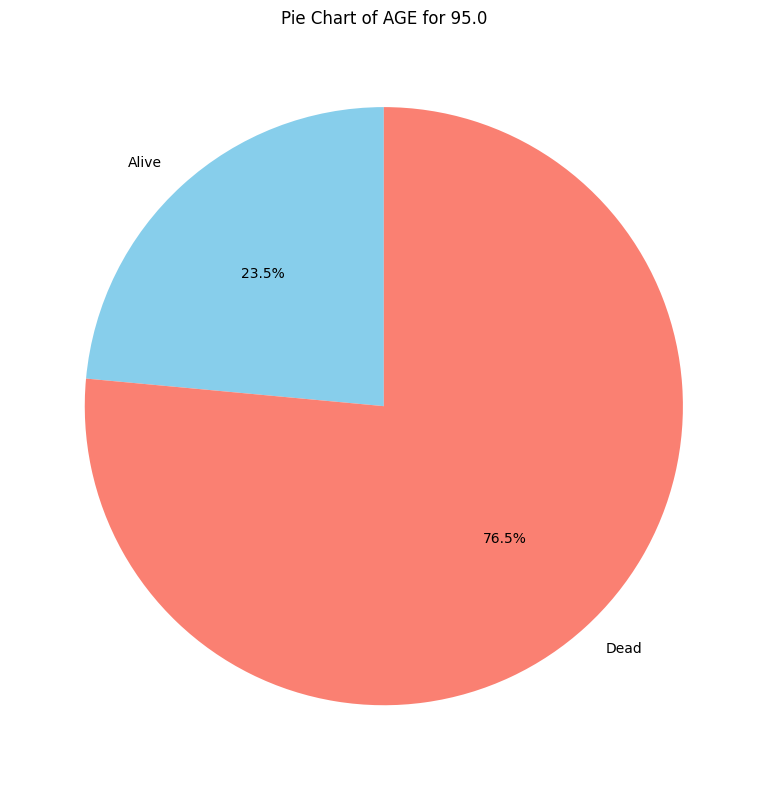

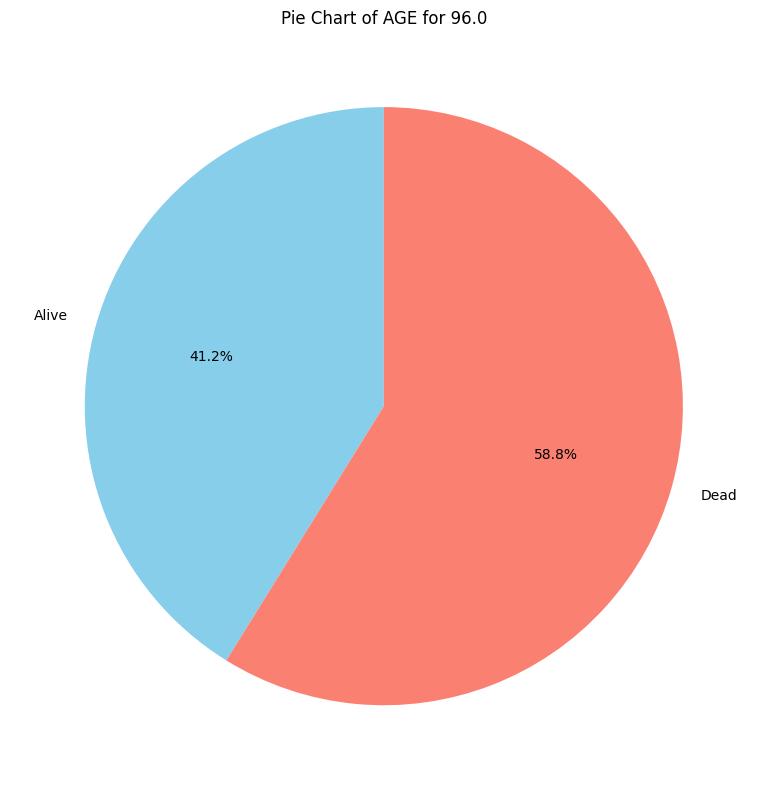

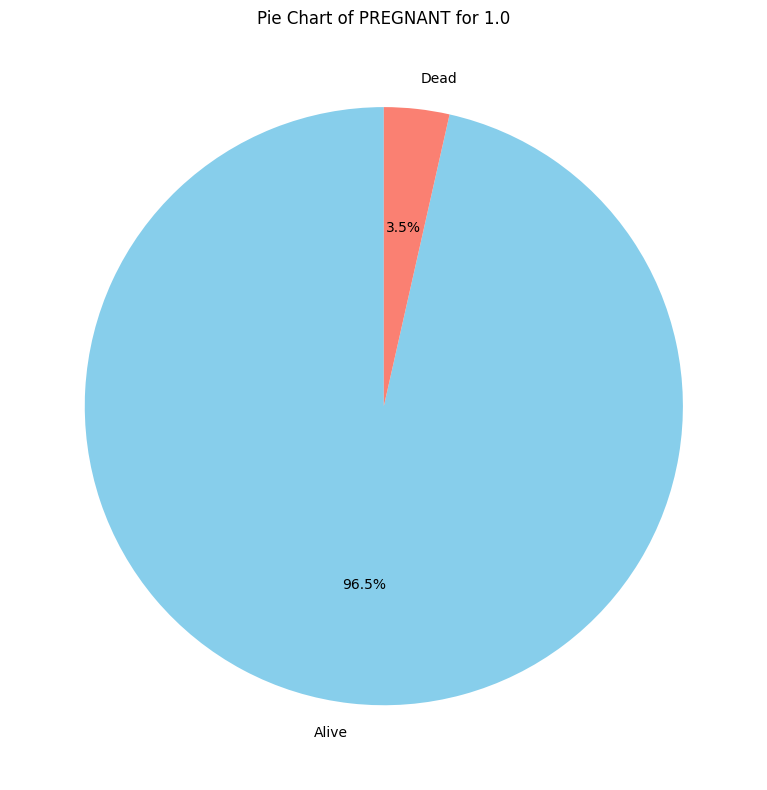

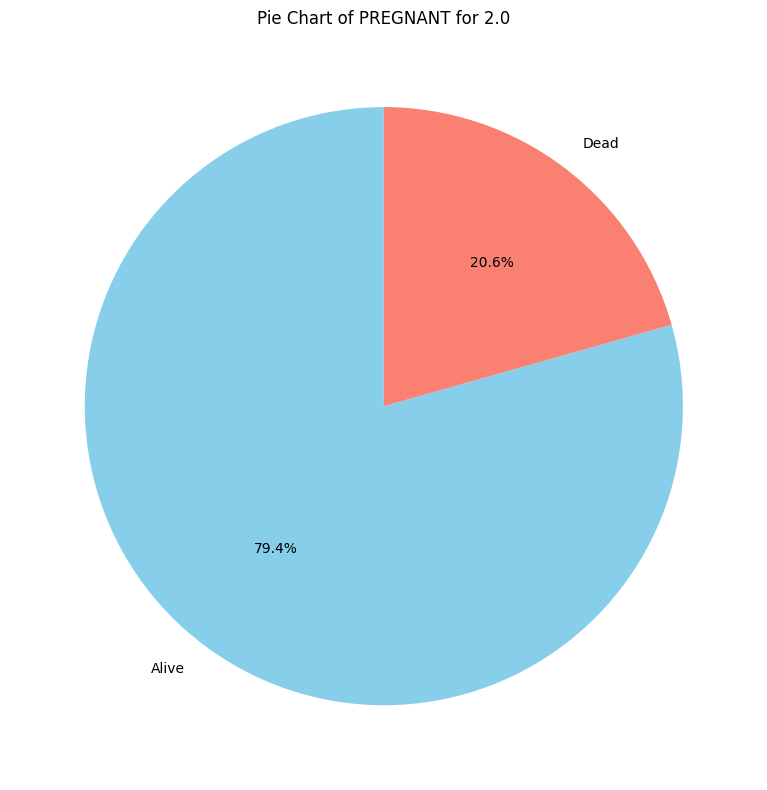

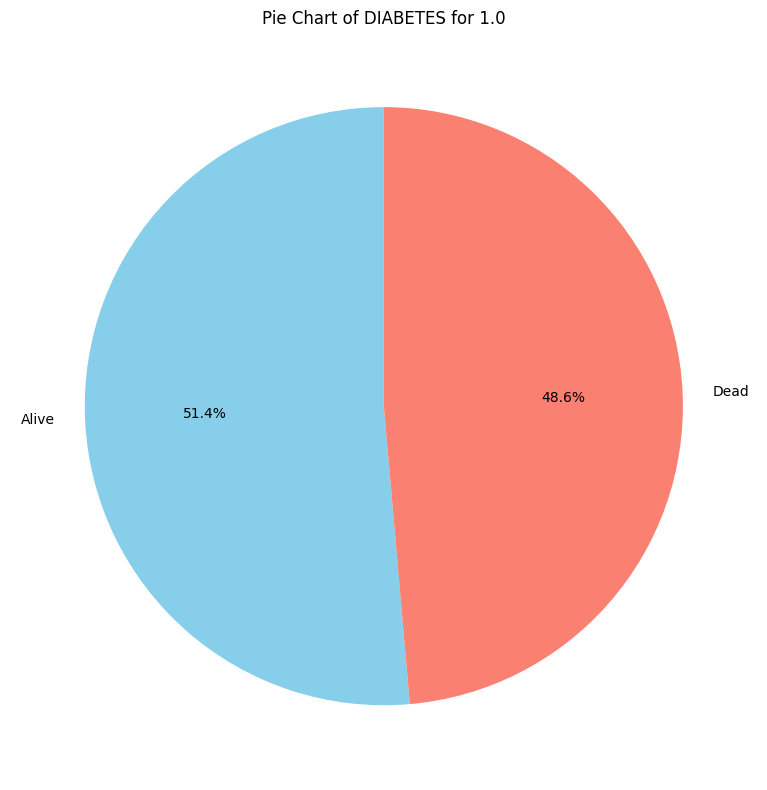

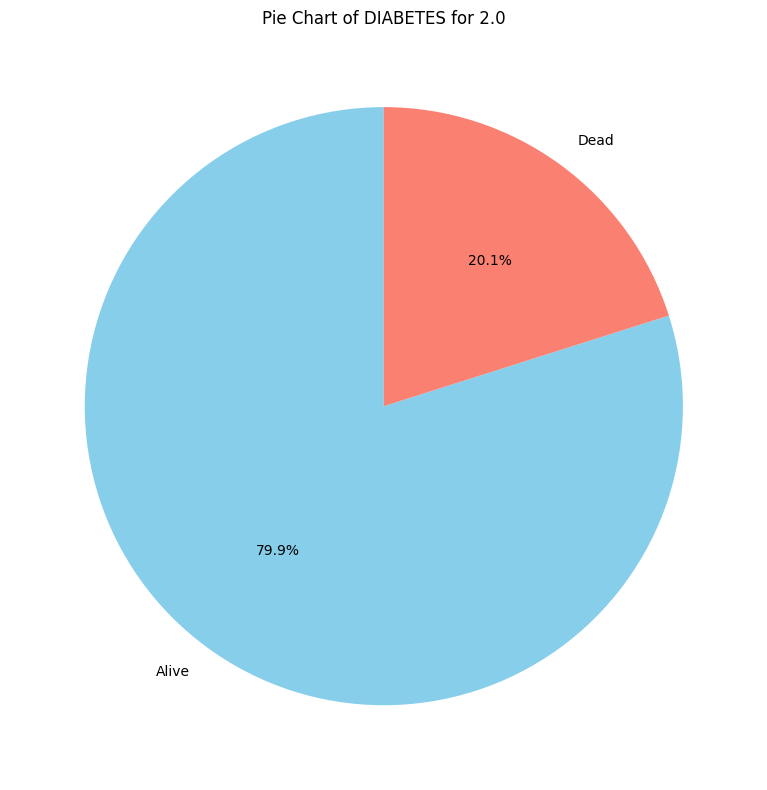

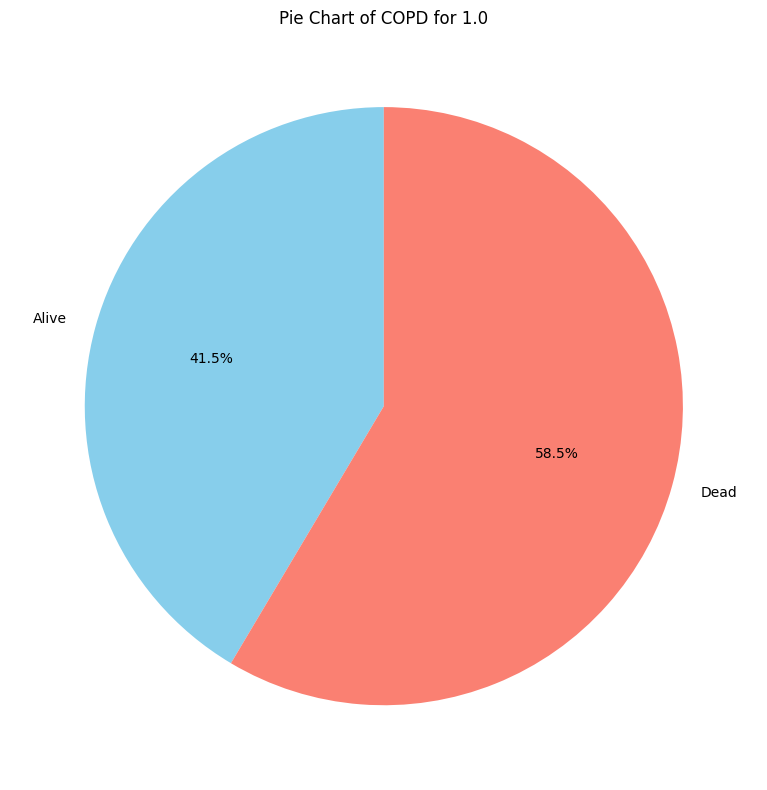

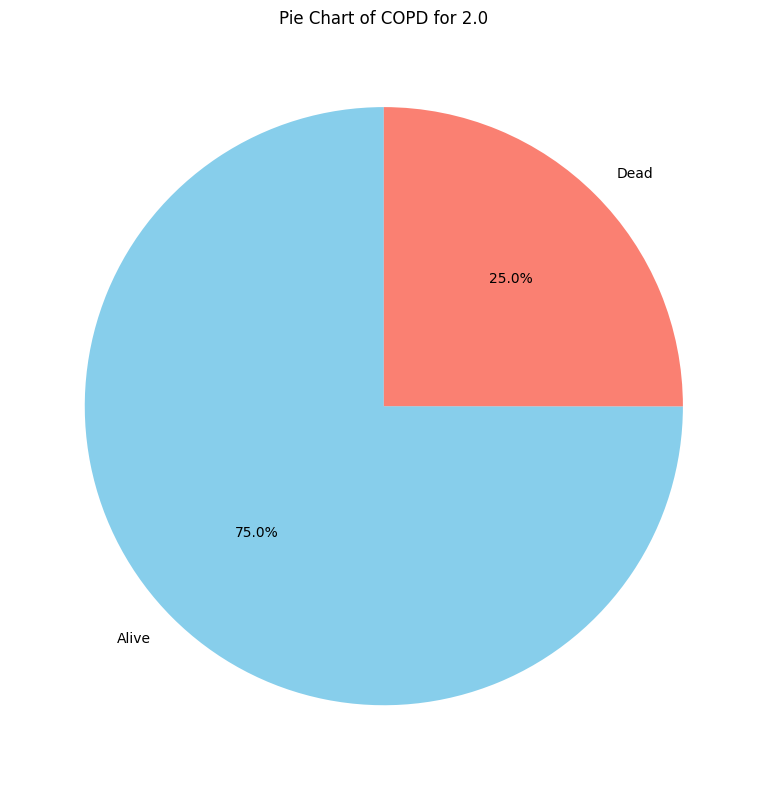

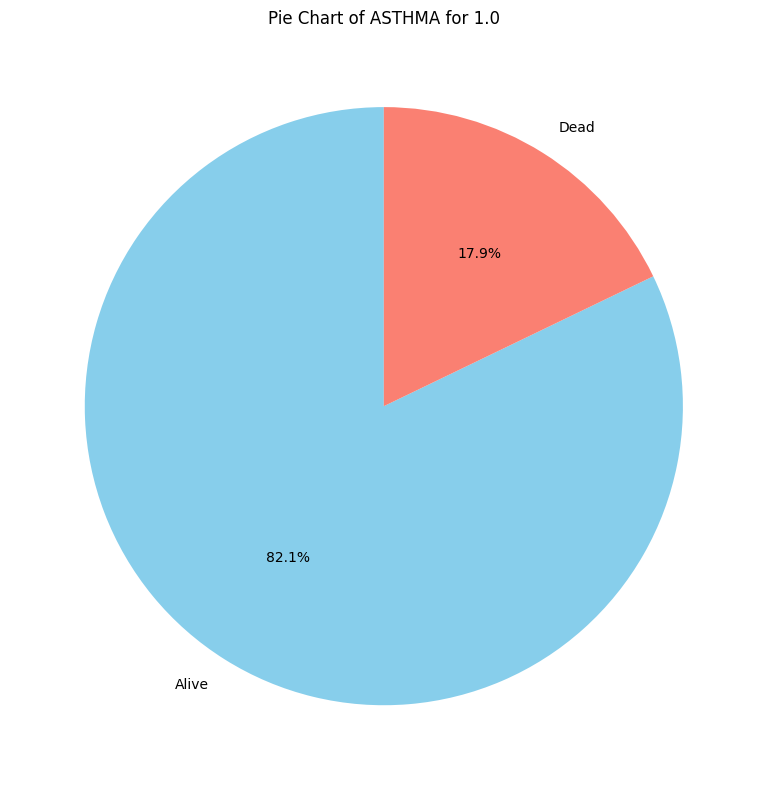

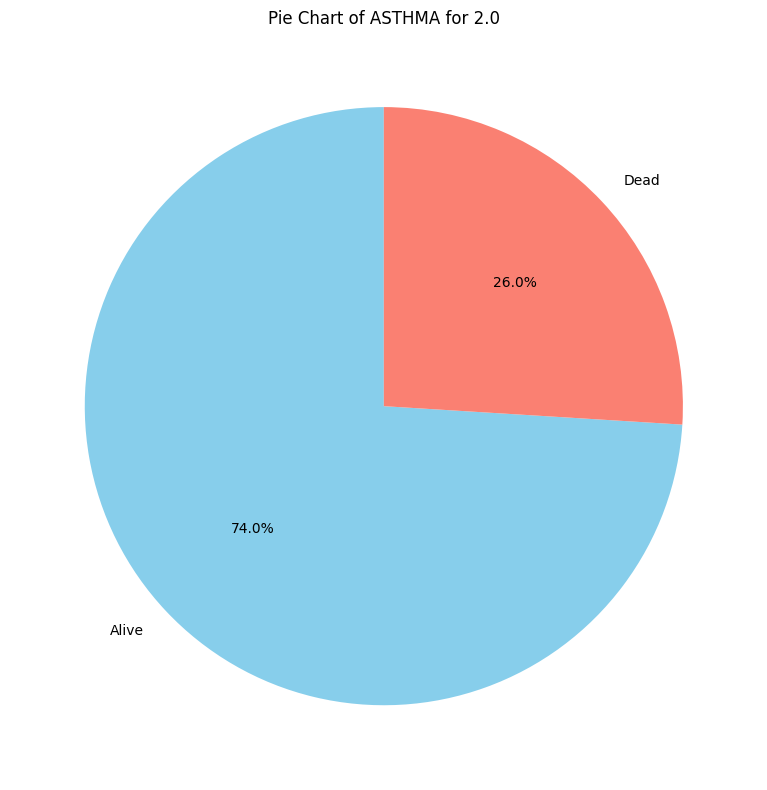

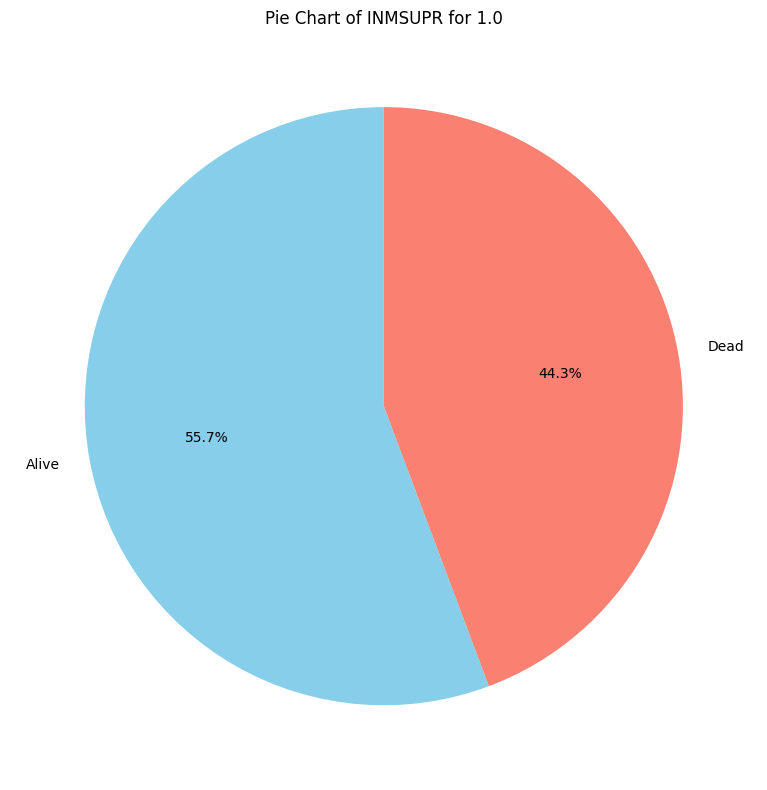

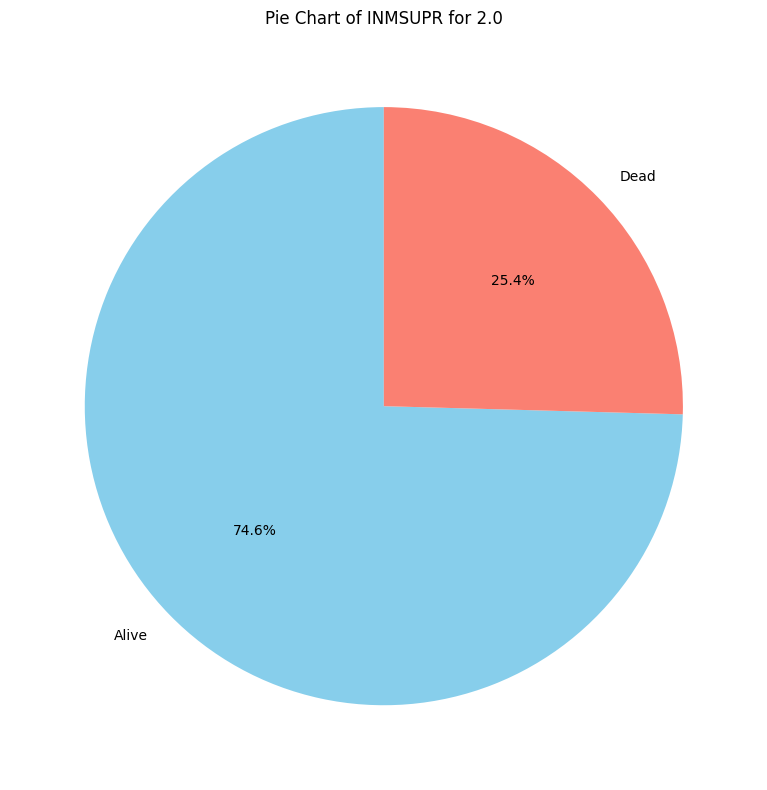

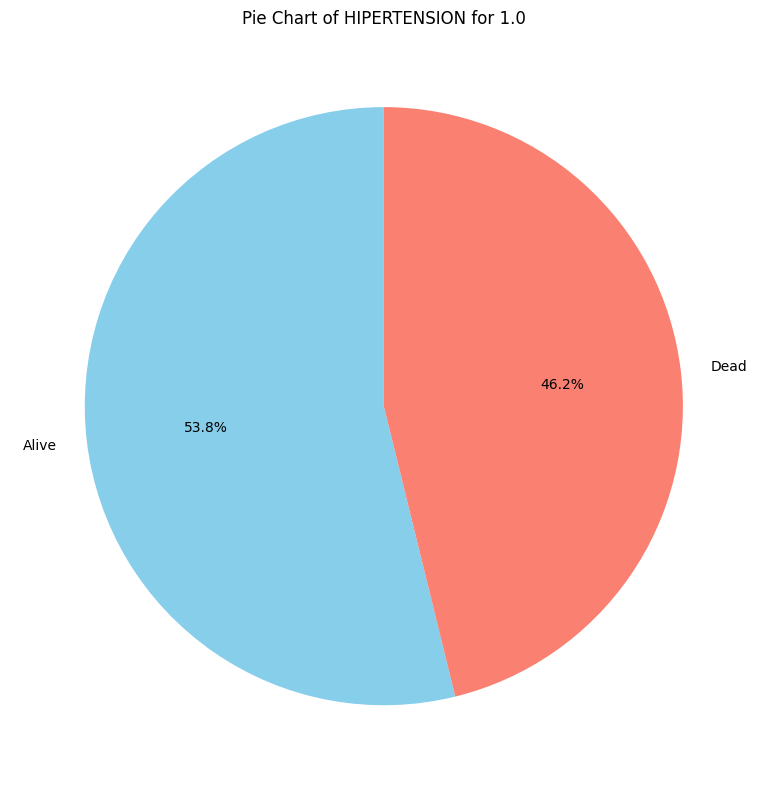

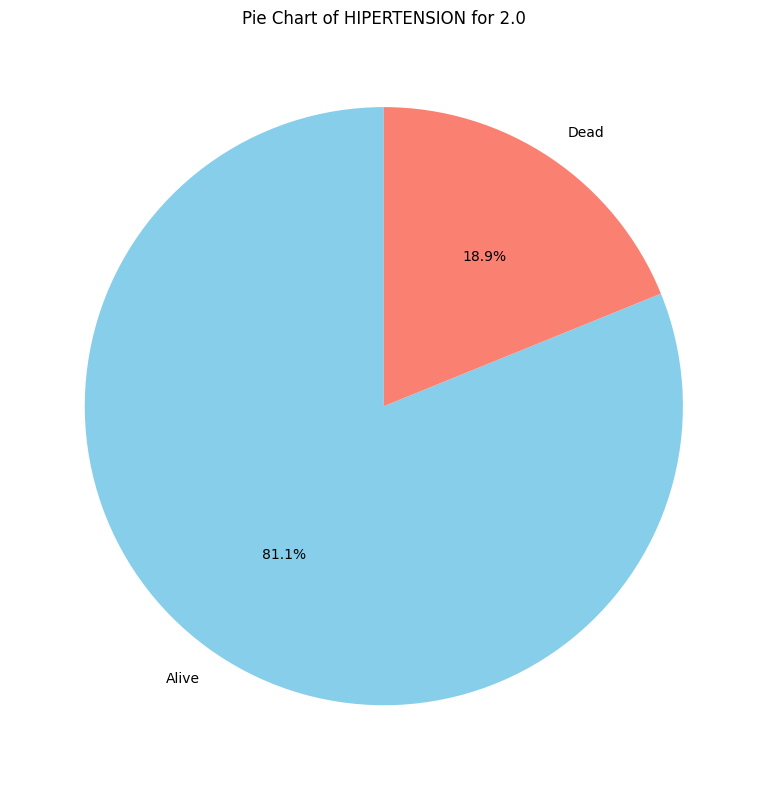

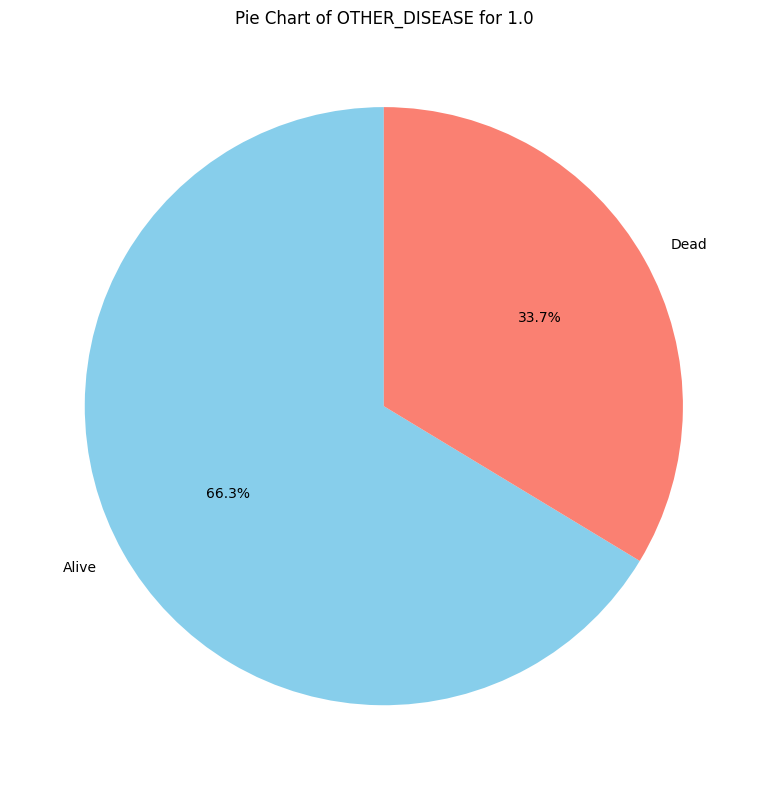

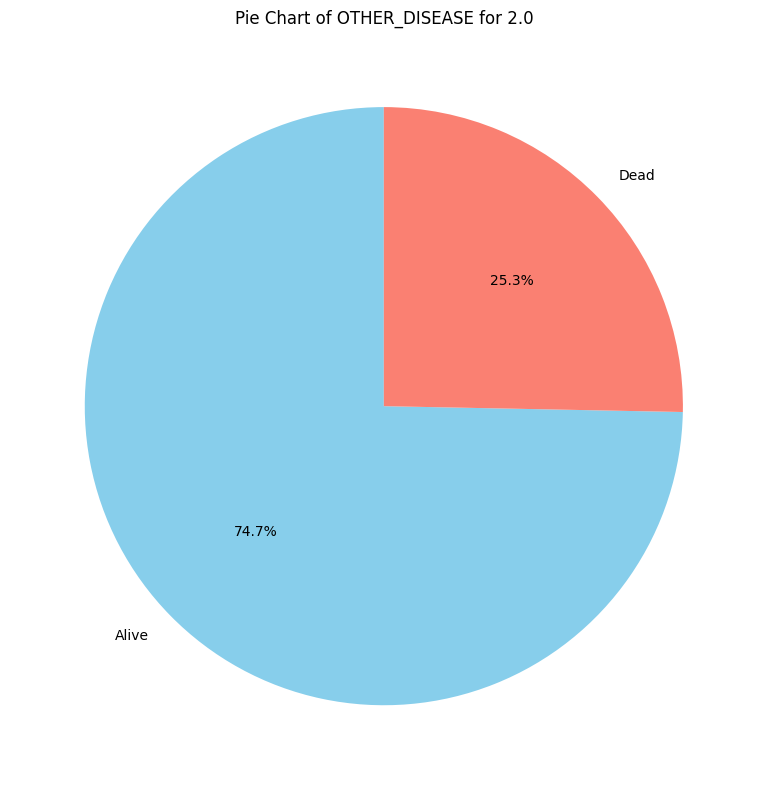

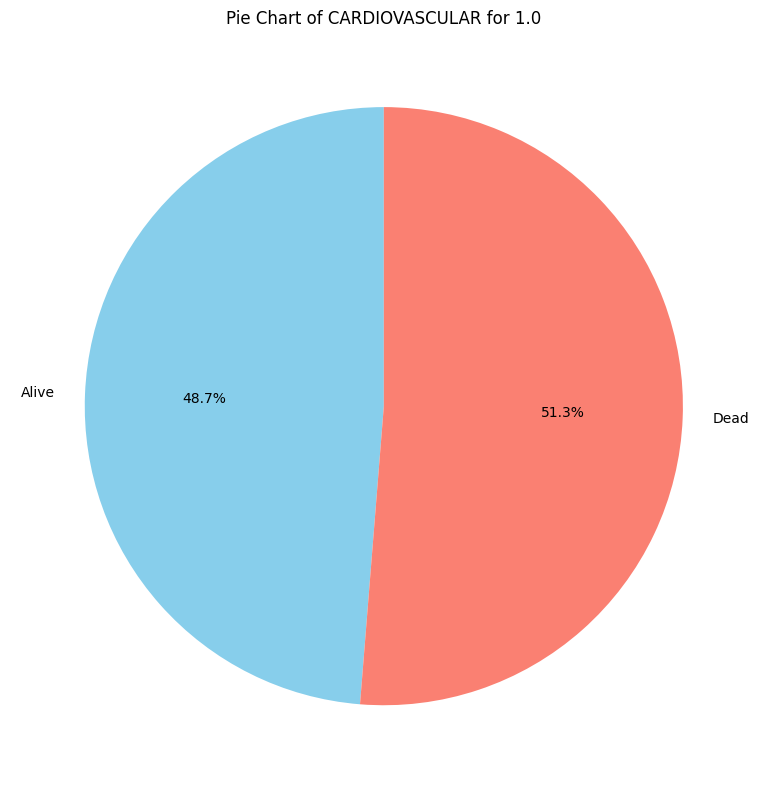

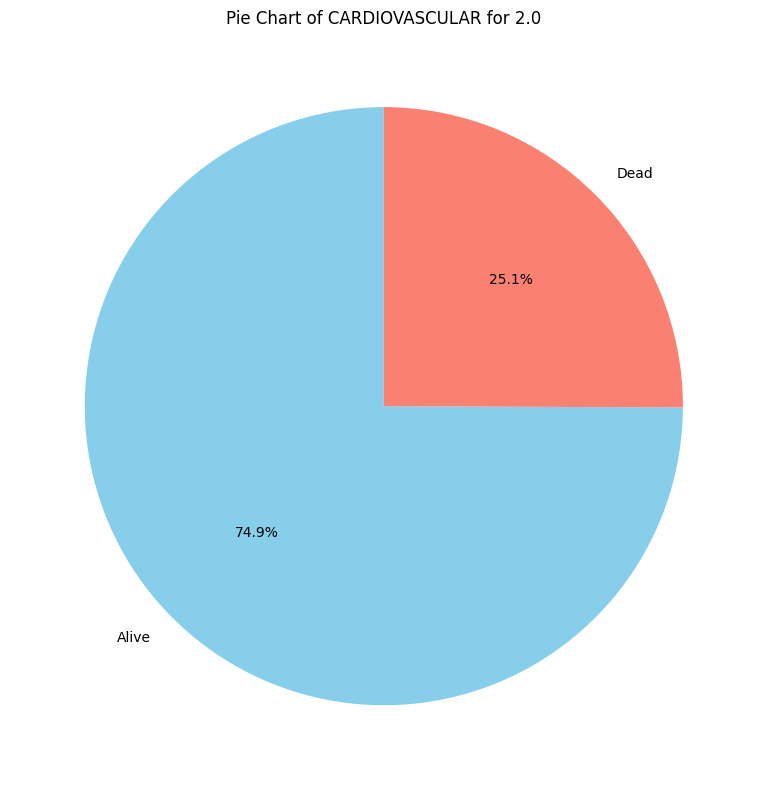

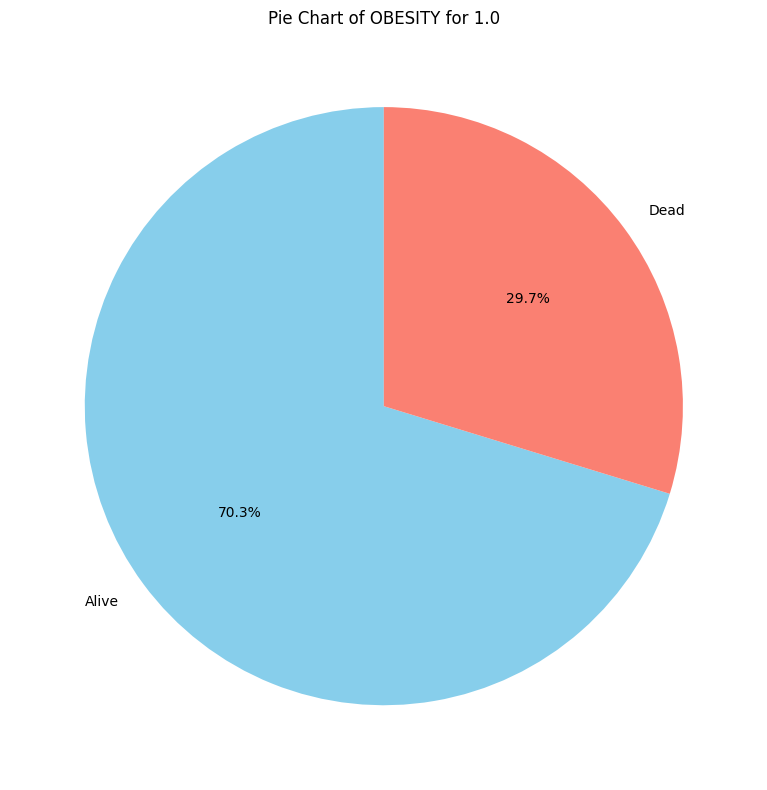

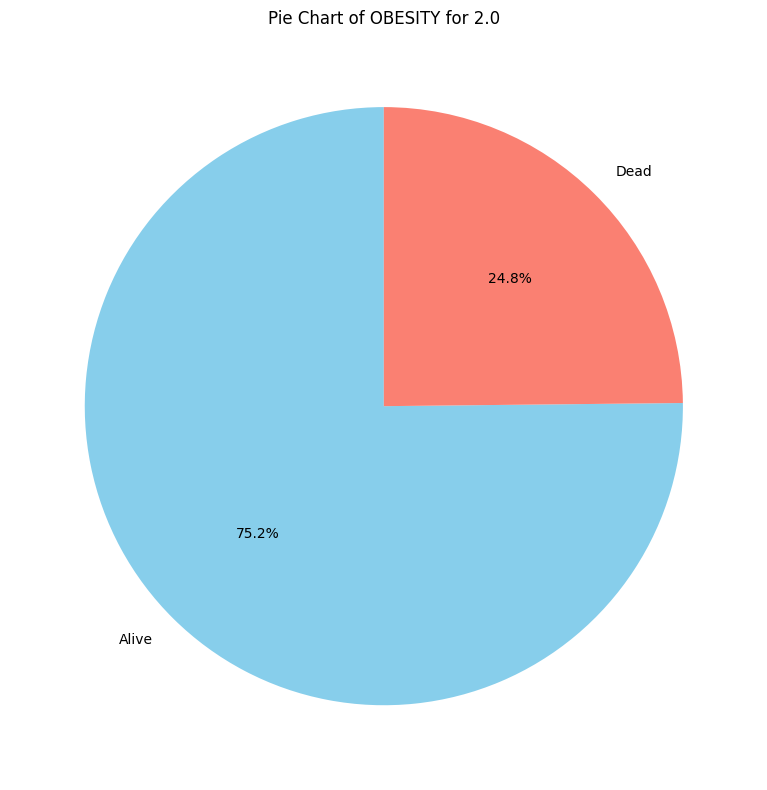

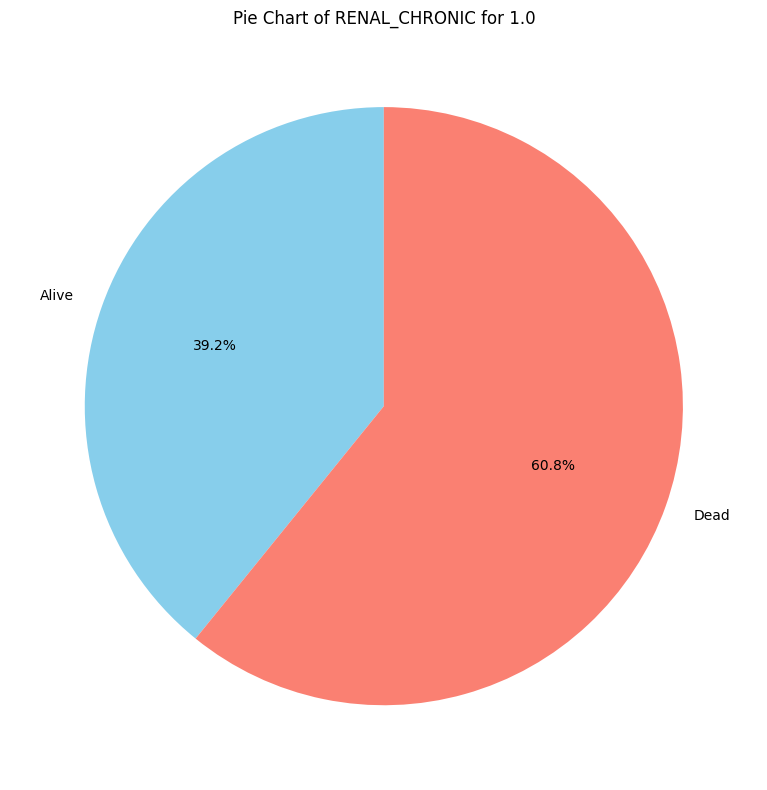

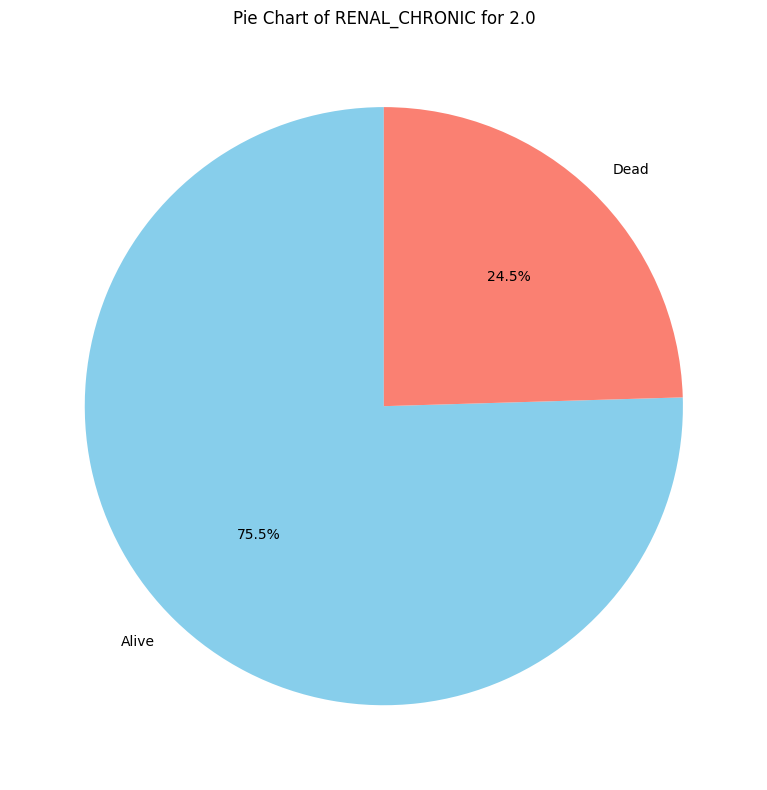

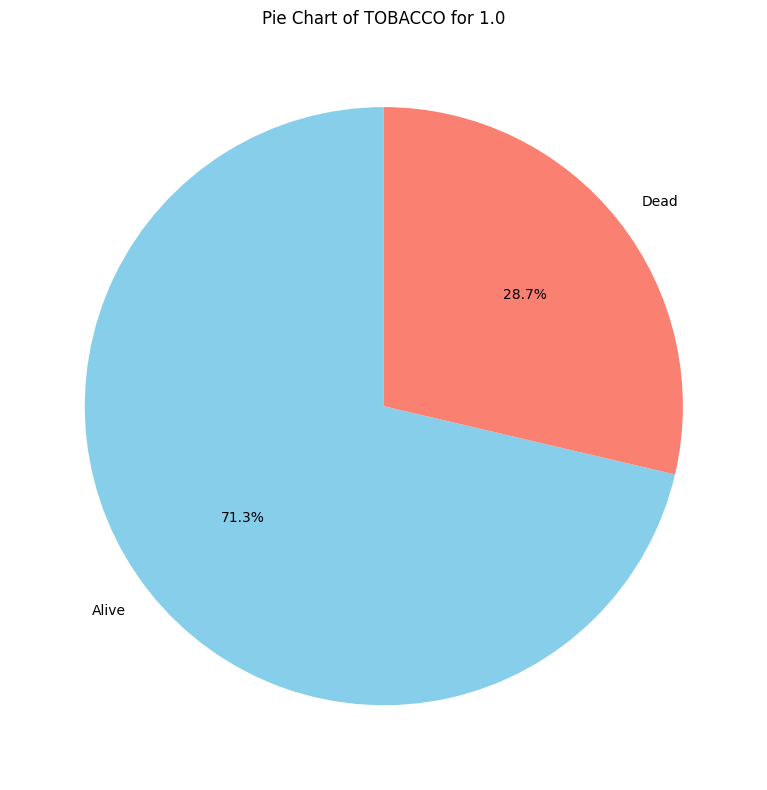

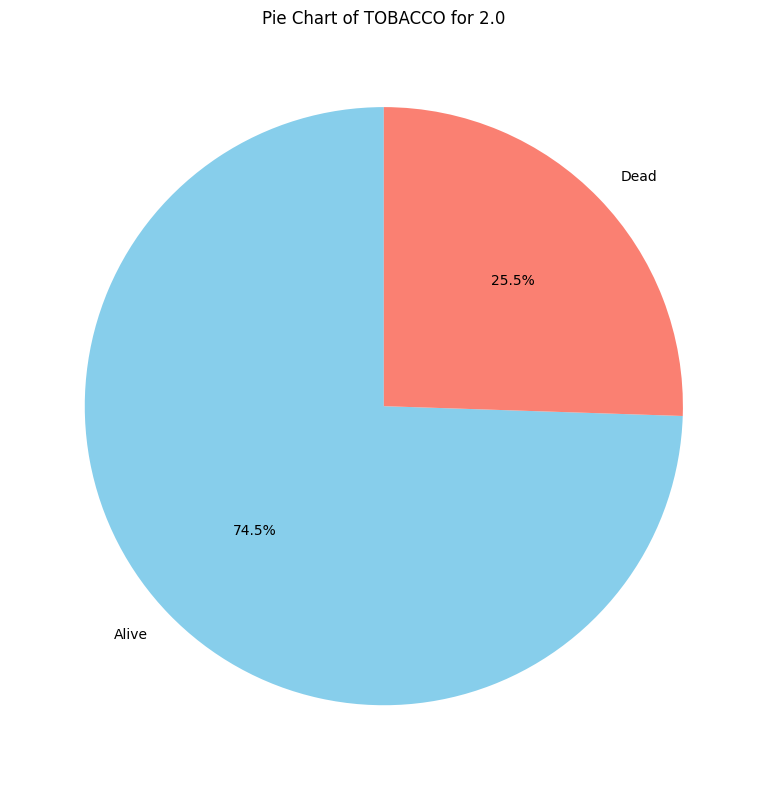

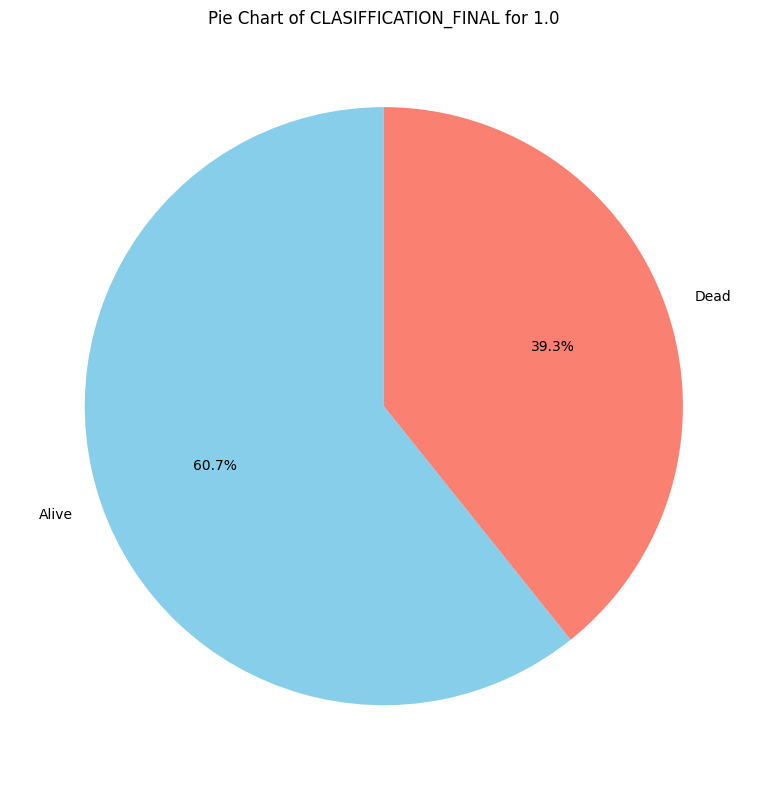

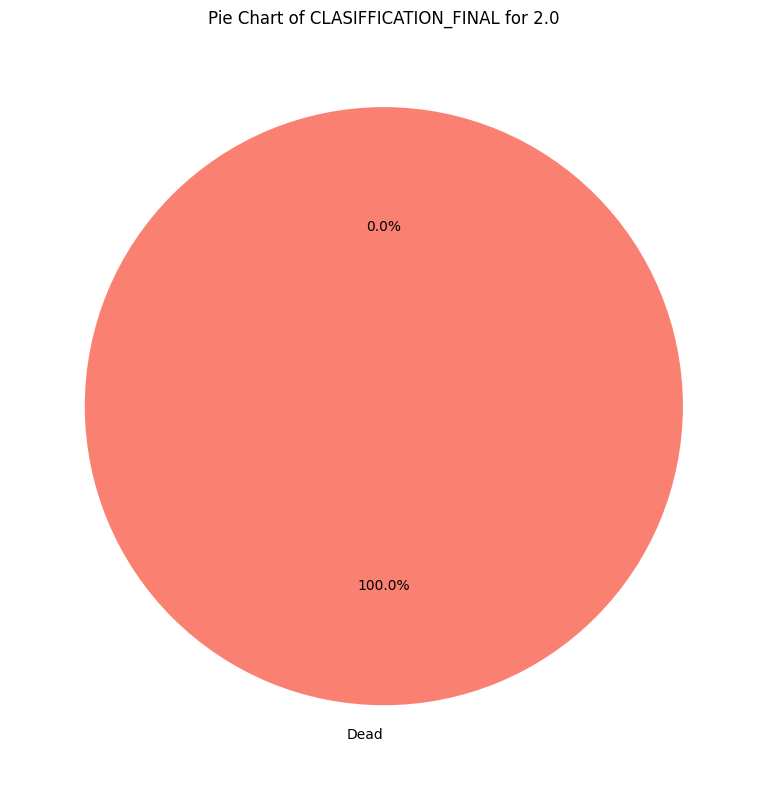

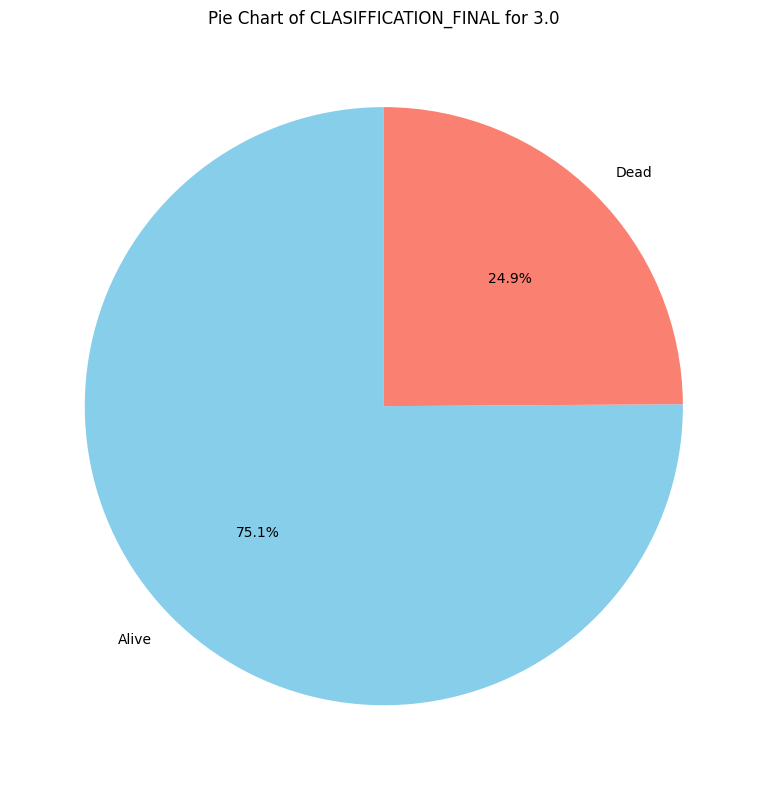

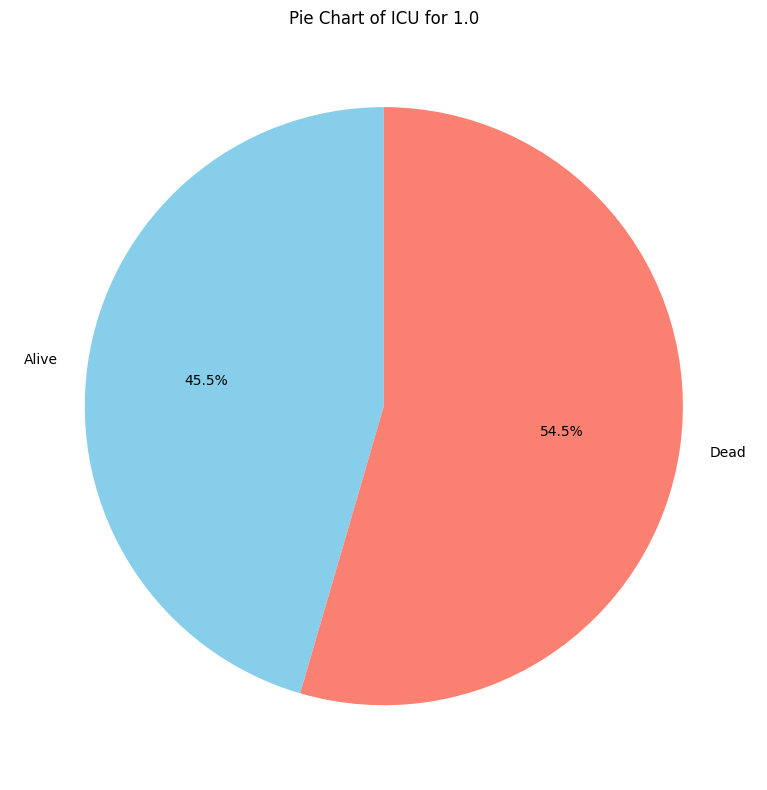

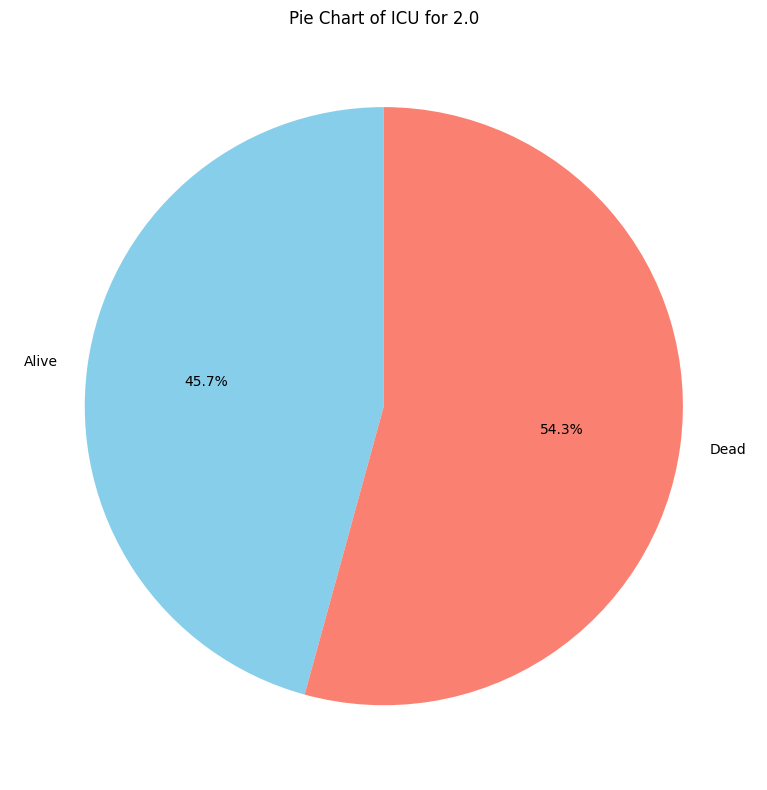

In [23]:
# Percentage of alive and dead for each symptom
for symptom in symptoms:
  count_data = died.groupby([symptom, "DATE_DIED"]).size().unstack(fill_value=0)
  for category in count_data.index:
    plt.figure(figsize=(8, 8))
    count_data.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
    plt.title(f"Pie Chart of {symptom} for {category}")
    plt.ylabel('')  # Hide y-label
    plt.tight_layout()
    plt.show()

##### Decision Tree (Classification Final)

In [24]:
filtered_df = df[df["CLASIFFICATION_FINAL"].isin([1, 2, 3])].copy()
filtered_df.drop(columns=["ICU", "INTUBED"], axis=1, inplace=True)
filtered_df

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA   AGE  \
0           2             1    1             1  03/05/2020        1.0  65.0   
2           2             1    2             2  09/06/2020        2.0  55.0   
4           2             1    2             1  21/06/2020        2.0  68.0   
5           2             1    1             2         NaN        1.0  40.0   
6           2             1    1             1         NaN        2.0  64.0   
...       ...           ...  ...           ...         ...        ...   ...   
134279      2             4    2             1         NaN        2.0  54.0   
134280      1             4    2             2         NaN        2.0  69.0   
134281      2             4    1             1         NaN        1.0  54.0   
134282      2             4    1             1         NaN        2.0  55.0   
134283      2             4    2             1         NaN        2.0  53.0   

        PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0            2.0       2.0   2.0     2.0      2.0           1.0   
2            NaN       1.0   2.0     2.0      2.0           2.0   
4            NaN       1.0   2.0     2.0      2.0           1.0   
5            2.0       2.0   2.0     2.0      2.0           2.0   
6            2.0       2.0   2.0     2.0      2.0           2.0   
...          ...       ...   ...     ...      ...           ...   
134279       NaN       1.0   2.0     2.0      2.0           2.0   
134280       NaN       2.0   2.0     2.0      2.0           2.0   
134281       2.0       1.0   2.0     2.0      2.0           1.0   
134282       2.0       2.0   2.0     2.0      2.0           1.0   
134283       NaN       1.0   2.0     2.0      2.0           2.0   

        OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0                 2.0             2.0      2.0            2.0      2.0   
2                 2.0             2.0      2.0            2.0      2.0   
4                 2.0             2.0      2.0            2.0      2.0   
5                 2.0             2.0      2.0            2.0      2.0   
6                 2.0             2.0      2.0            2.0      2.0   
...               ...             ...      ...            ...      ...   
134279            2.0             2.0      2.0            2.0      1.0   
134280            1.0             2.0      1.0            2.0      1.0   
134281            2.0             2.0      2.0            2.0      2.0   
134282            2.0             2.0      2.0            2.0      2.0   
134283            2.0             2.0      2.0            2.0      2.0   

        CLASIFFICATION_FINAL  
0                        3.0  
2                        3.0  
4                        3.0  
5                        3.0  
6                        3.0  
...                      ...  
134279                   3.0  
134280                   3.0  
134281                   3.0  
134282                   3.0  
134283                   3.0  

[111027 rows x 19 columns]

In [31]:
# Handle missing values in the target variable before splitting
df['CLASIFFICATION_FINAL'].fillna(df['CLASIFFICATION_FINAL'].mode()[0], inplace=True)  # Fill with the most frequent value

X = df.drop(columns=["CLASIFFICATION_FINAL", "DATE_DIED"])
y = df["CLASIFFICATION_FINAL"]

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

results_1 = { 'accuracy': accuracy_score(y_test, y_pred),
              'precision': precision_score(y_test, y_pred, average='weighted'),
              'recall': recall_score(y_test, y_pred, average='weighted'),
              'f1': f1_score(y_test, y_pred, average='weighted')
}

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        68
         2.0       0.02      0.02      0.02       241
         3.0       0.86      0.92      0.89     21887
         4.0       0.06      0.03      0.04        33
         5.0       0.02      0.01      0.01       233
         6.0       0.12      0.05      0.07      1203
         7.0       0.42      0.37      0.39      3175

    accuracy                           0.79     26840
   macro avg       0.21      0.20      0.20     26840
weighted avg       0.76      0.79      0.77     26840



In [26]:
X = filtered_df.drop(columns=["CLASIFFICATION_FINAL", "DATE_DIED"])
y = filtered_df["CLASIFFICATION_FINAL"]

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

results_2 = { 'accuracy': accuracy_score(y_test, y_pred),
              'precision': precision_score(y_test, y_pred, average='weighted'),
              'recall': recall_score(y_test, y_pred, average='weighted'),
              'f1': f1_score(y_test, y_pred, average='weighted')
}

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        61
         2.0       0.05      0.02      0.03       265
         3.0       0.99      0.99      0.99     21880

    accuracy                           0.98     22206
   macro avg       0.34      0.34      0.34     22206
weighted avg       0.97      0.98      0.98     22206



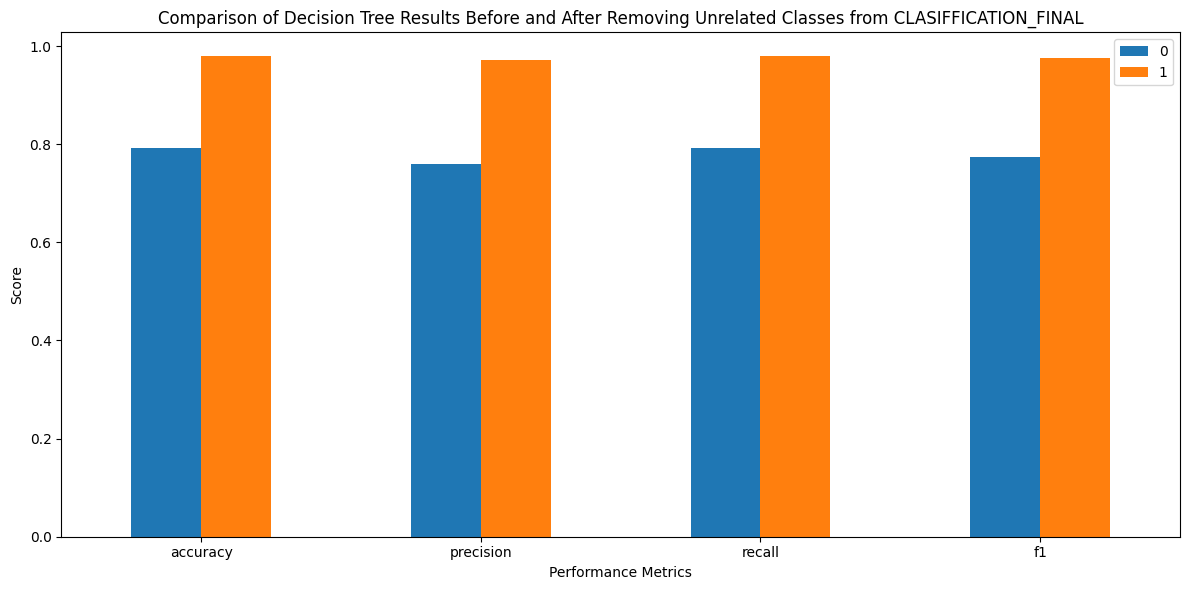

In [27]:
results_df = pd.DataFrame([results_1, results_2])
results_df = results_df.T
results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Decision Tree Results Before and After Removing Unrelated Classes from CLASIFFICATION_FINAL")
plt.xlabel("Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Decision Tree (Hyperparameter Tuning)

In [28]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [33]:
X = filtered_df.drop(columns=["CLASIFFICATION_FINAL", "DATE_DIED"])
y = filtered_df["CLASIFFICATION_FINAL"]

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.9854088552458722
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        61
         2.0       0.00      0.00      0.00       265
         3.0       0.99      1.00      0.99     21880

    accuracy                           0.99     22206
   macro avg       0.33      0.33      0.33     22206
weighted avg       0.97      0.99      0.98     22206



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
